In [65]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [66]:
import pandas as pd
import numpy as np
import os
import re
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm

In [67]:
df = pd.read_csv('/content/drive/MyDrive/경예기 팀플/CrabShucked&VisceraPrediction.csv')

In [68]:
df

Sex  Length  Diameter  Height     Weight  Age  Shucked Weight  \
0      F  1.4375    1.1750  0.4125  24.635715    9       12.332033   
1      M  0.8875    0.6500  0.2125   5.400580    6        2.296310   
2      I  1.0375    0.7750  0.2500   7.952035    6        3.231843   
3      F  1.1750    0.8875  0.2500  13.480187   10        4.748541   
4      I  0.8875    0.6625  0.2125   6.903103    6        3.458639   
...   ..     ...       ...     ...        ...  ...             ...   
3888   F  1.4625    1.1375  0.3250  24.819987    8       11.651644   
3889   F  1.5500    1.2125  0.4375  34.458817   10       15.450477   
3890   I  0.6250    0.4625  0.1625   2.012815    5        0.765436   
3891   I  1.0625    0.7750  0.2625  10.347568    6        4.507570   
3892   I  0.7875    0.6125  0.2125   4.068153    8        1.502523   

      Viscera Weight  
0           5.584852  
1           1.374951  
2           1.601747  
3           2.282135  
4           1.488349  
...              ...  
3888        5.854172  
3889        7.172423  
3890        0.524466  
3891        2.338834  
3892        1.346601  

[3893 rows x 8 columns]

In [69]:
df['Age'] = df['Age'].astype(float)


In [70]:
df.head()

Sex  Length  Diameter  Height     Weight   Age  Shucked Weight  \
0   F  1.4375    1.1750  0.4125  24.635715   9.0       12.332033   
1   M  0.8875    0.6500  0.2125   5.400580   6.0        2.296310   
2   I  1.0375    0.7750  0.2500   7.952035   6.0        3.231843   
3   F  1.1750    0.8875  0.2500  13.480187  10.0        4.748541   
4   I  0.8875    0.6625  0.2125   6.903103   6.0        3.458639   

   Viscera Weight  
0        5.584852  
1        1.374951  
2        1.601747  
3        2.282135  
4        1.488349

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3893 entries, 0 to 3892
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             3893 non-null   object 
 1   Length          3893 non-null   float64
 2   Diameter        3893 non-null   float64
 3   Height          3893 non-null   float64
 4   Weight          3893 non-null   float64
 5   Age             3893 non-null   float64
 6   Shucked Weight  3893 non-null   float64
 7   Viscera Weight  3893 non-null   float64
dtypes: float64(7), object(1)
memory usage: 243.4+ KB


sex 가 age를 판별하는데 유의한지 아닌지 확인이 필요하다고 생각이듬.

In [72]:
df_female = df[df['Sex'] == 'F']
df_male = df[df['Sex'] == 'M']
df_inde = df[df['Sex'] == 'I']

###EDA

Sex: The gender of the entity, represented by ‘F’ for female, ‘M’ for male, and ‘I’ for indeterminant.

Length: The length of the crab.

Diameter: The diameter of the crab.

Height: The height of the crab.

Weight: The overall weight of the crab.

Shucked Weight: The weight of the edible portion (shucked meat) of the crab.

Viscera Weight: The weight of the gut or internal organs of the crab.


Age: The age of the crab.

In [73]:
df.describe()

Length     Diameter       Height       Weight          Age  \
count  3893.000000  3893.000000  3893.000000  3893.000000  3893.000000   
mean      1.311306     1.020893     0.349374    23.567275     9.954791   
std       0.300431     0.248233     0.104976    13.891201     3.220967   
min       0.187500     0.137500     0.000000     0.056699     1.000000   
25%       1.125000     0.875000     0.287500    12.672227     8.000000   
50%       1.362500     1.062500     0.362500    22.792998    10.000000   
75%       1.537500     1.200000     0.412500    32.786197    11.000000   
max       2.037500     1.625000     2.825000    80.101512    29.000000   

       Shucked Weight  Viscera Weight  
count     3893.000000     3893.000000  
mean        10.207342        5.136546  
std          6.275275        3.104133  
min          0.028349        0.014175  
25%          5.343881        2.664853  
50%          9.539607        4.861939  
75%         14.273973        7.200773  
max         42.184056       21.545620

Text(0.5, 1.0, 'Dataset')

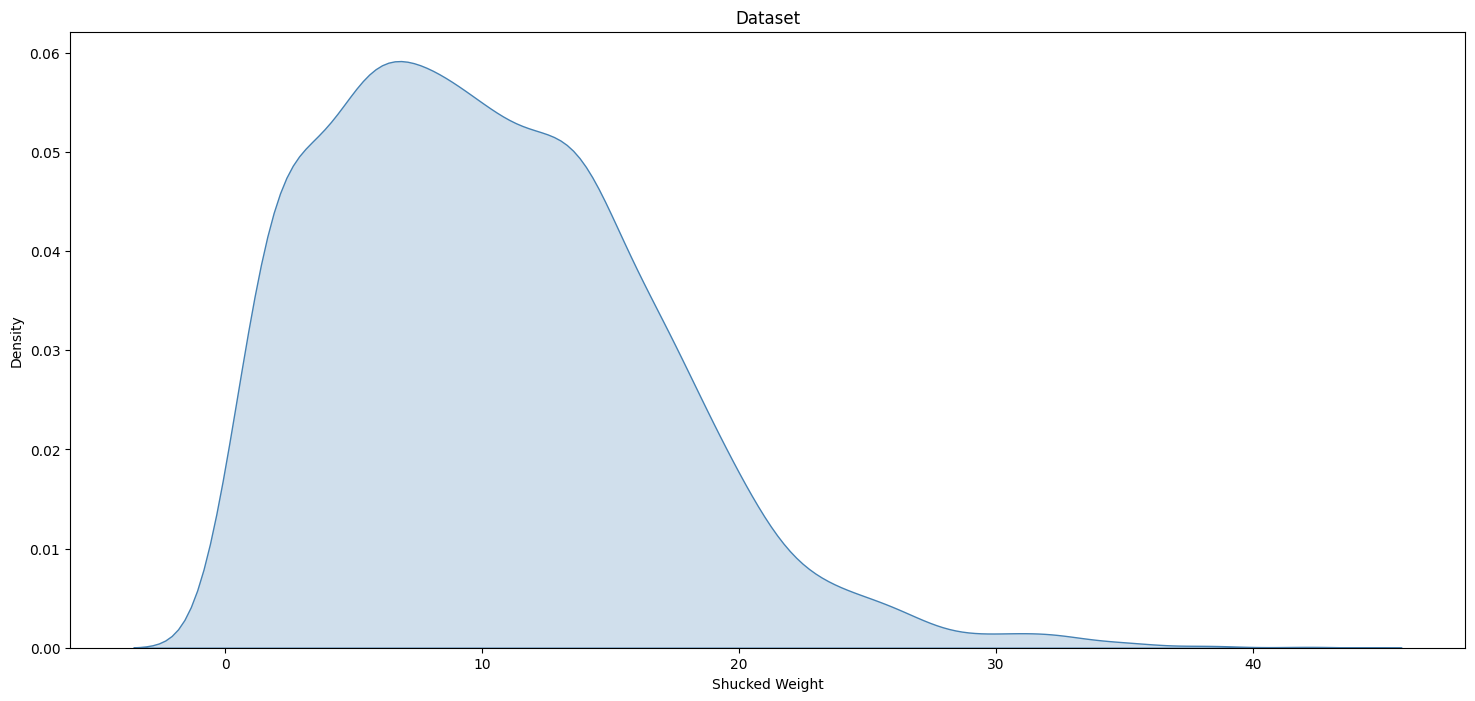

In [74]:
fig, axes = plt.subplots(figsize = (18, 8))

sns.kdeplot( data = df, x = 'Shucked Weight', fill = True, color = 'steelblue').set_title('Dataset')


Text(0.5, 1.0, 'Dataset')

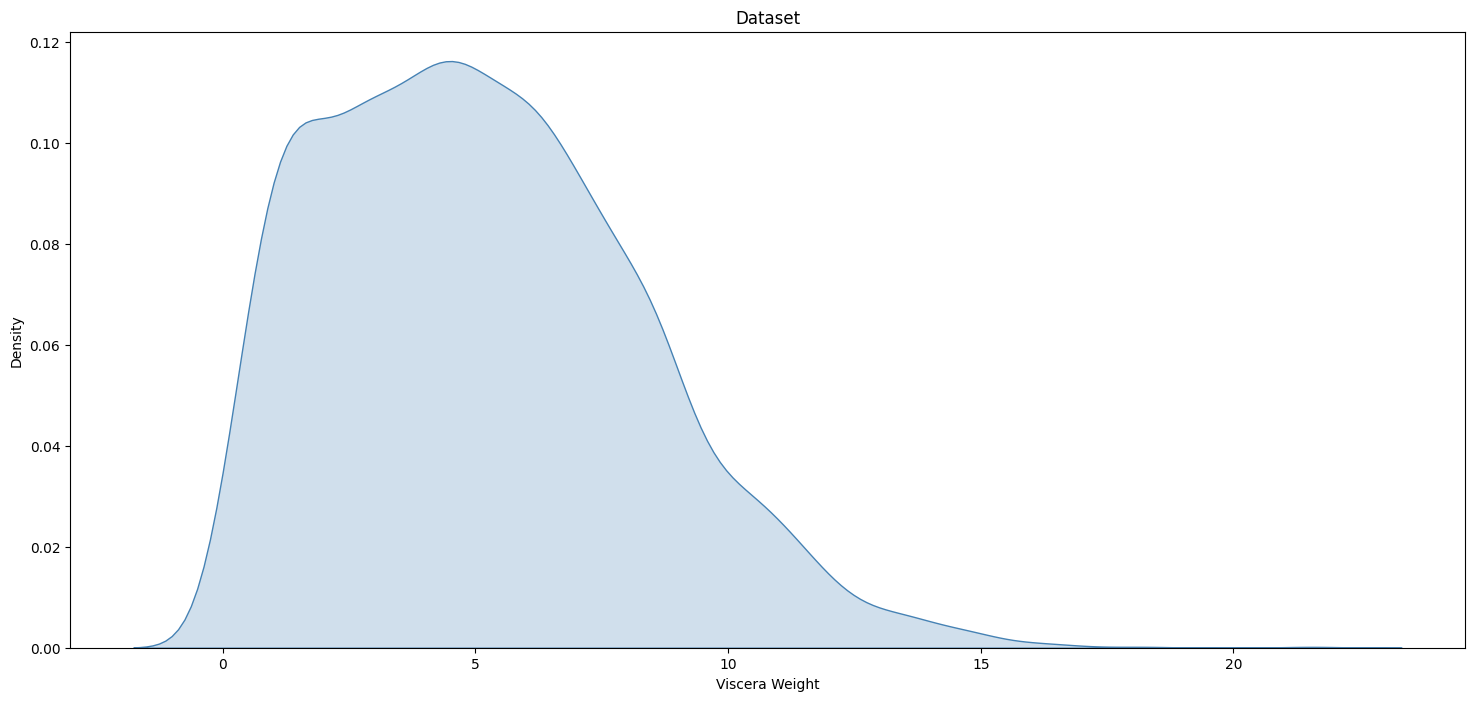

In [75]:
fig, axes = plt.subplots(figsize = (18, 8))

sns.kdeplot( data = df, x = 'Viscera Weight', fill = True, color = 'steelblue').set_title('Dataset')


Shucked weight 와 Viscera Weight 모두 Skewered 한 분포를 따르고 있다. 분포의 모양이 굉장히 유사한 것으로 보아 상관관계가 클 것으로 봄.

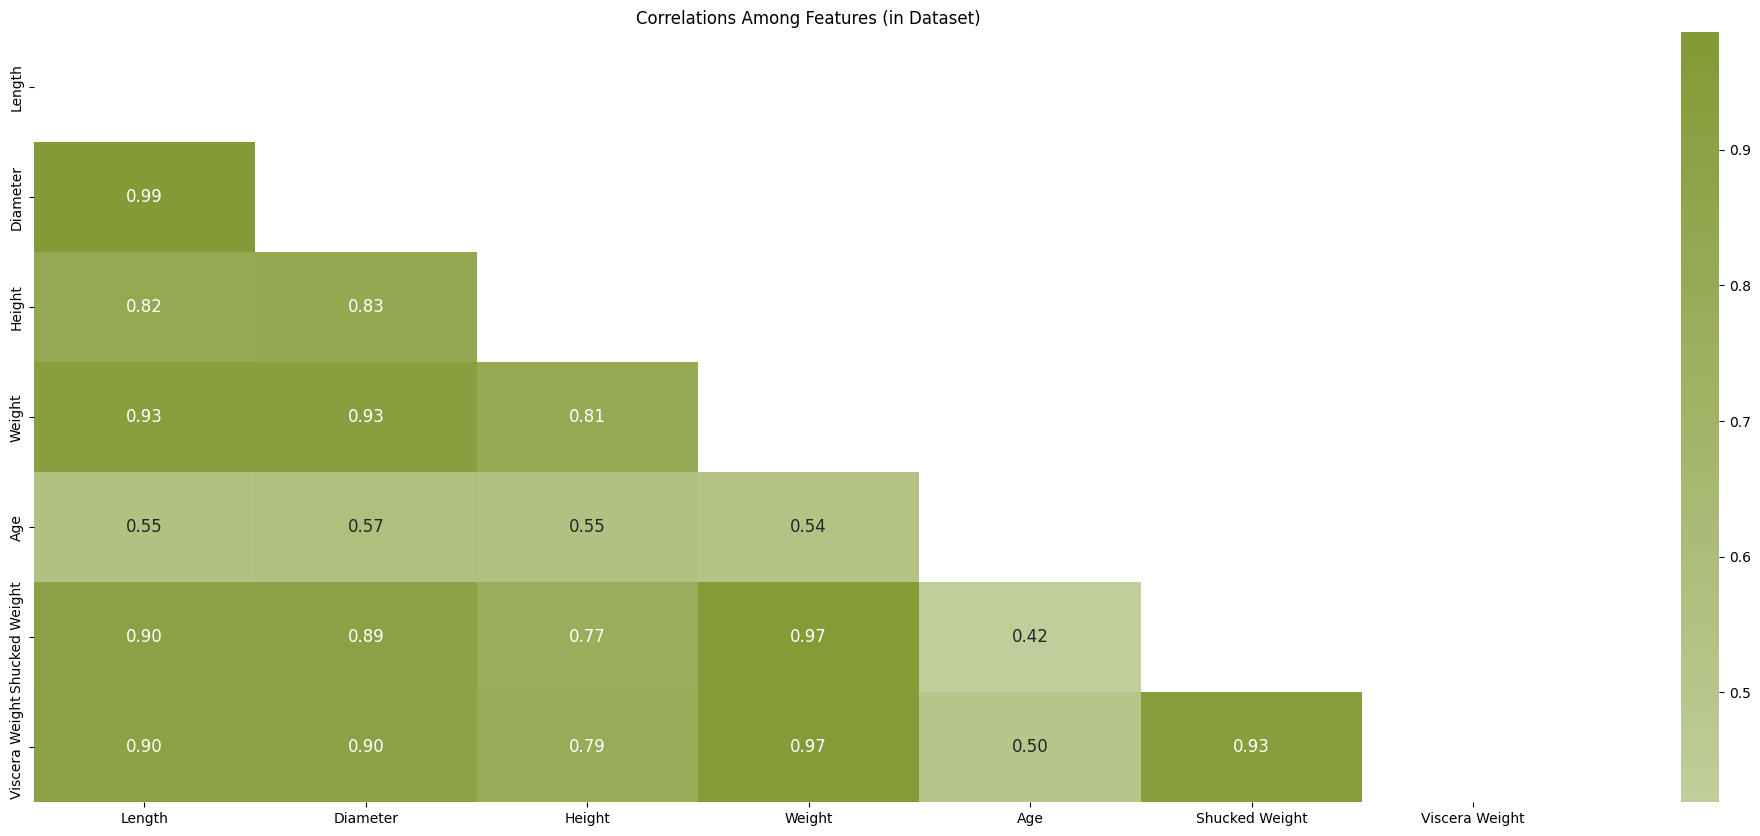

In [76]:
corr_mat_df = df.drop(columns=['Sex'], axis=1).corr()

df_mask = np.triu(np.ones_like(corr_mat_df, dtype=bool))

cmap = sns.diverging_palette(100, 7, s=85, l=60, n=20, center='light', as_cmap=True)

# Reverse the color map
cmap = cmap.reversed()

plt.figure(figsize=(25, 10))
sns.heatmap(corr_mat_df, annot=True, cmap=cmap, fmt='.2f', center=0,
            annot_kws={'size': 12}, mask=df_mask)
plt.title('Correlations Among Features (in Dataset)')

plt.show()


target인 shucked weight 와 viscera weight간의 상관관계가 0.93으로 꽤 높게 나타났으며 두 target 값에 대하여 weight 가 0.97로 가장 많은 상관성을 띄었다. 원본 데이터셋에서 weight = shucked weight + viscera weight + shell weight + error 로 표현이 가능하며 error 값이 매우 작다. weight 다음으로 length, diameter가 target 값에 가장 큰 연관도를 보인다. 또한 length 와 diameter 서로 0.99 로 1에 가까운 연관도를 보인다.

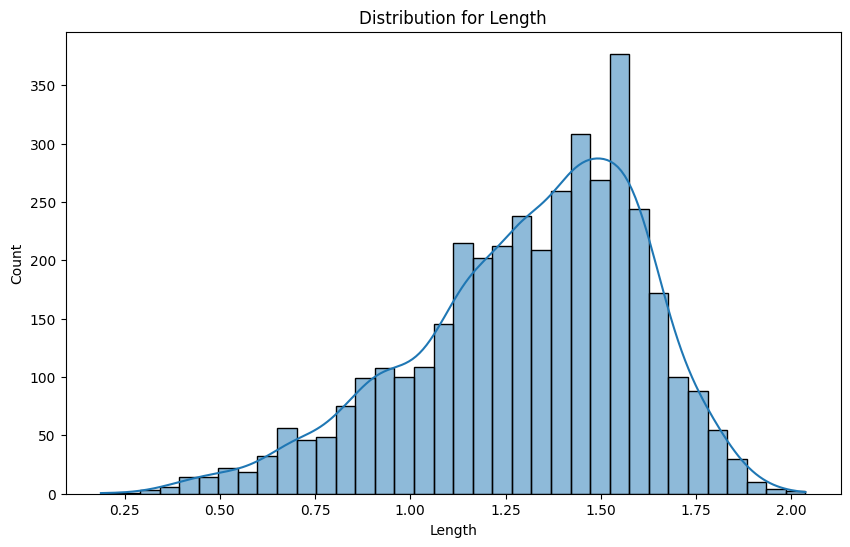

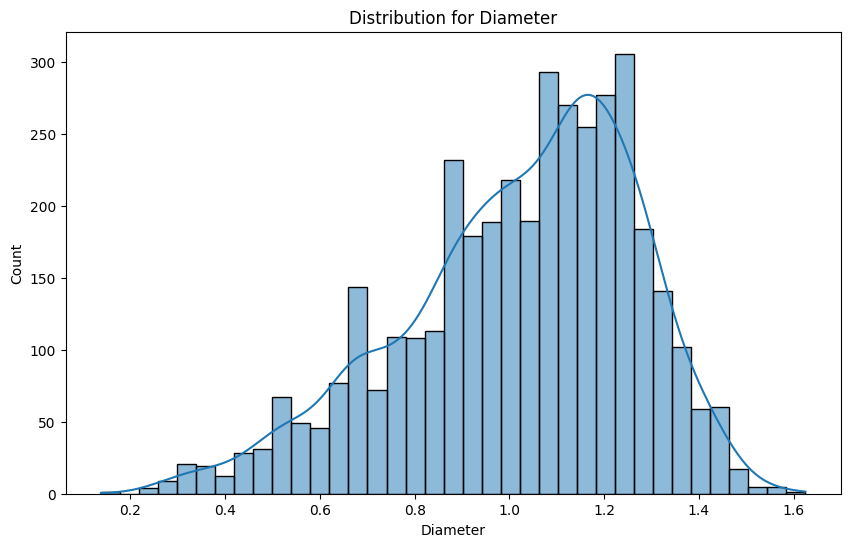

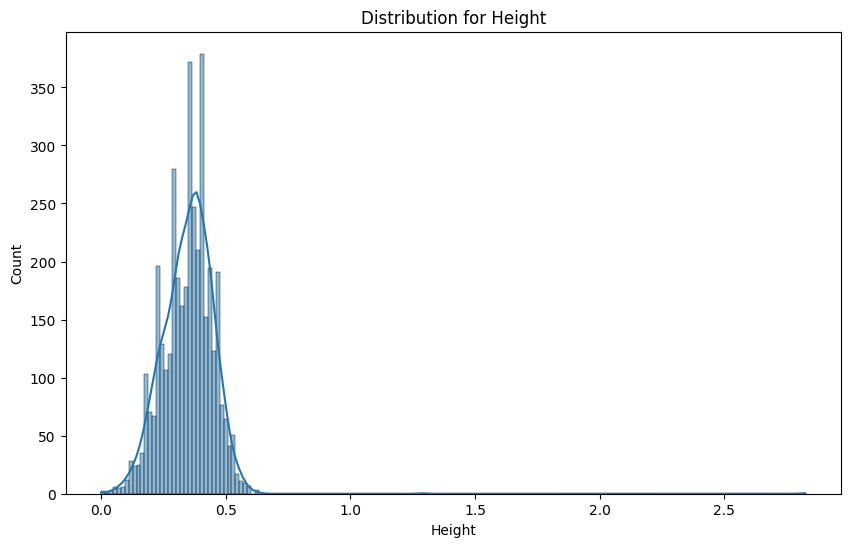

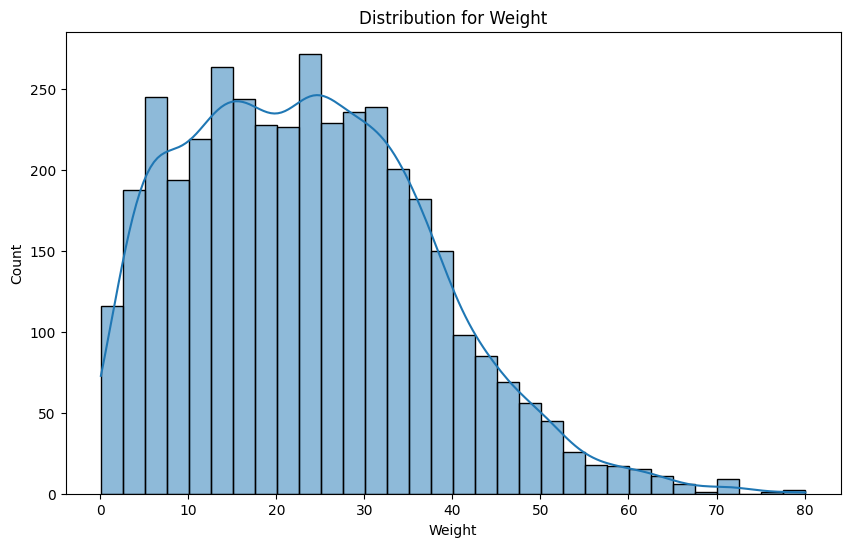

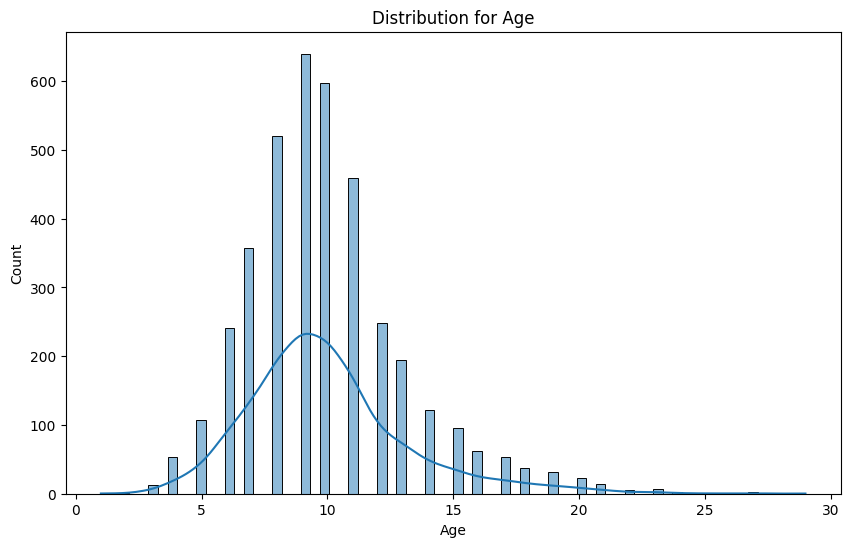

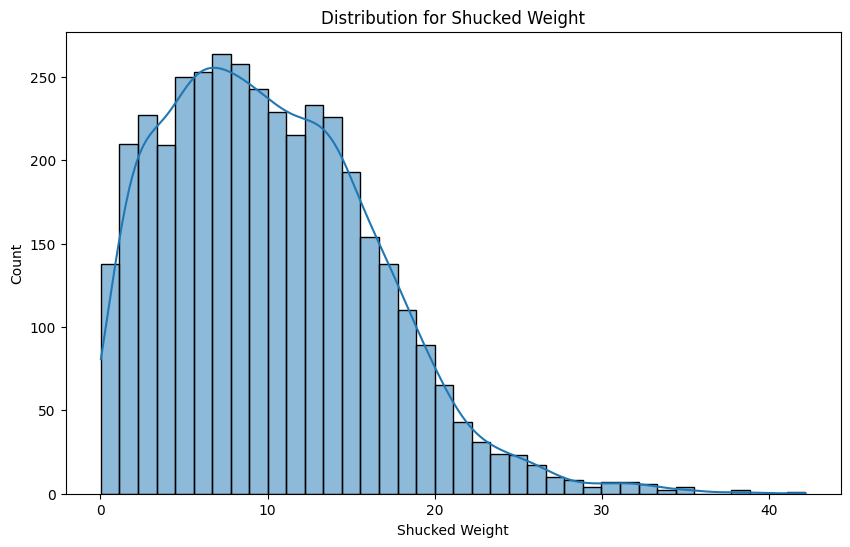

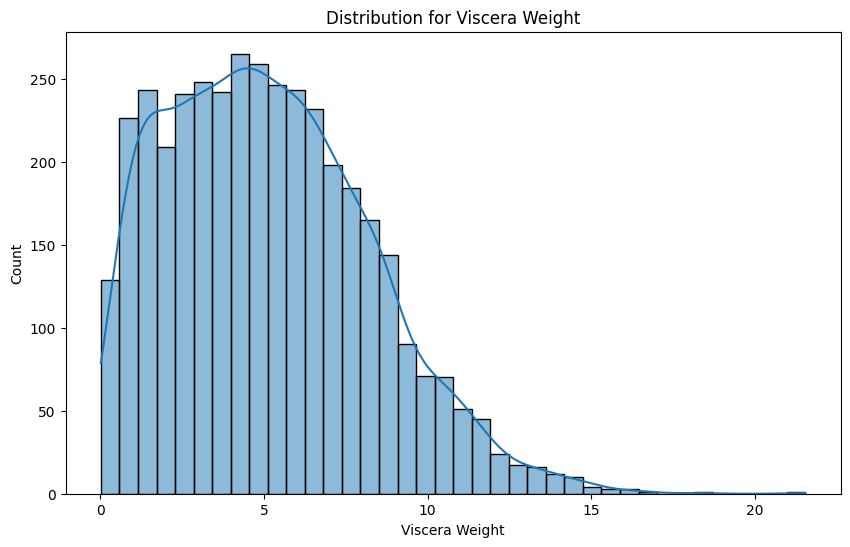

In [77]:
import seaborn as sns
import matplotlib.pyplot as plt

# 첫 번째 열을 제외한 나머지 열에 대해 시각화
for column in df.columns[1:]:
    plt.figure(figsize=(10,6))
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribution for {column}')
    plt.show()




age는 비교적 정규분포를 따르고 나머지 feature들은 한쪽에 몰려있는 특성이 있음

feature 중에서는 length 와 diameter가 0.99의 corrletion을 보이는것으로 보아, 모델을 만들때 length 와 diameter을 합쳐 예측의 분산을 줄이는 것도 생각할 수 있다. 하지만 다중공산성의 문제와 실제 머신러닝에서 예측은 다를 수 있기에 실험적으로 접근할 필요가 있어 보임

### Outlier 제거하기

In [78]:
def show():
  for column in df.columns[1:]:
    fig, axs = plt.subplots(1, 2, figsize=(16, 5)) # 1 row, 2 columns of subplots

    # First plot: Shucked Weight
    sns.scatterplot(data=df, x=column , y='Shucked Weight', color='orange', ax=axs[0])
    axs[0].set_title(f'Scatter Plot for {column} vs Shucked Weight')
    axs[0].set_xlabel(column)
    axs[0].set_ylabel('Shucked Weight')

    # Second plot: Viscera Weight
    sns.scatterplot(data=df, x=column , y='Viscera Weight', color='blue', ax=axs[1])
    axs[1].set_title(f'Scatter Plot for {column} vs Viscera Weight')
    axs[1].set_xlabel(column)
    axs[1].set_ylabel('Viscera Weight')

    plt.tight_layout() # Ensure subplots do not overlap
    plt.show()



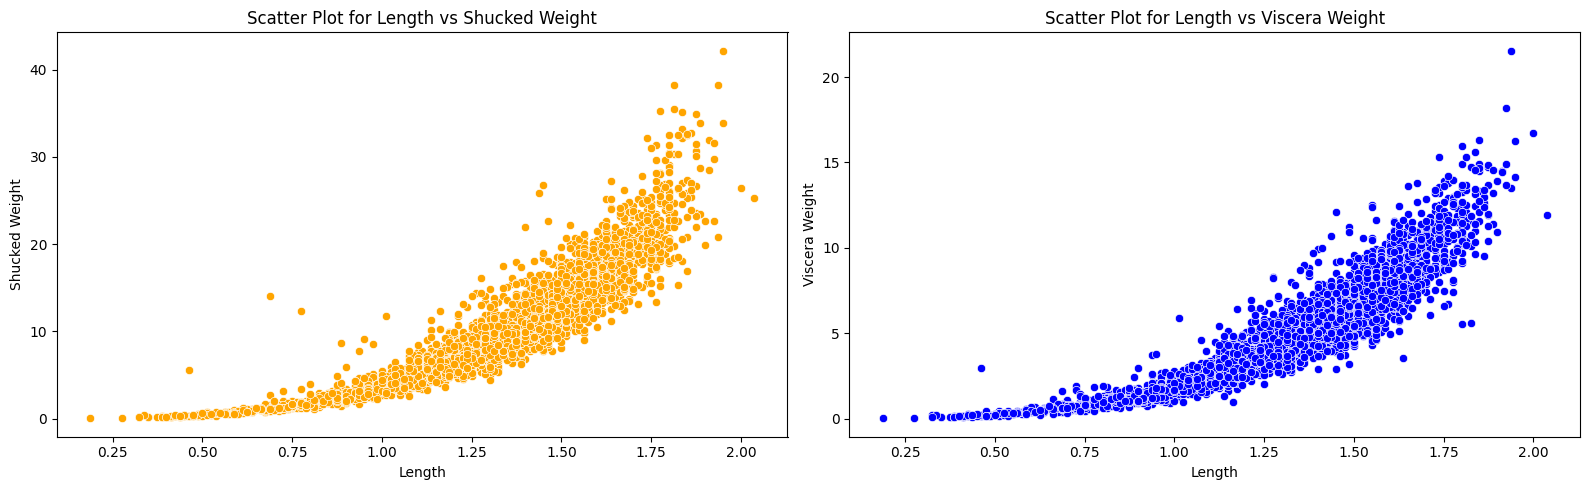

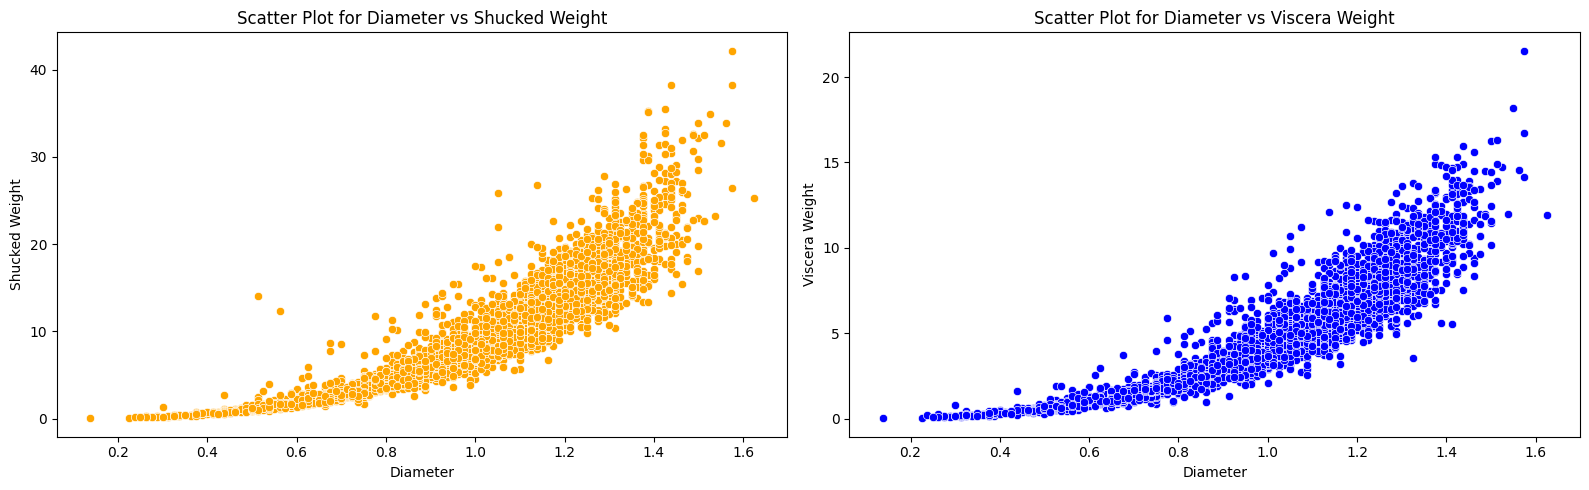

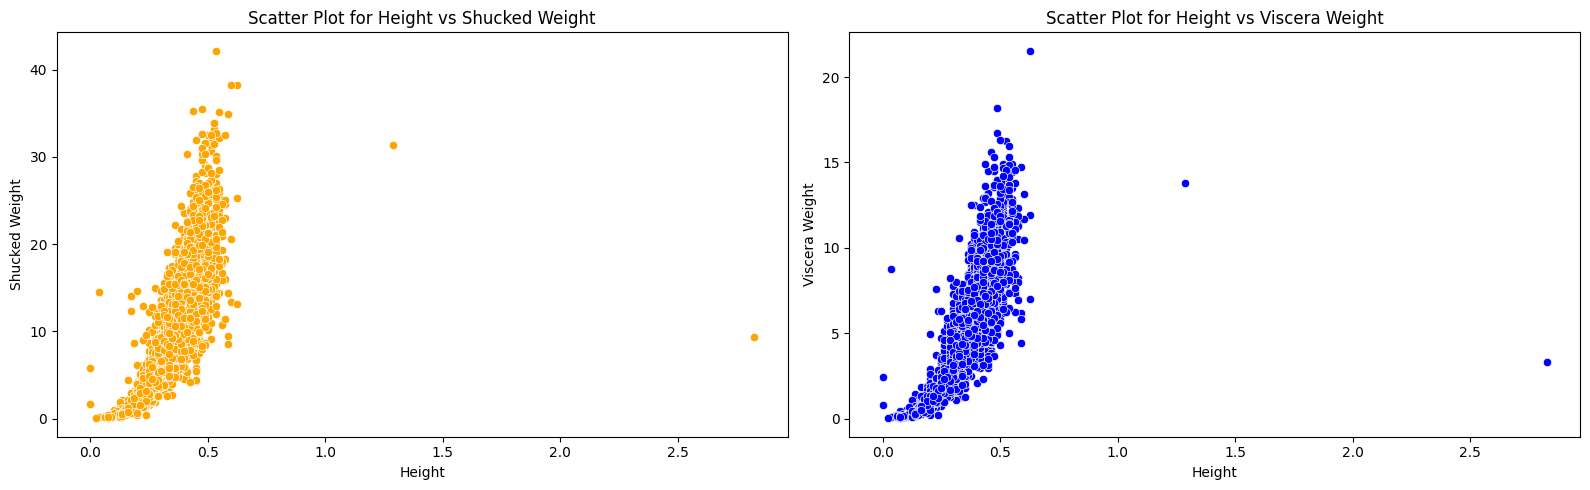

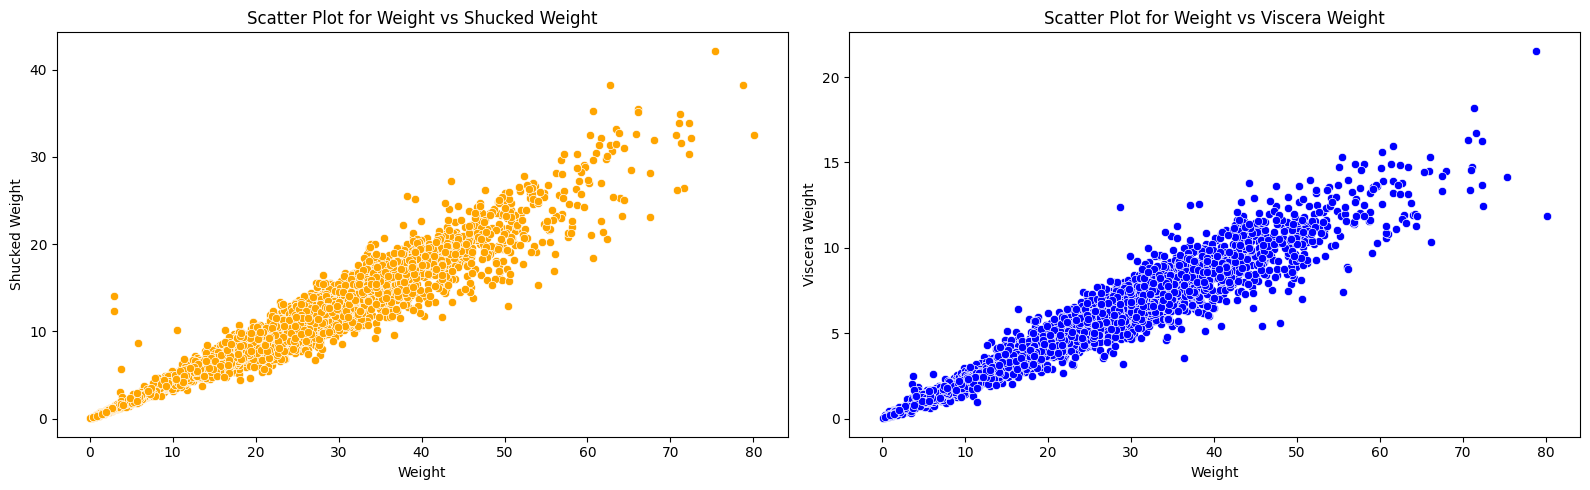

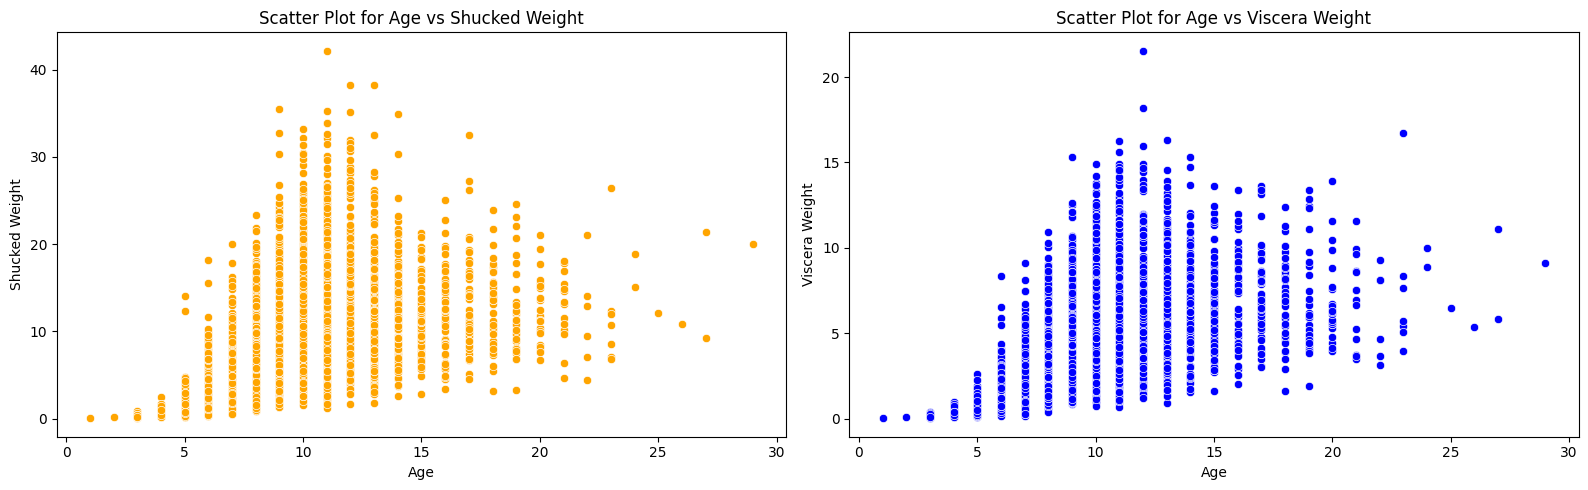

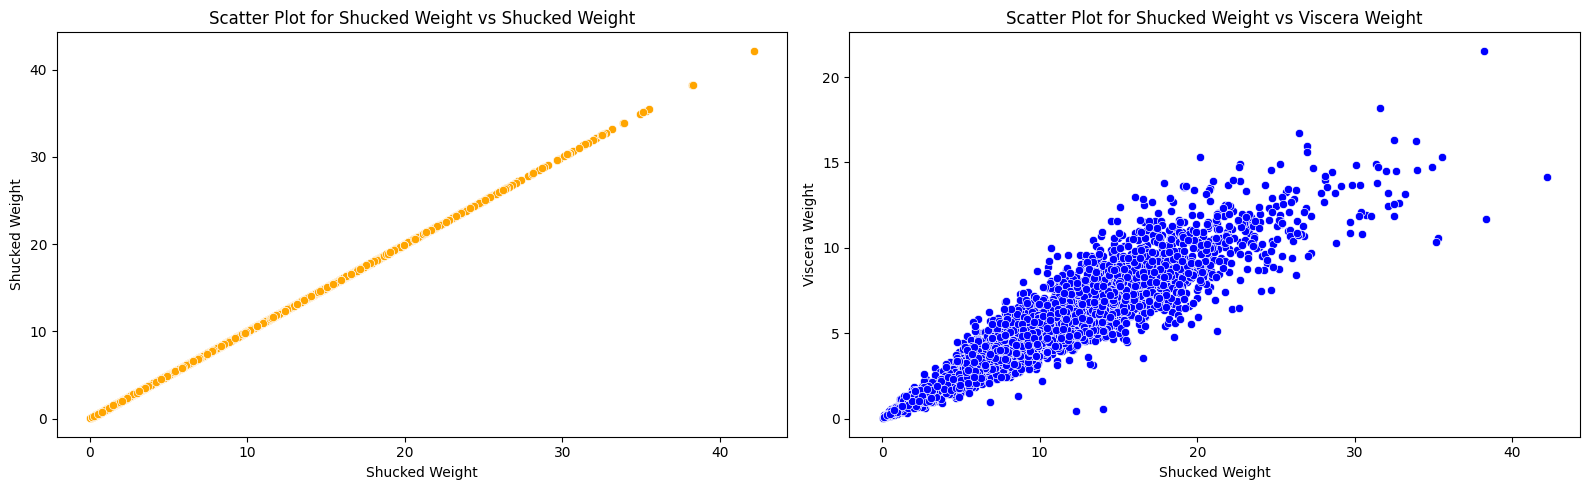

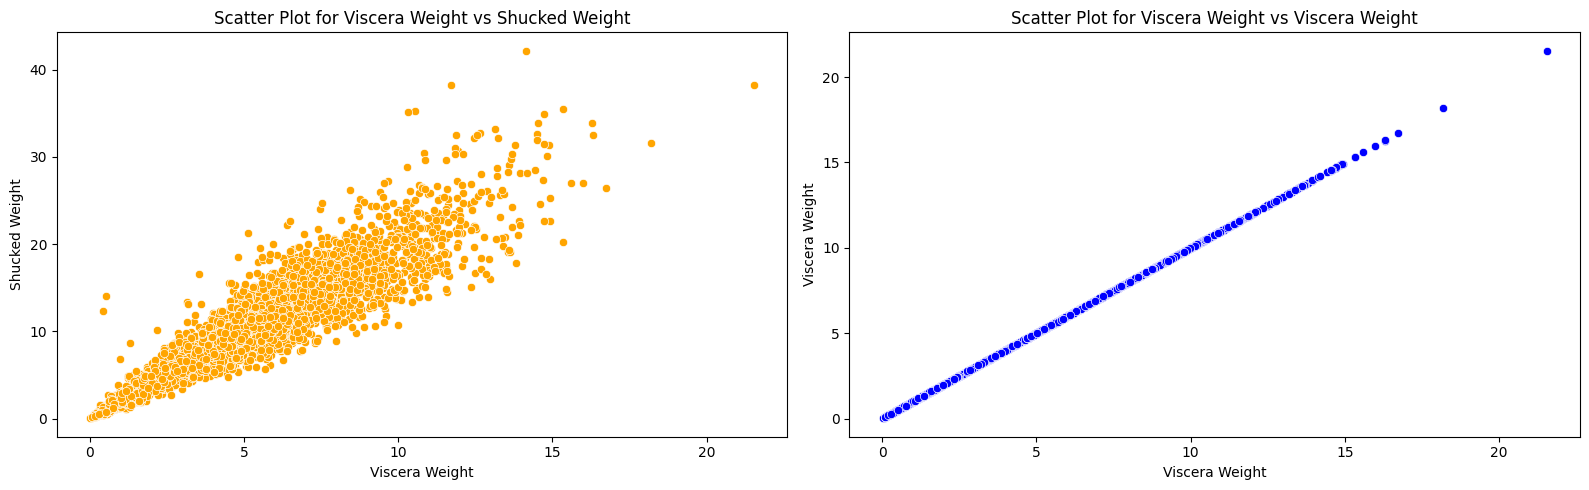

In [79]:
show()

## target 값(2개)에 가장 큰 연관도를 보이는 weight, length 위주로 이상치를 제거하자

In [80]:
# 먼저 height 산점도를 보면 1.0 보다 큰 비정상적인 데이터가 보인다. 이를 먼저 제거해준다.

df= df.drop(df[df['Height'] > 1.0].index)
df = df.reset_index(drop=True)

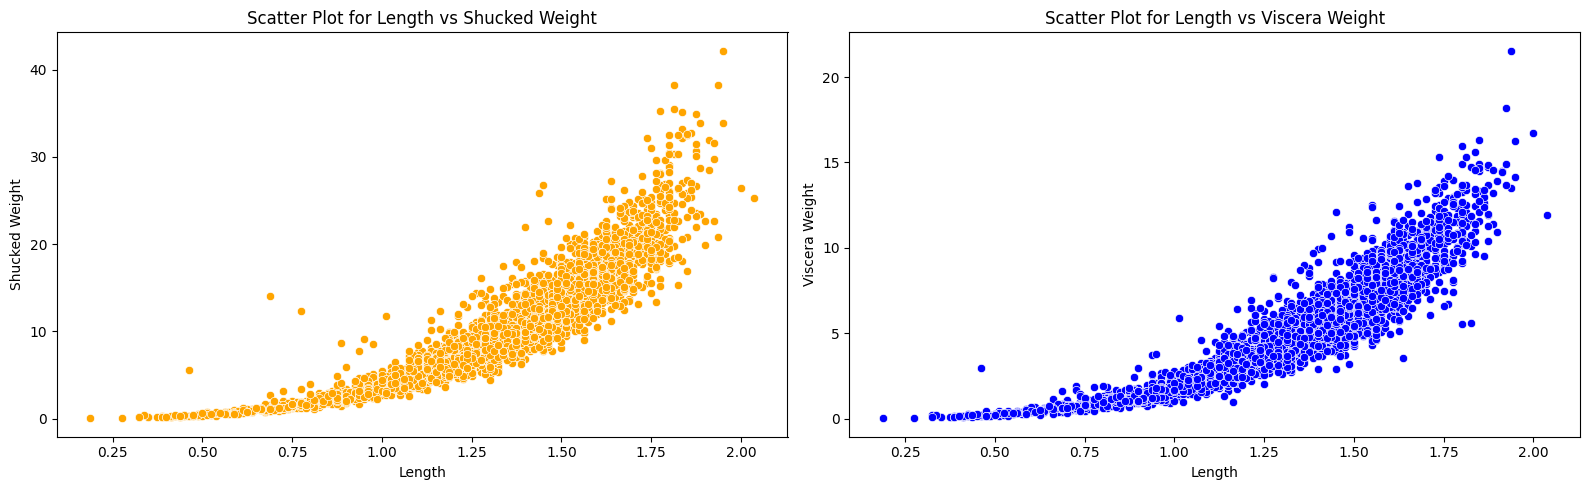

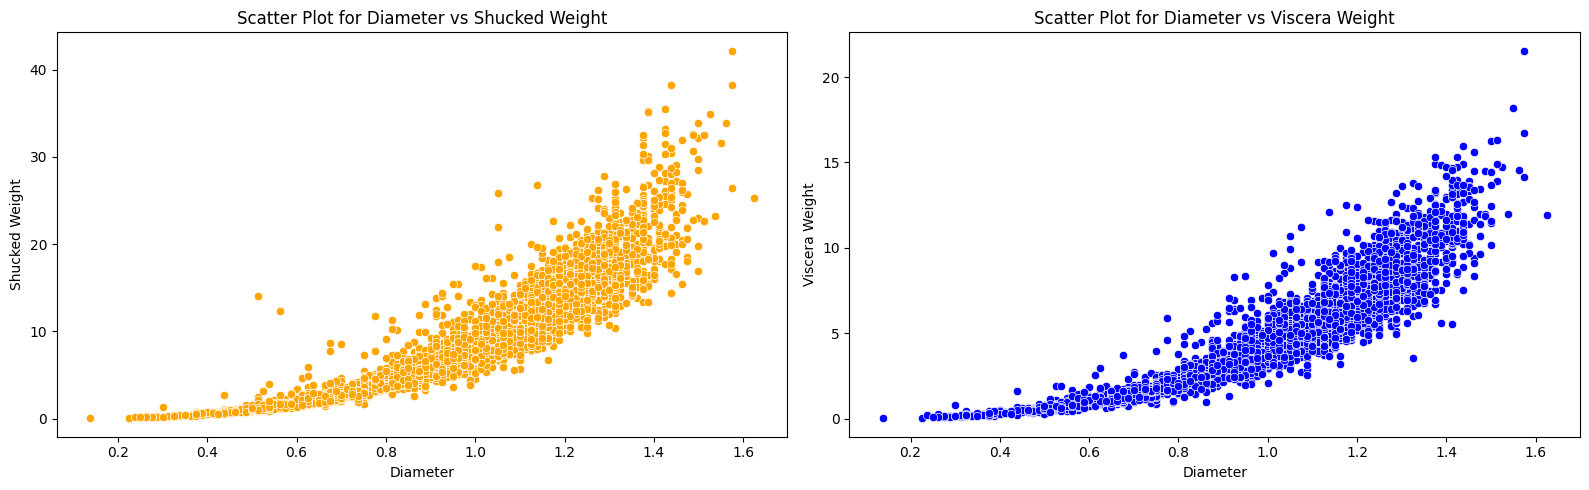

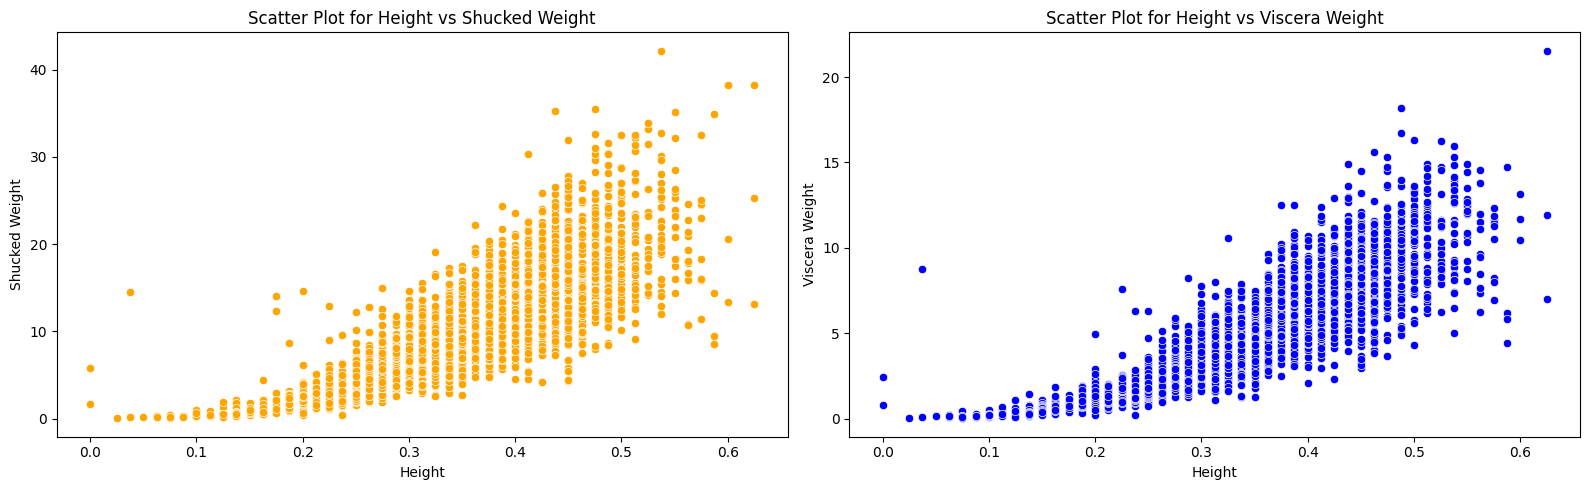

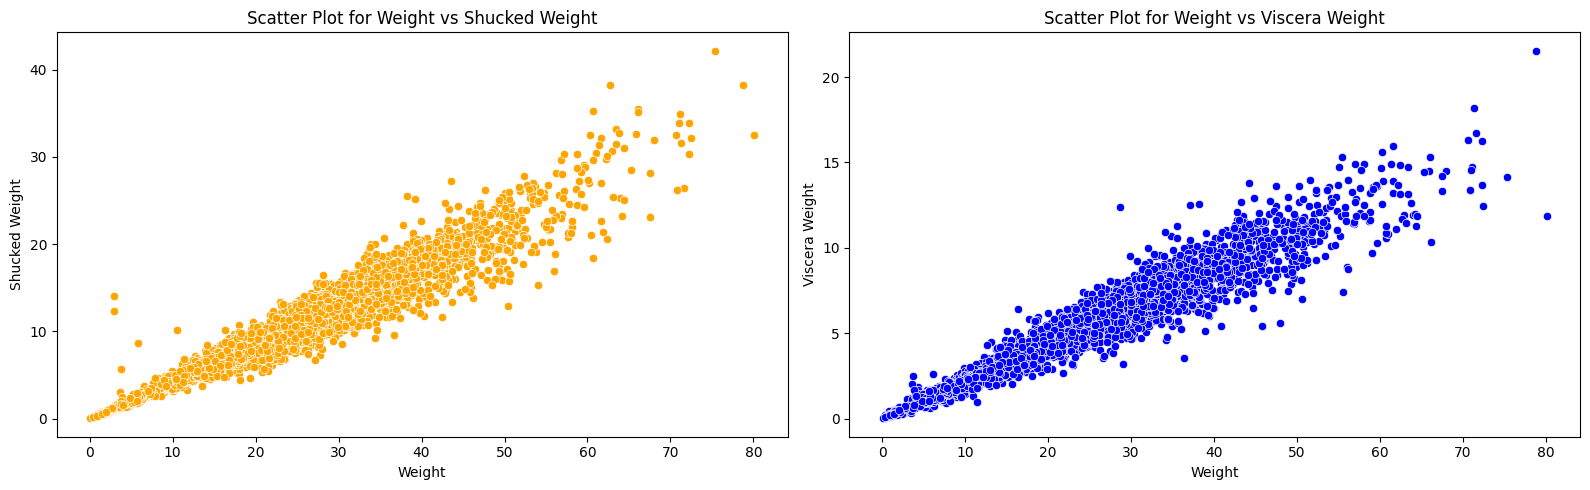

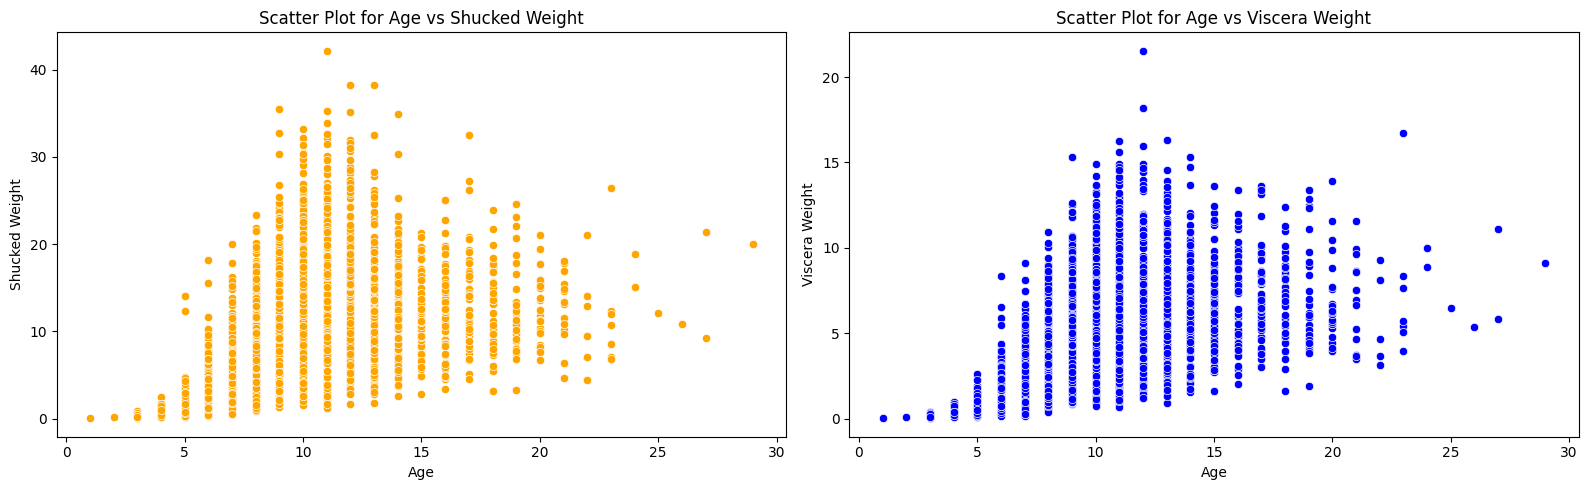

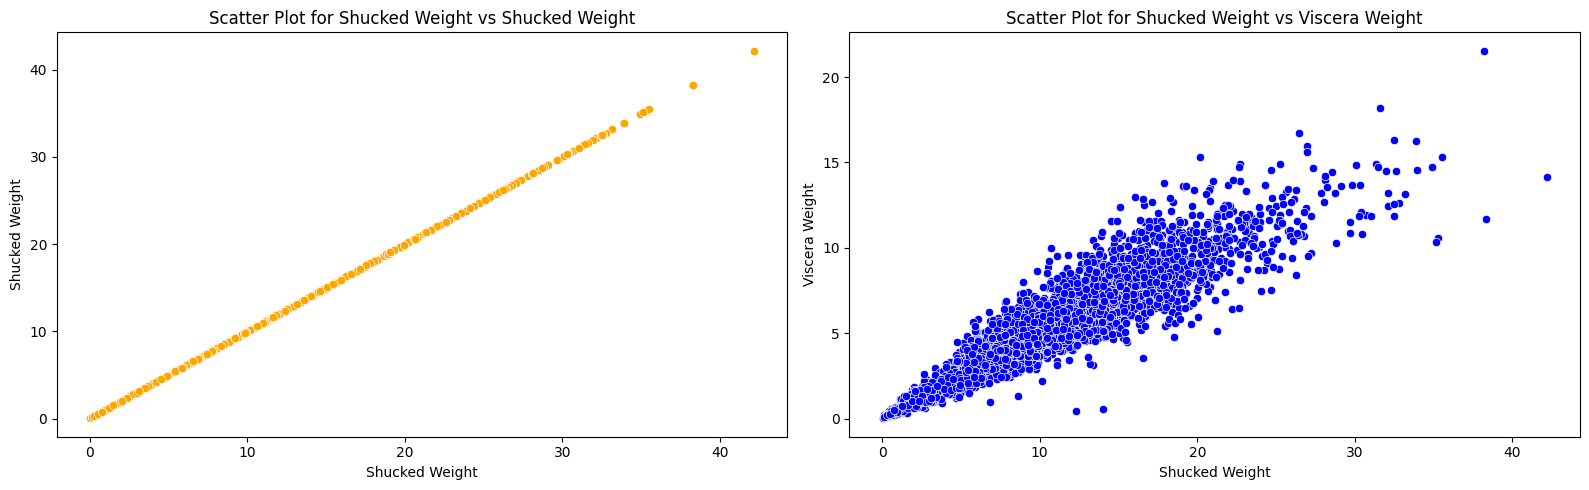

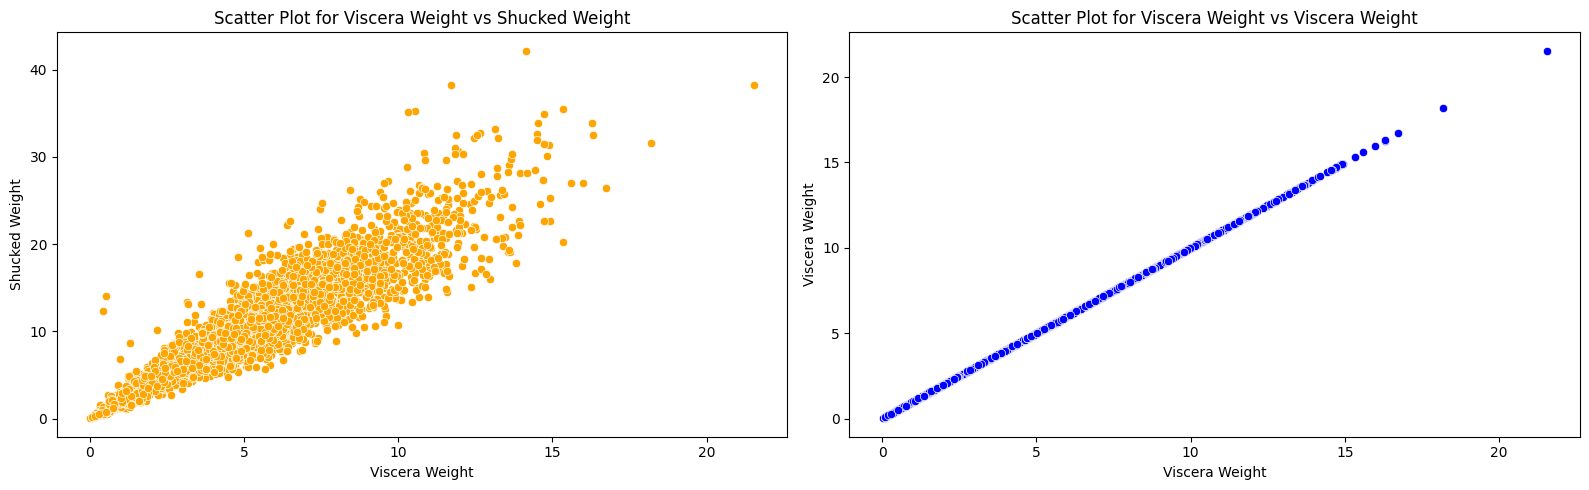

In [81]:
show()

# 전체무게(Weight)보다 Viscera weight 또는 Shucked weight가 클 수 없기 때문에 datapoint에서 weight 보다 먼저 한개라도 큰 값들은 전부 이상치로 판별하기

In [82]:
# 'Shucked Weight'이 'Weight'보다 큰 행을 찾아내어 인덱스를 저장
outlier_index = df[df['Shucked Weight'] > df['Weight']].index

# 해당 인덱스의 행을 제거
df = df.drop(outlier_index, axis=0)
df = df.reset_index(drop=True)

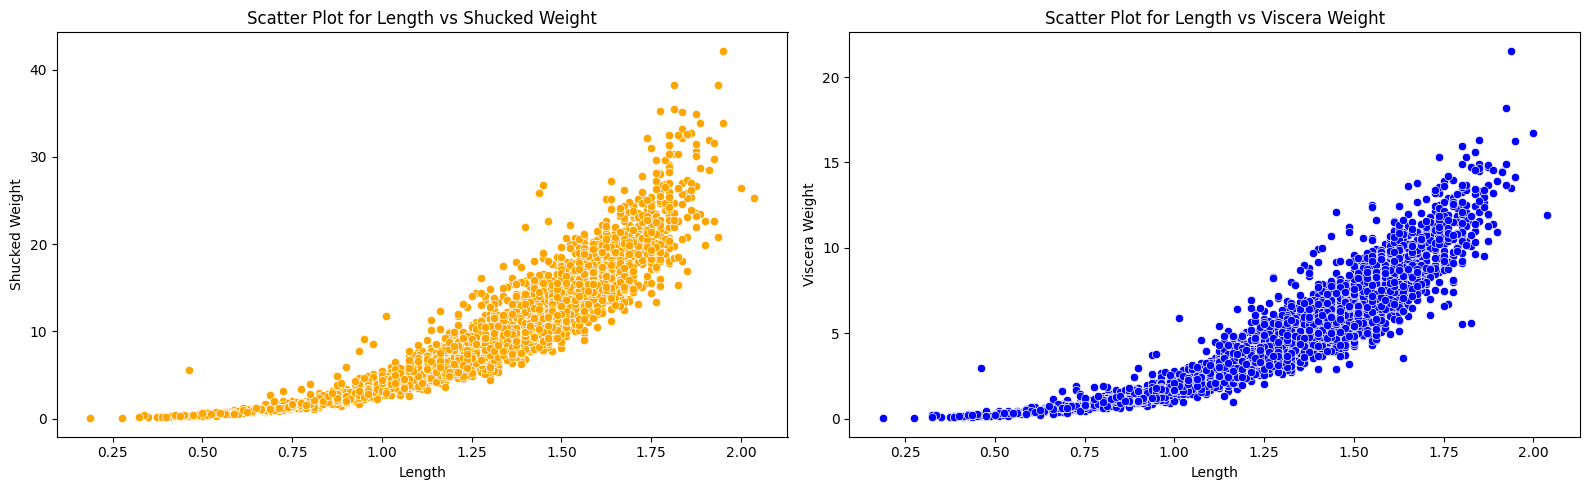

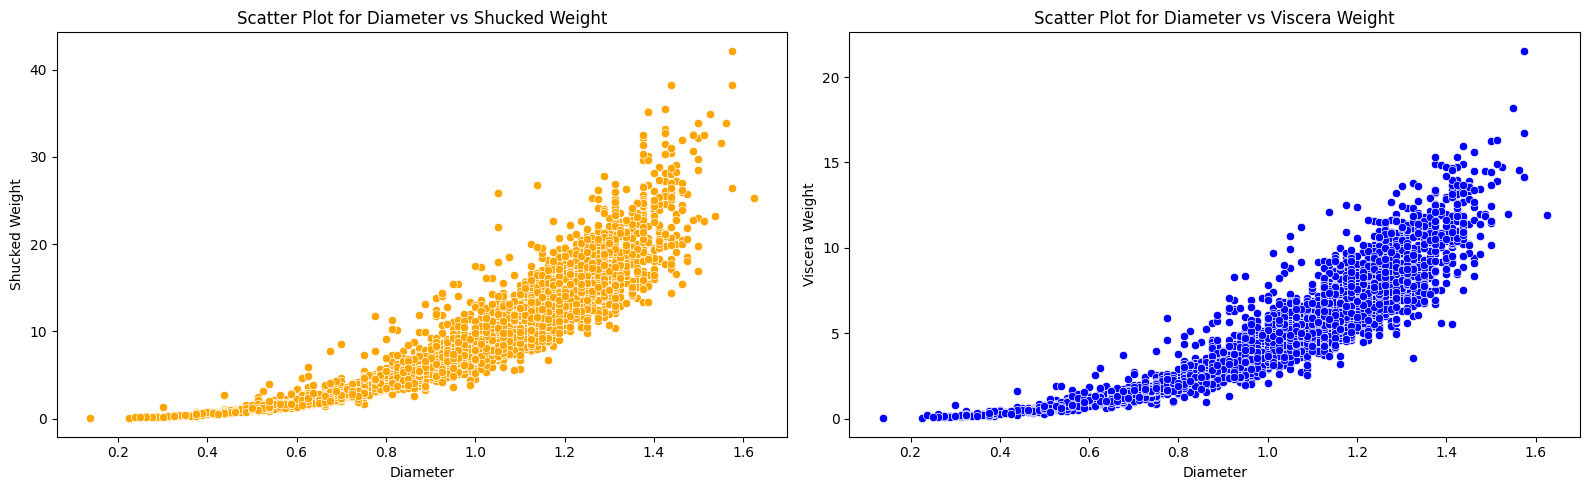

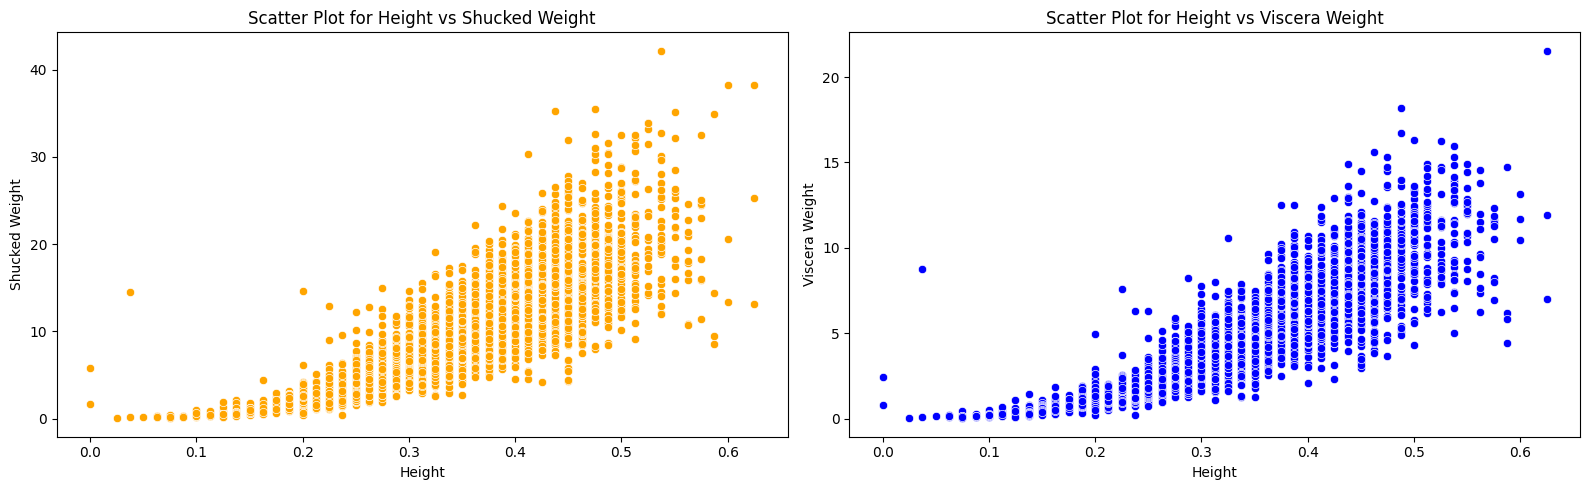

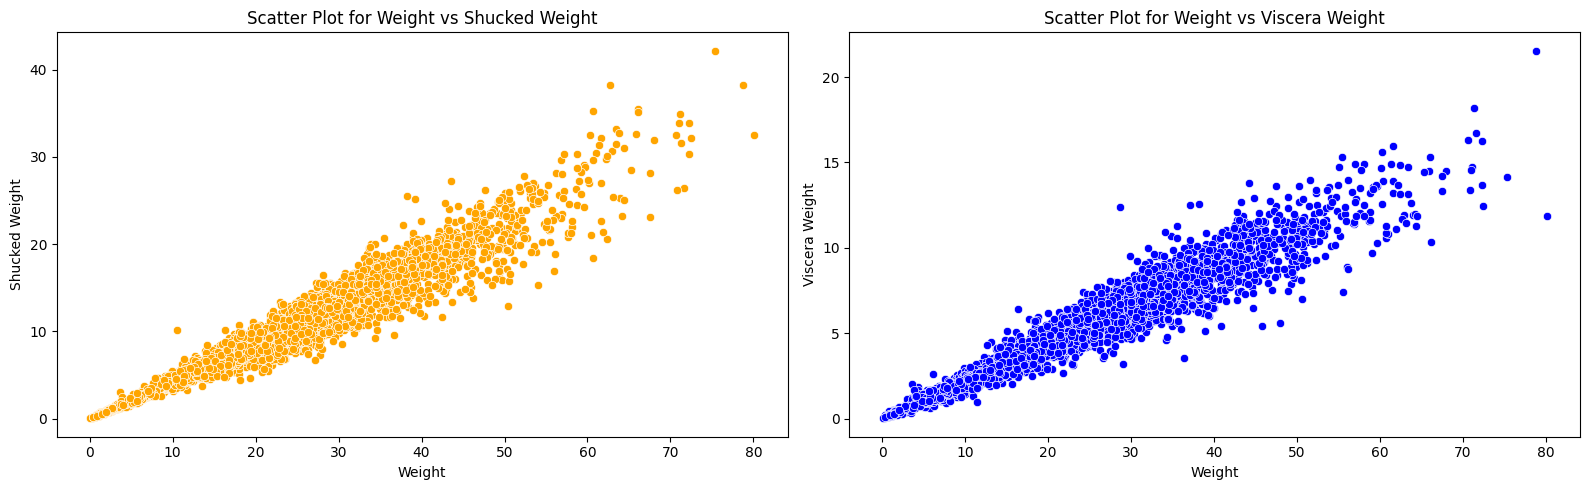

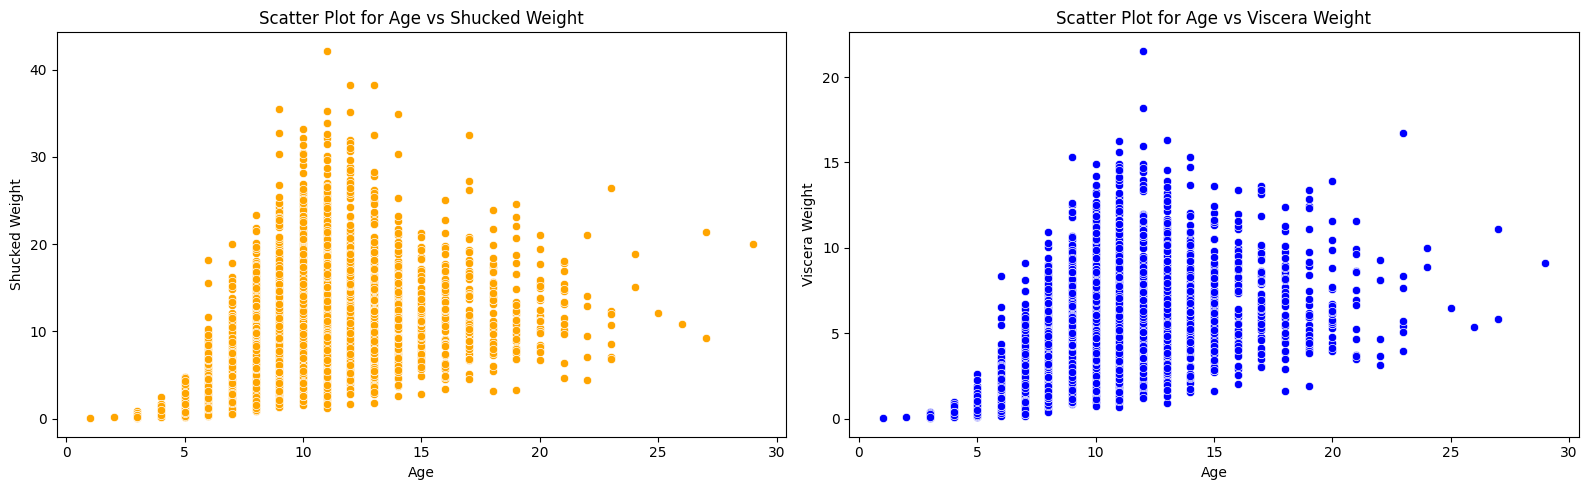

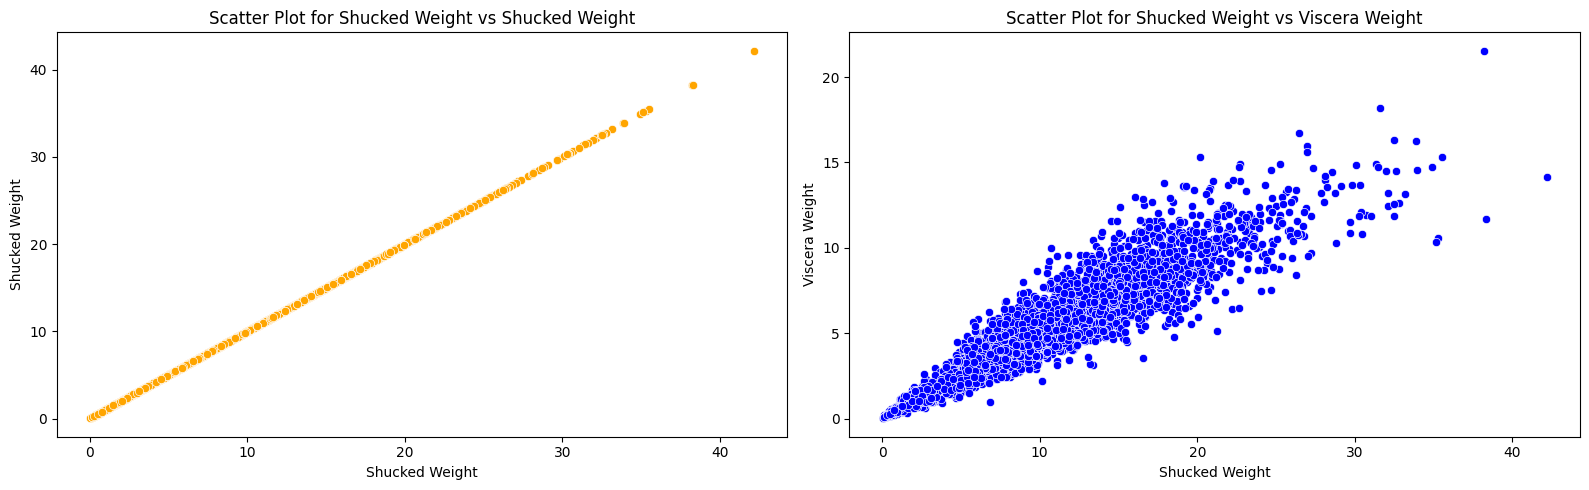

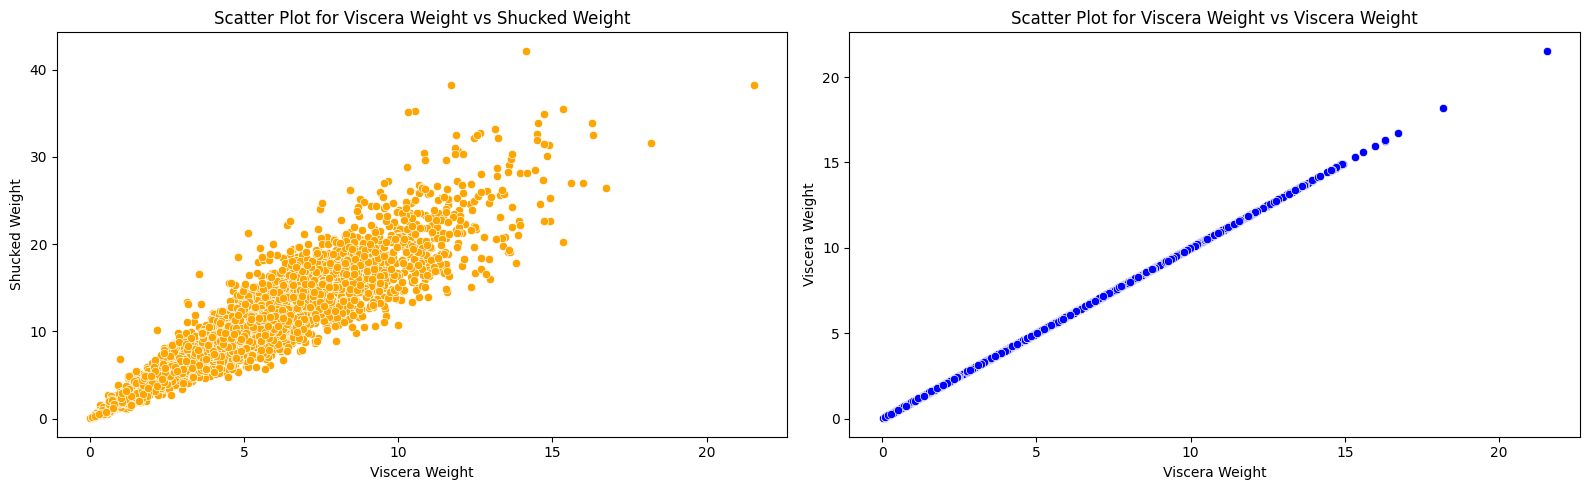

In [83]:
show()

다음으로 weight < shucked weight + viscera weight가 큰 행들을 제거해주자

In [84]:
# 'Shucked Weight' + 'Viscera Weight'이 'Weight'보다 큰 행을 찾아냅니다
outlier_rows = df[df['Weight'] < df['Shucked Weight'] + df['Viscera Weight']]

# 결과를 출력합니다
print(outlier_rows)

     Sex  Length  Diameter  Height     Weight  Age  Shucked Weight  \
859    I  1.1375    0.8250  0.2500  10.546014  8.0       10.149121   
905    I  1.0000    0.7750  0.2500   3.600386  7.0        3.005047   
1175   I  0.3250    0.2375  0.0875   0.297670  4.0        0.141747   
2359   I  0.4750    0.3250  0.0750   0.836310  6.0        0.439417   
3399   I  0.9500    0.6875  0.2375   3.898056  7.0        2.438057   

      Viscera Weight  
859         2.197086  
905         2.012815  
1175        0.184272  
2359        0.425243  
3399        1.658446  


In [85]:
# 'Shucked Weight' + 'Viscera Weight'이 'Weight'보다 큰 행을 찾아내어 인덱스를 저장
outlier_index = df[df['Weight'] < df['Shucked Weight'] + df['Viscera Weight']].index

# 해당 인덱스의 행을 제거
df = df.drop(outlier_index, axis=0)
df = df.reset_index(drop=True)

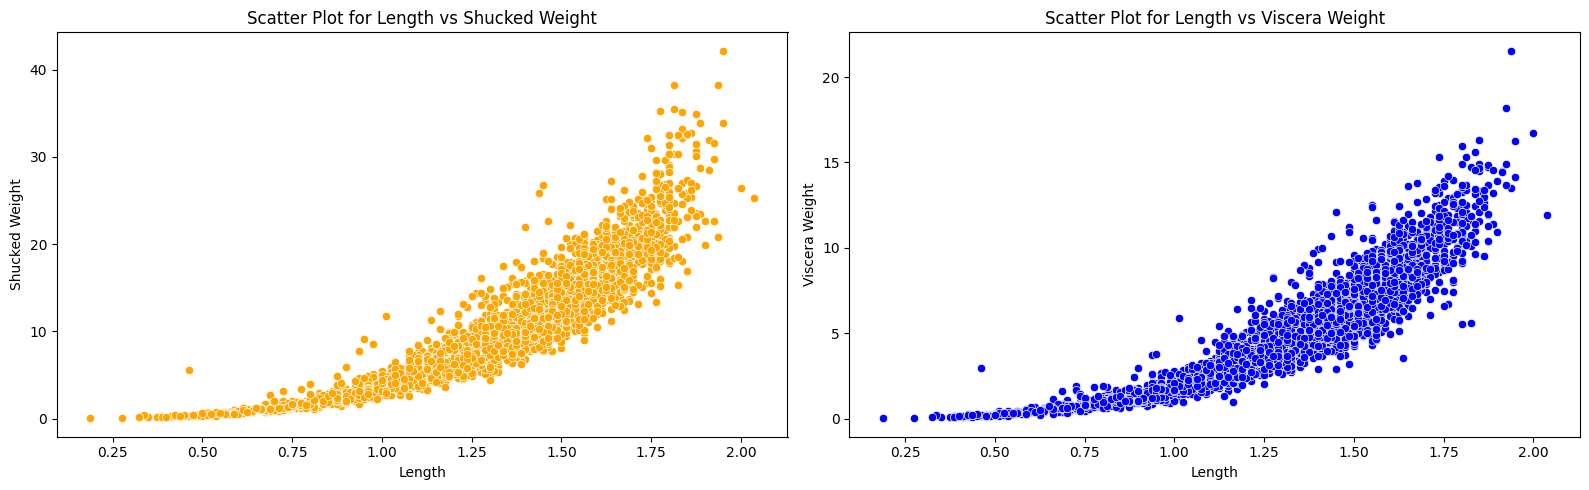

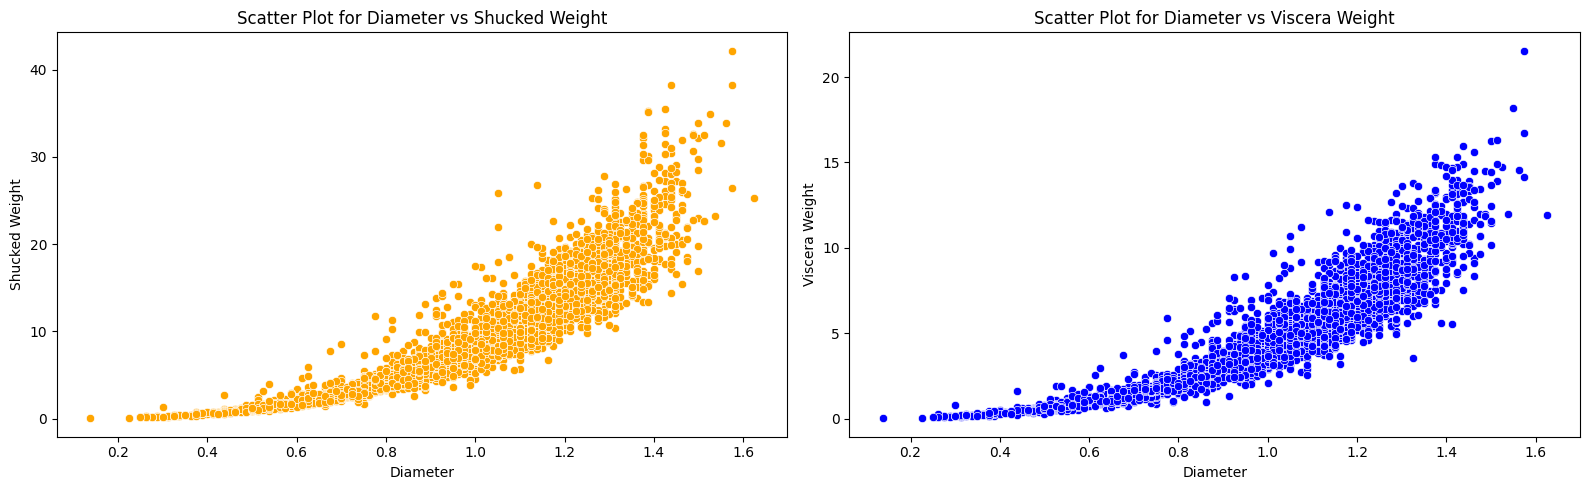

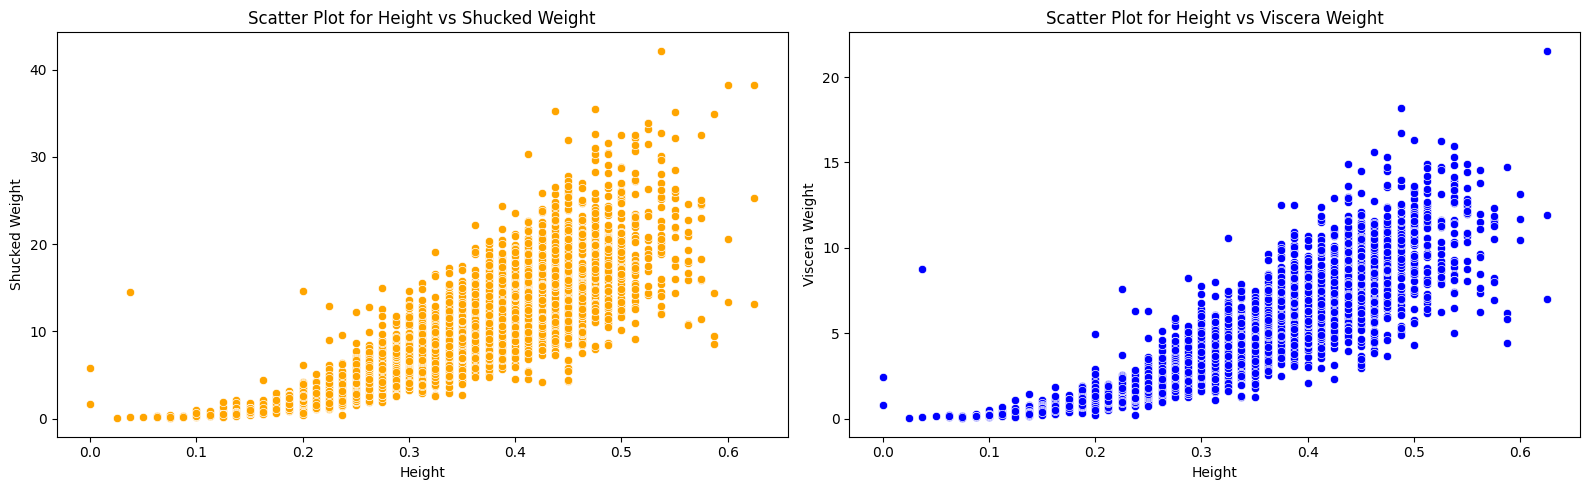

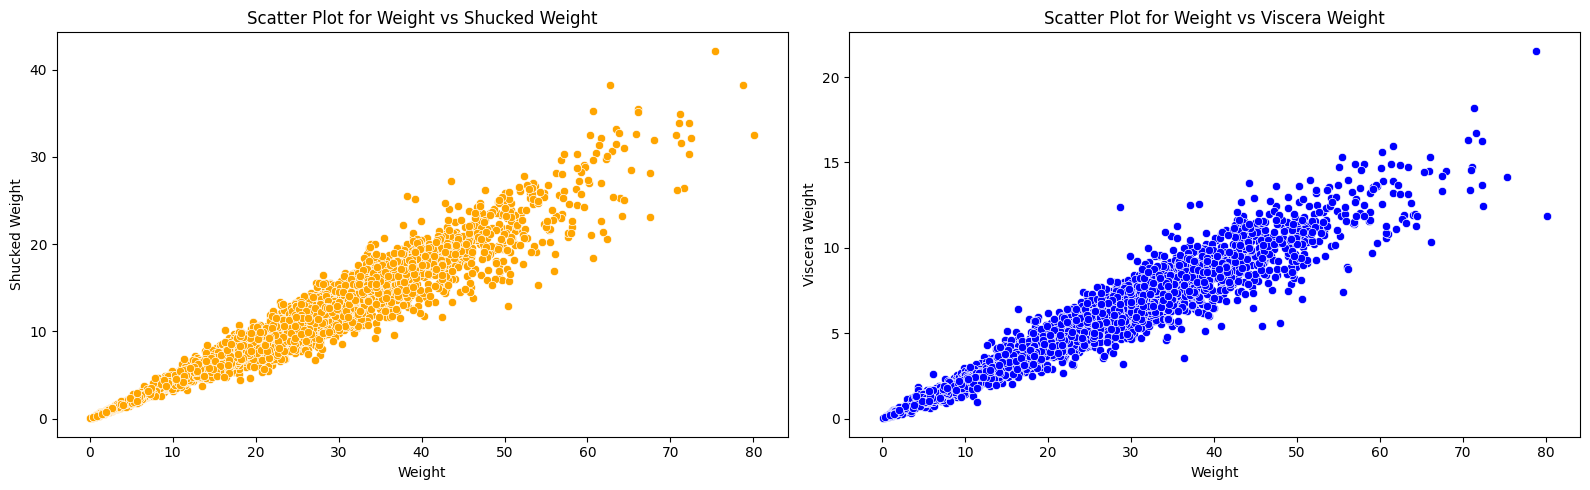

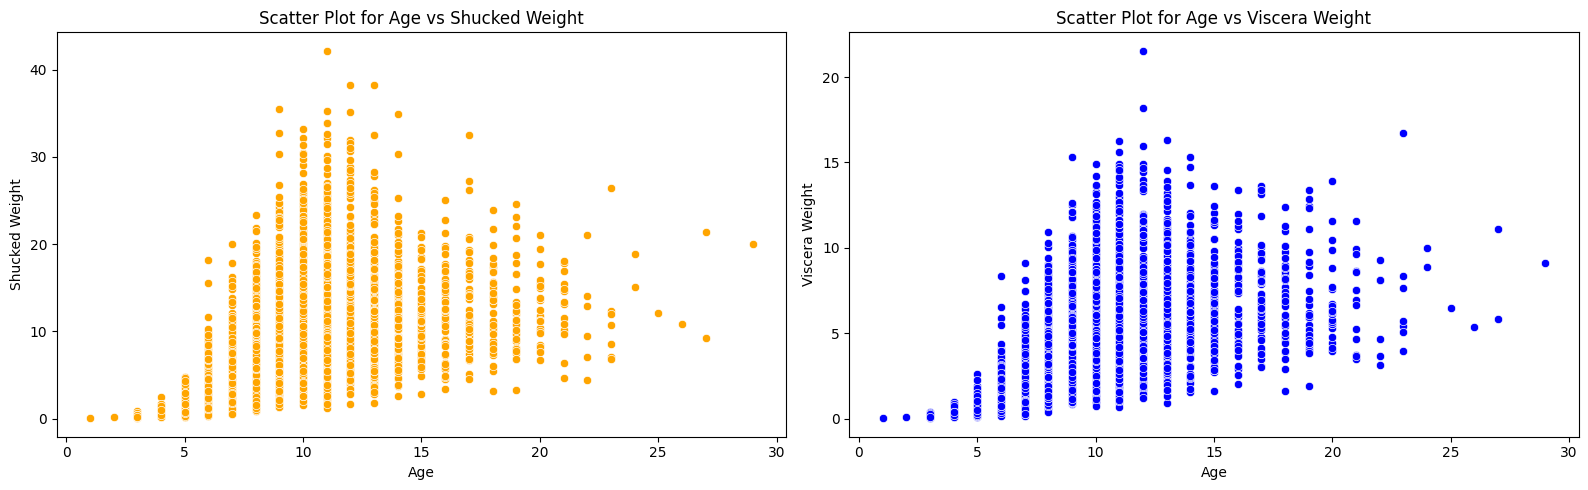

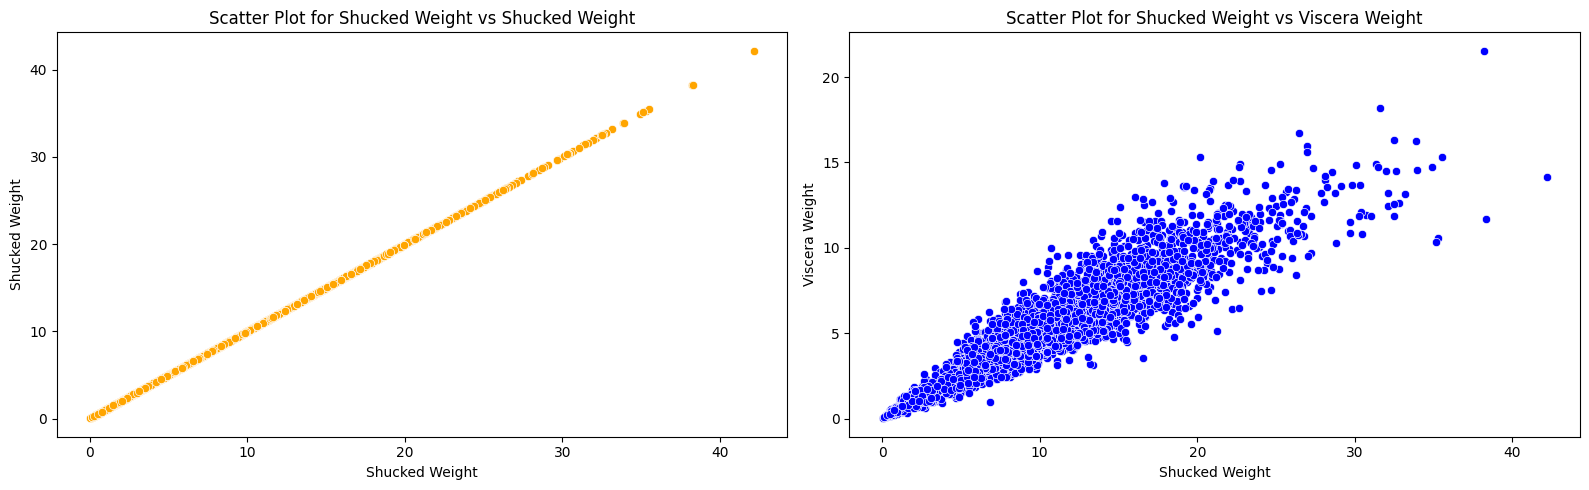

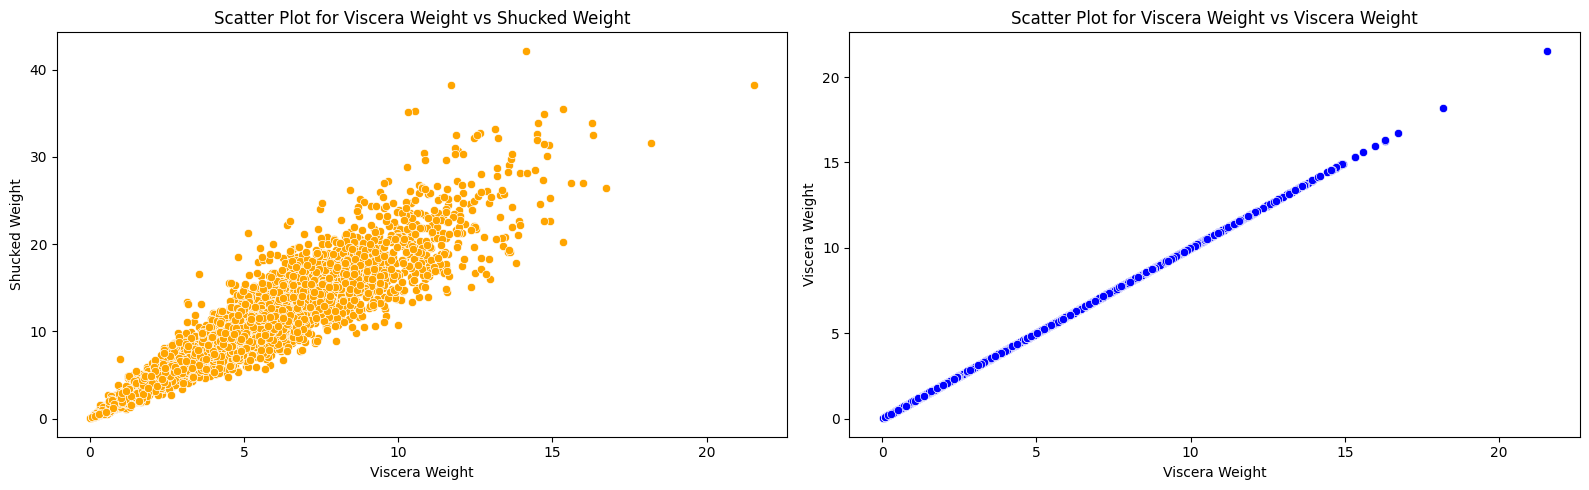

In [86]:
show()

# Weight 가 0 인 데이터들 제외

In [87]:
# 'Weight'이 0인 행을 찾아내어 인덱스를 저장
zero_weight_index = df[df['Weight'] == 0].index

# 해당 인덱스의 행을 제거
df = df.drop(zero_weight_index, axis=0)
df = df.reset_index(drop=True)

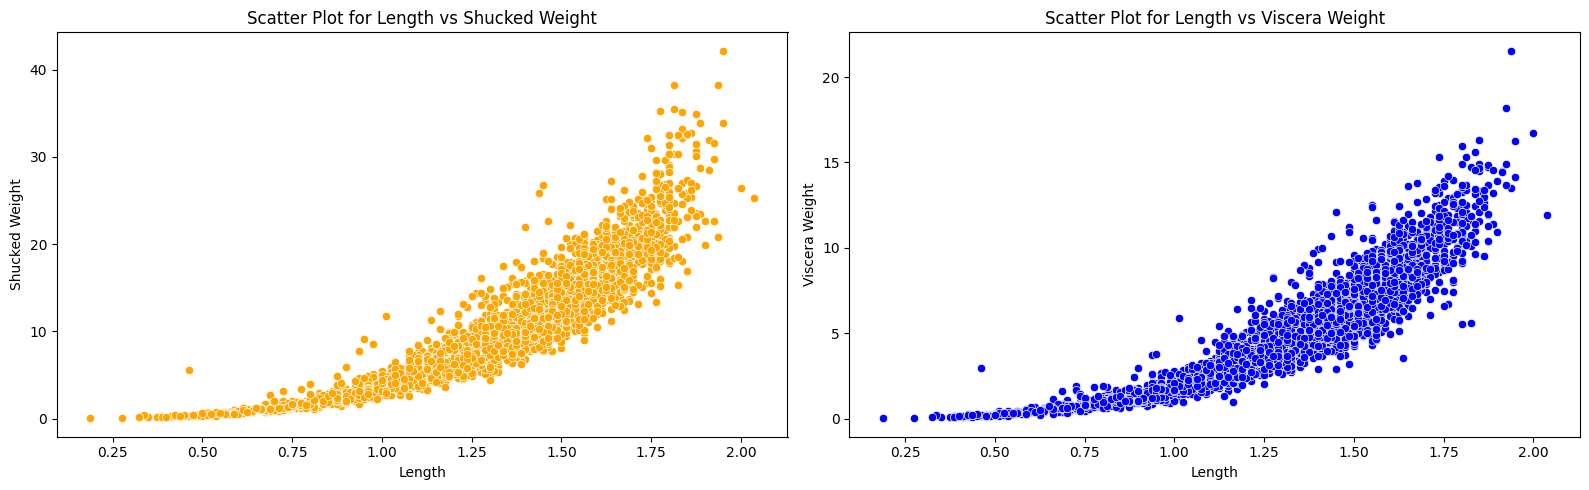

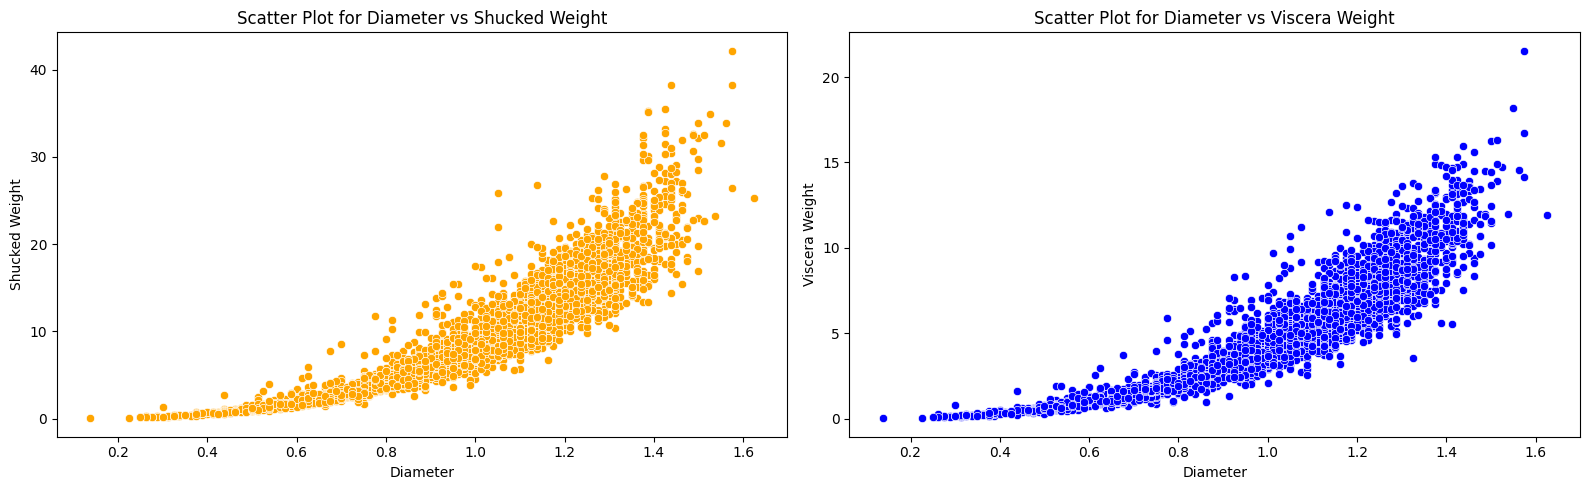

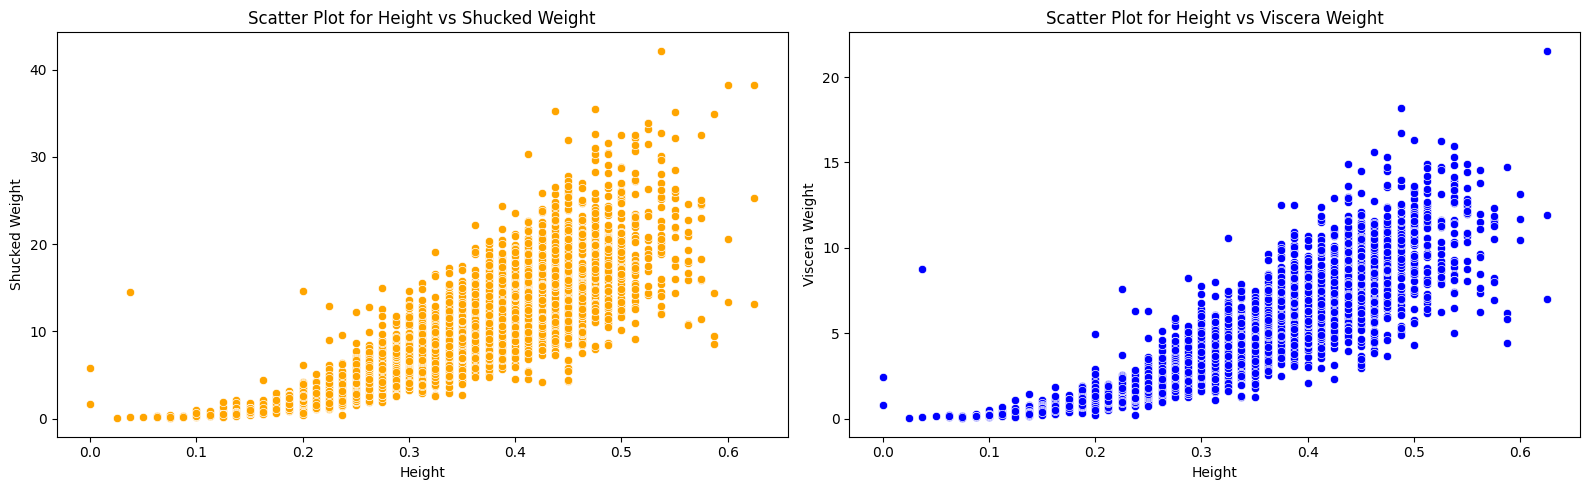

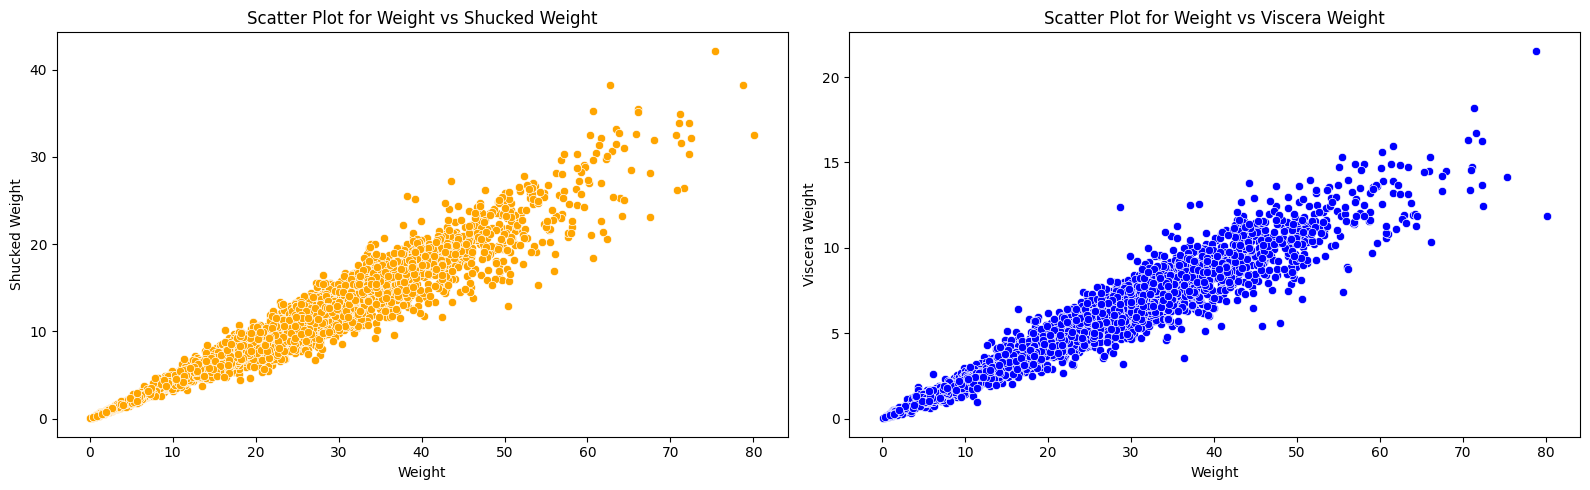

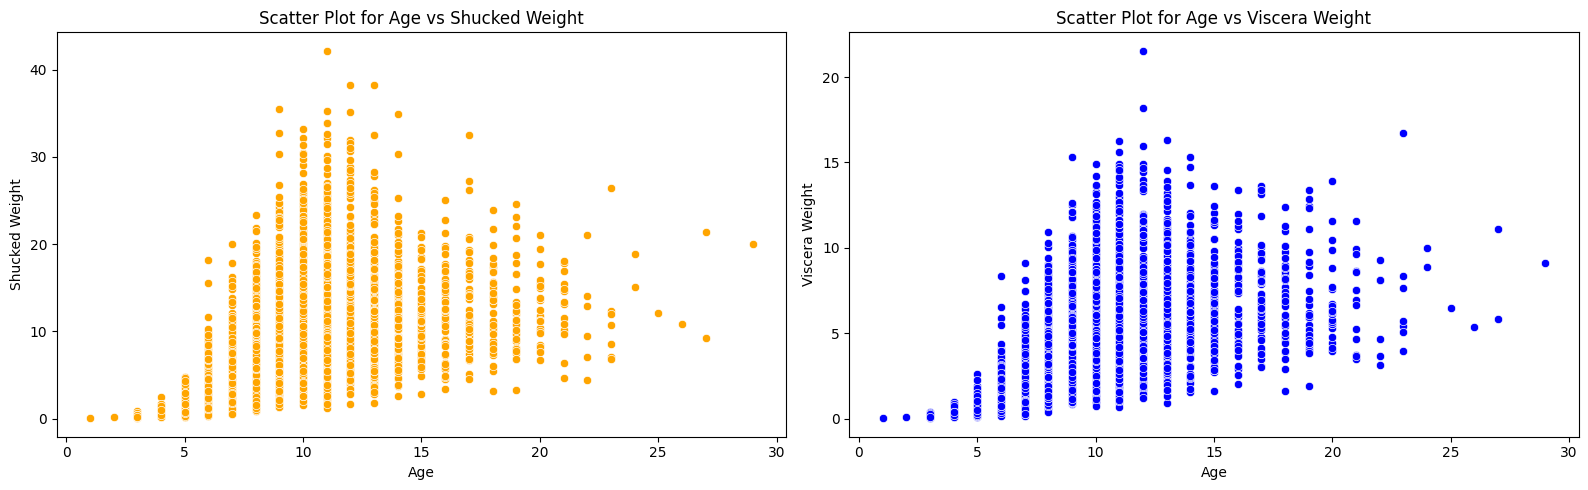

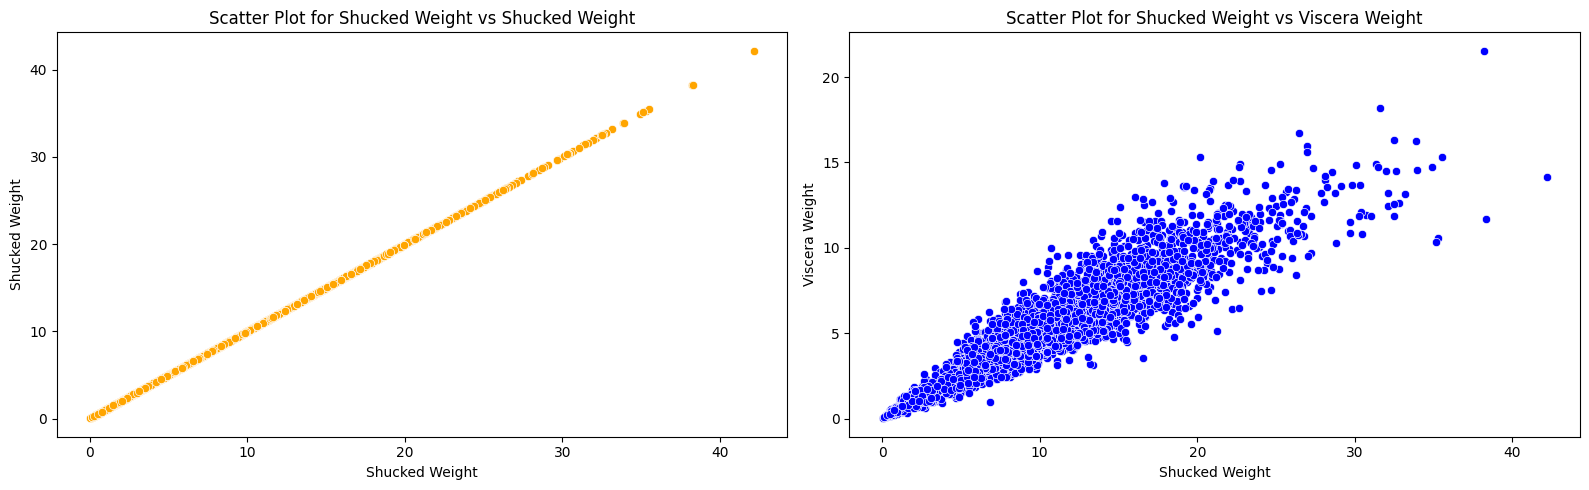

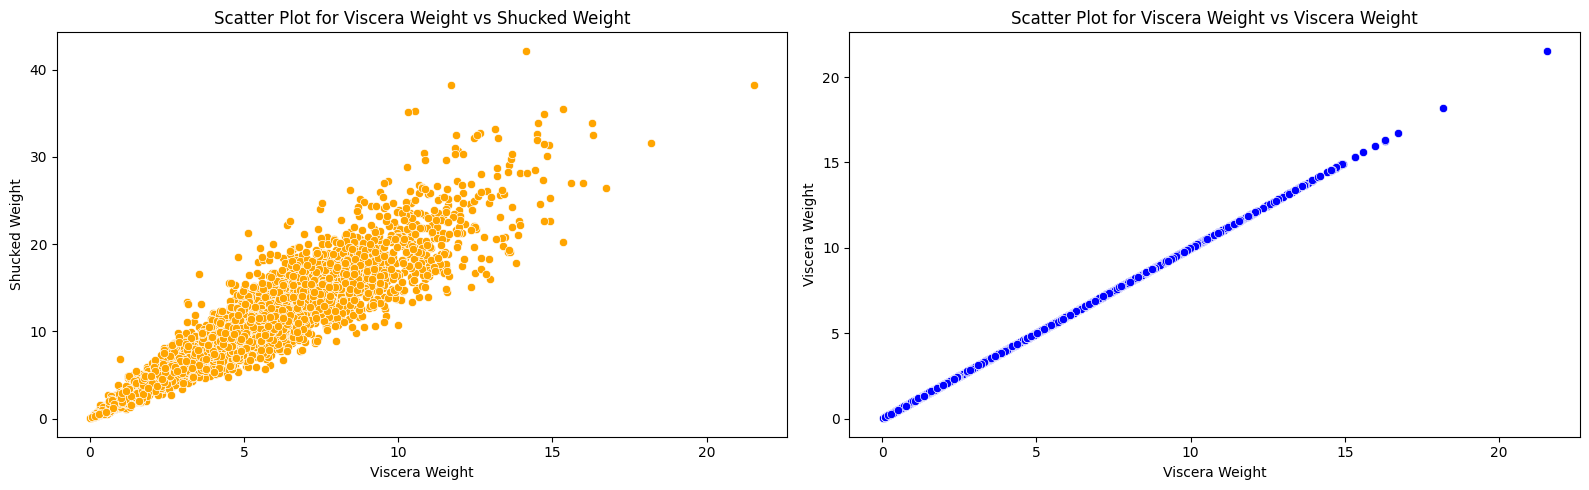

In [88]:
show()

# height 가 0인데 Shucked Weight가 0이 아닌 데이터들 이상치로 판단

In [89]:
# 'Weight'이 0인 행을 찾아내어 인덱스를 저장
zero_height_index = df[df['Height'] == 0].index

print(zero_height_index)

print(df.loc[269,:])
print(df.loc[3856, :])

Int64Index([269, 3856], dtype='int64')
Sex                      I
Length              0.7875
Diameter             0.575
Height                 0.0
Weight            3.798833
Age                    6.0
Shucked Weight    1.630096
Viscera Weight    0.807961
Name: 269, dtype: object
Sex                       I
Length                1.075
Diameter               0.85
Height                  0.0
Weight            12.133586
Age                     8.0
Shucked Weight     5.854172
Viscera Weight     2.438057
Name: 3856, dtype: object


In [90]:
# height 가 0 인것은 말이 안되므로 이상치로 판단 및 제거 진행
# 해당 인덱스의 행을 제거
df = df.drop(zero_height_index, axis=0)
df = df.reset_index(drop=True)

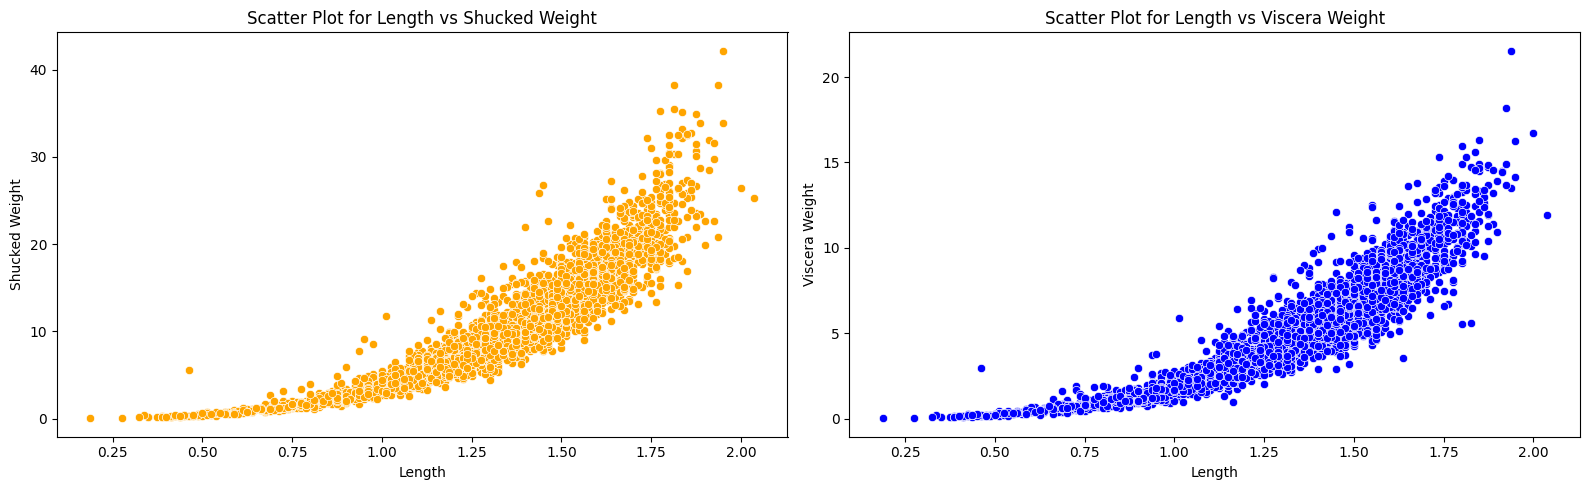

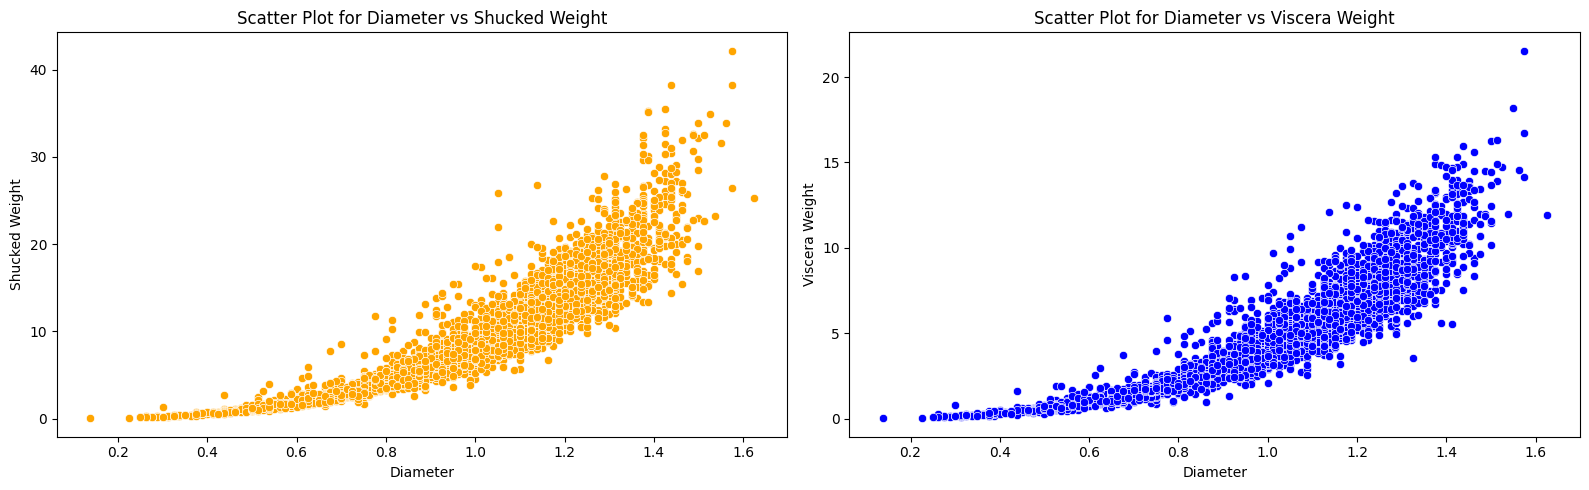

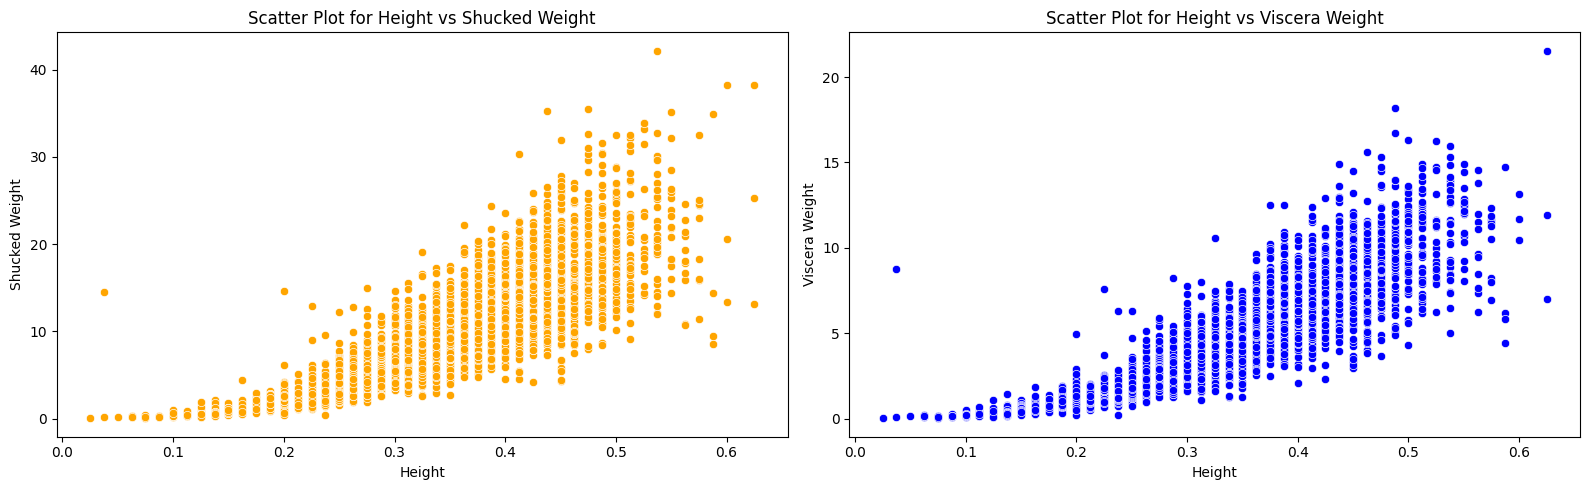

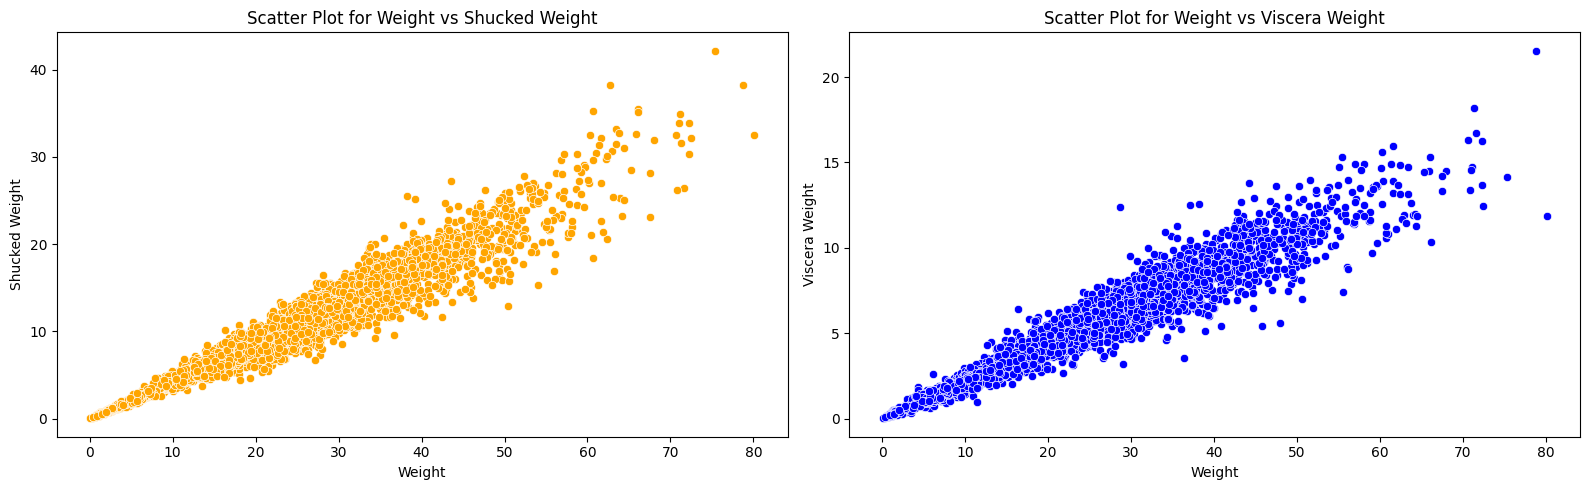

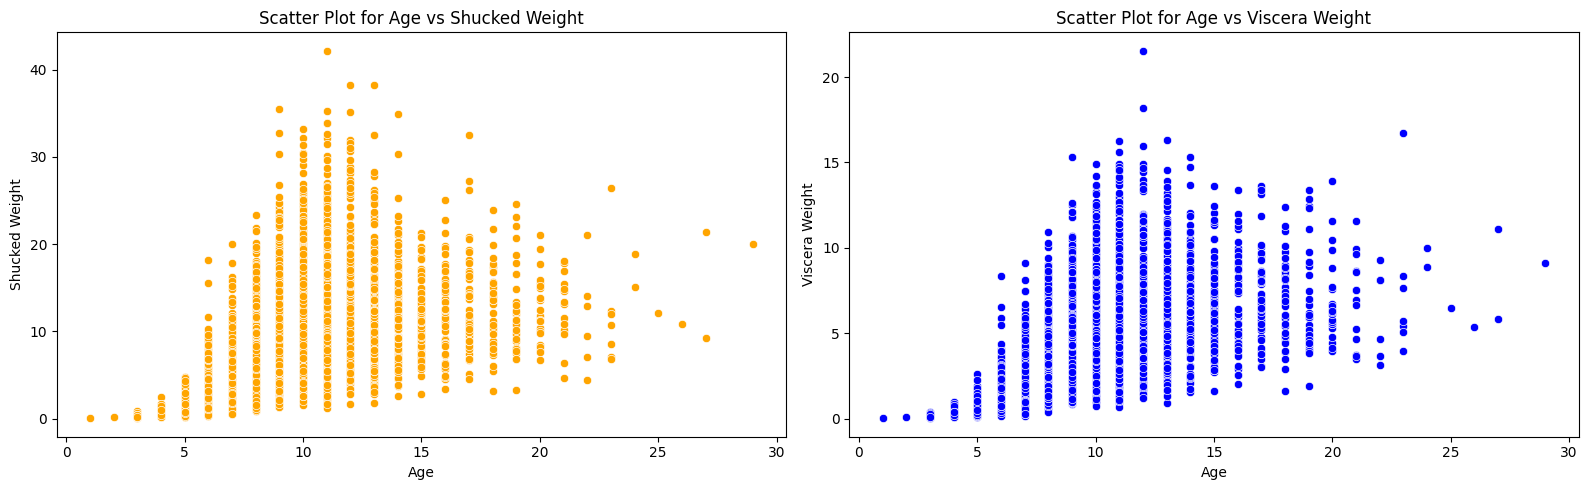

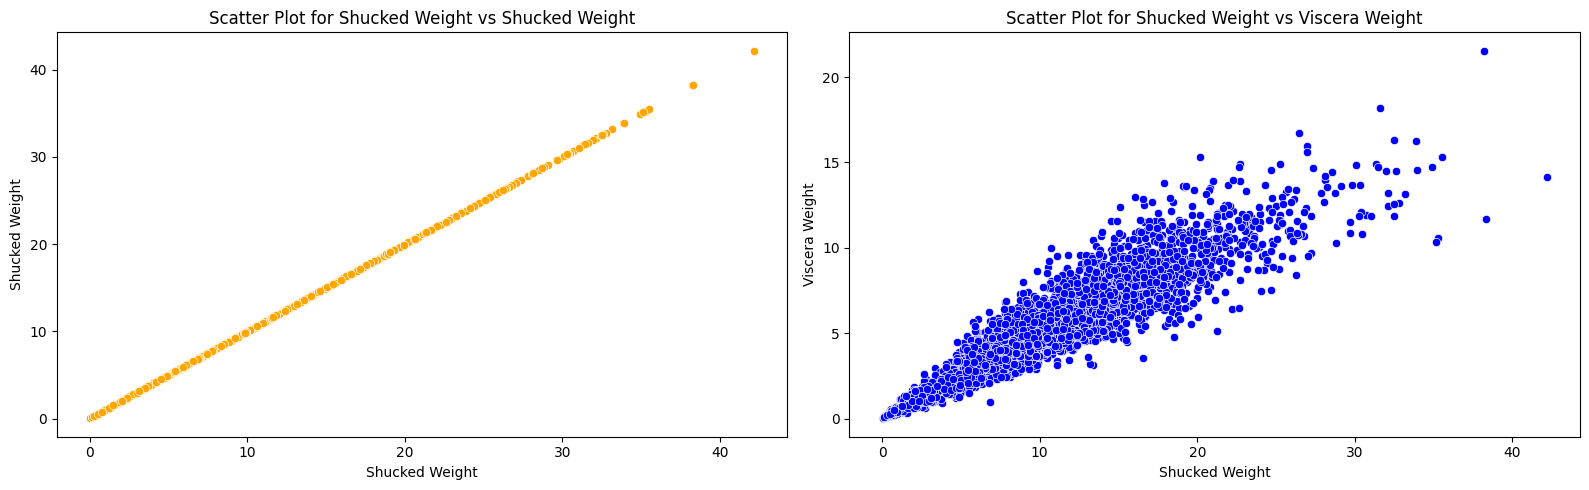

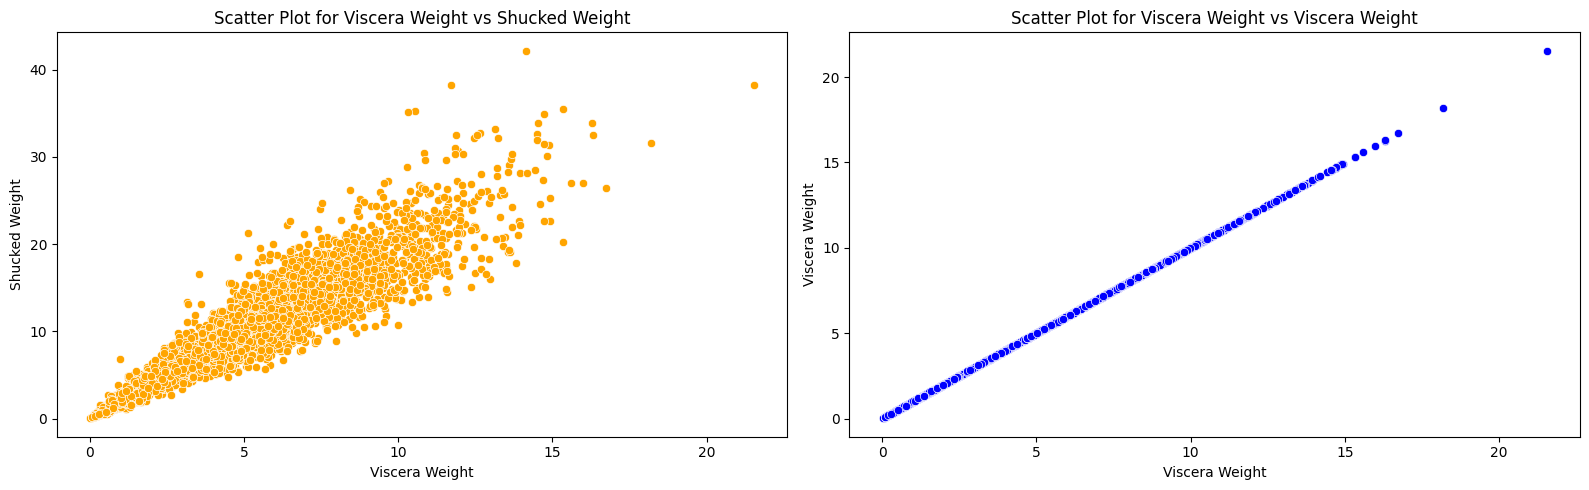

In [91]:
show()

height 가 잘못측정된 이상치들이 그림상 있는것으로 파악이 되어, 추가 이상치 제거 작업 진행

In [92]:
# 'Height'이 0.1 미만이고 'Shucked Weight'이 10 이상인 행을 찾아내어 인덱스를 저장
outlier_index = df[(df['Height'] < 0.1) & (df['Shucked Weight'] >= 10)].index

# 해당 인덱스의 행을 제거
df = df.drop(outlier_index, axis=0)
df = df.reset_index(drop=True)

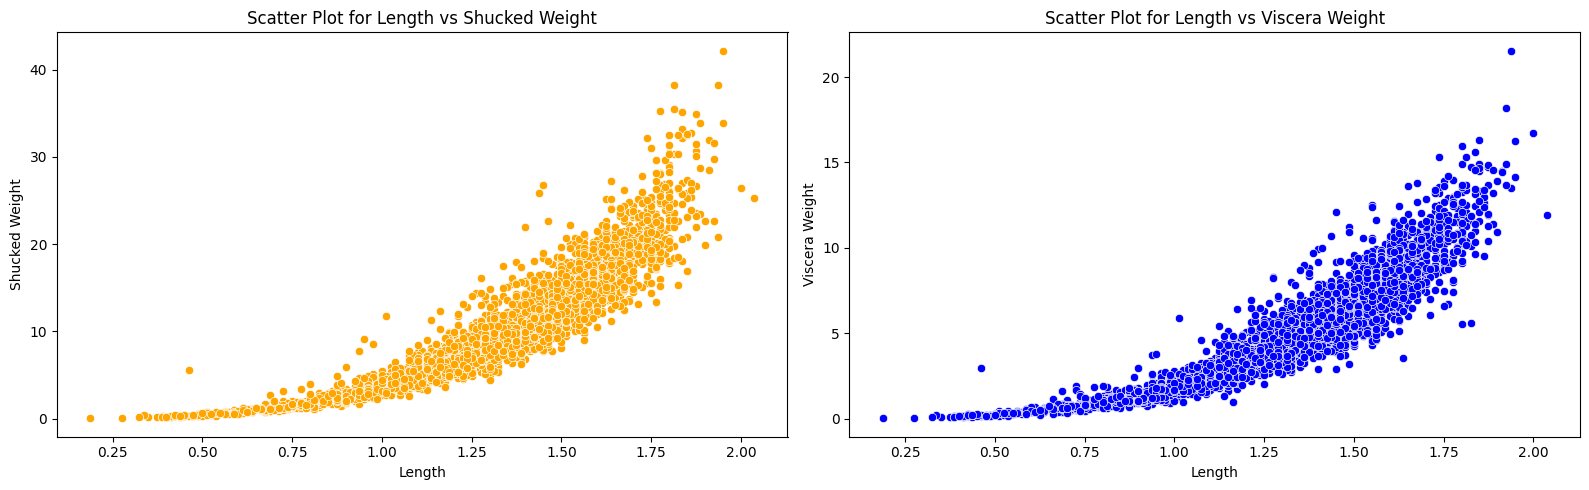

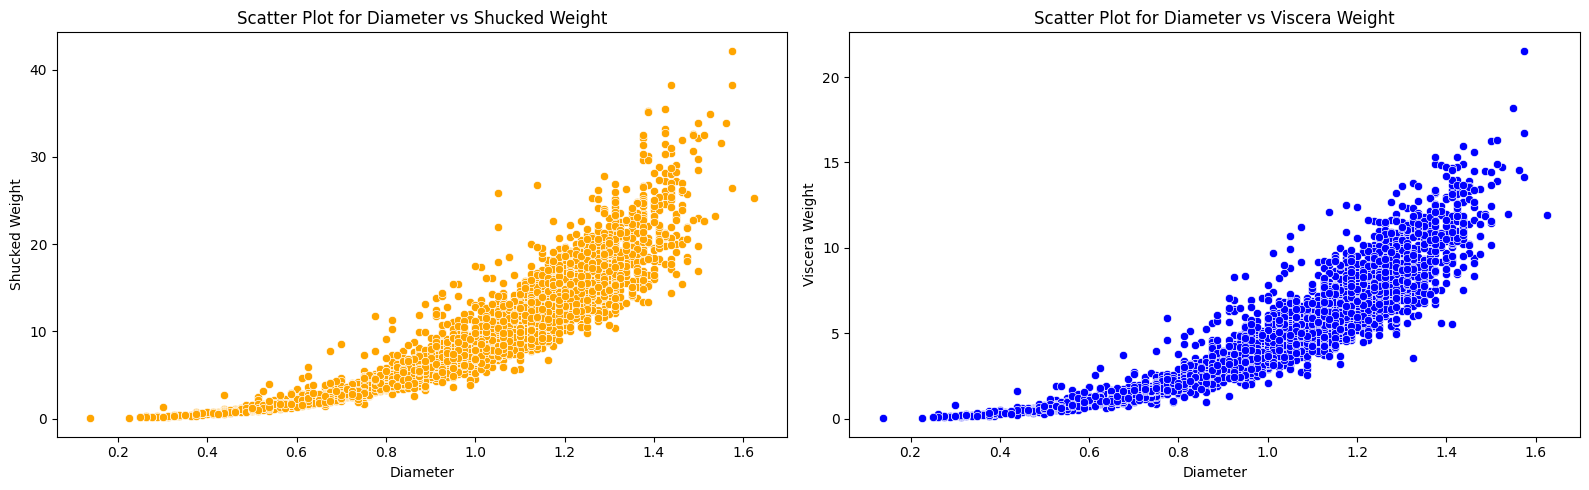

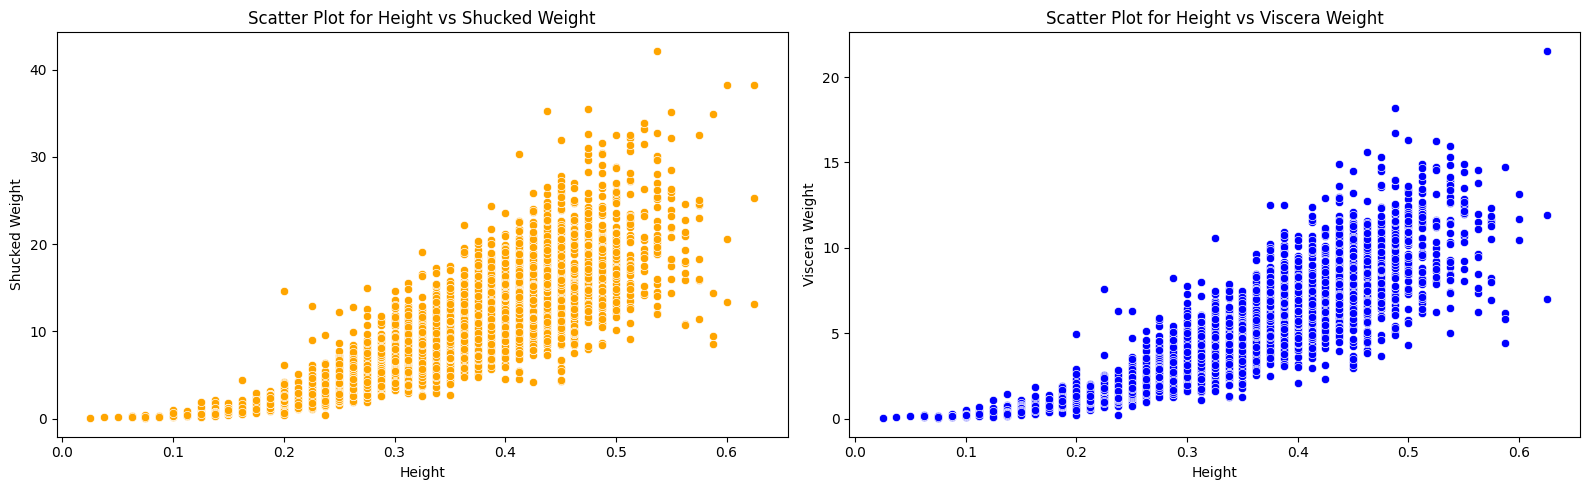

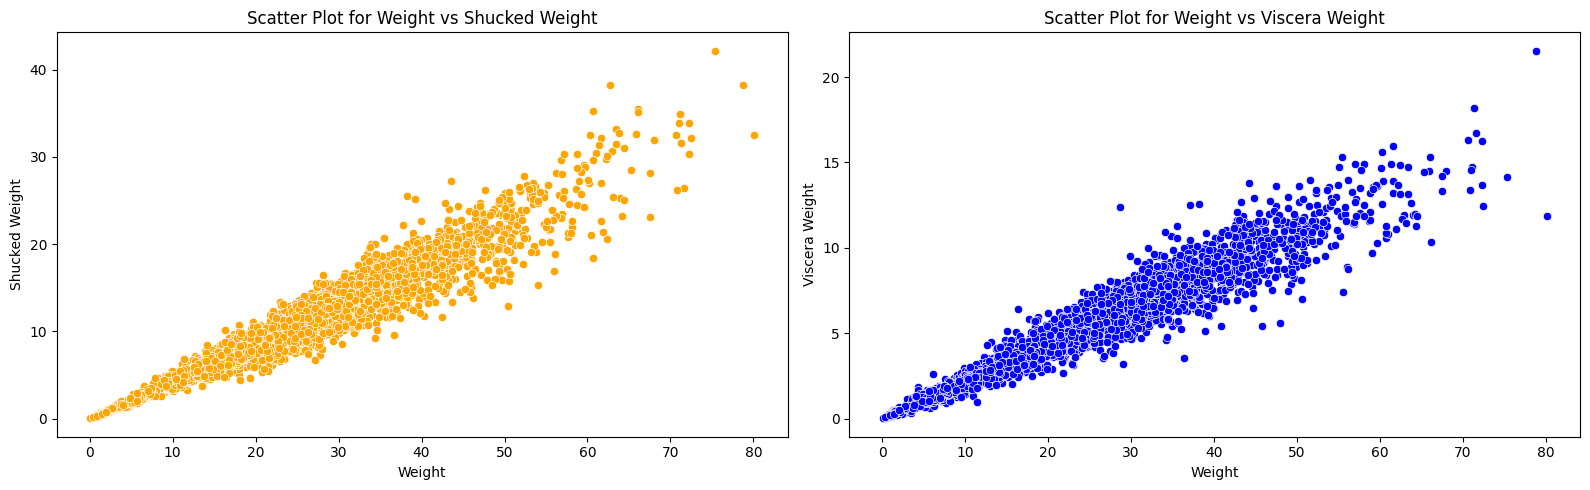

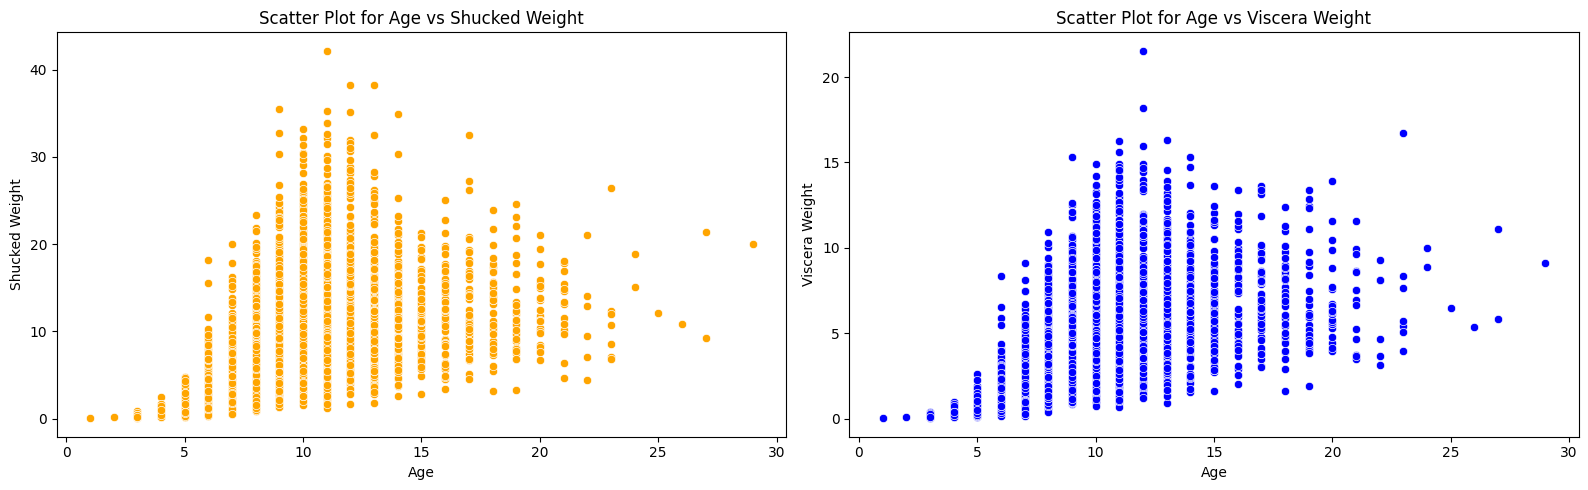

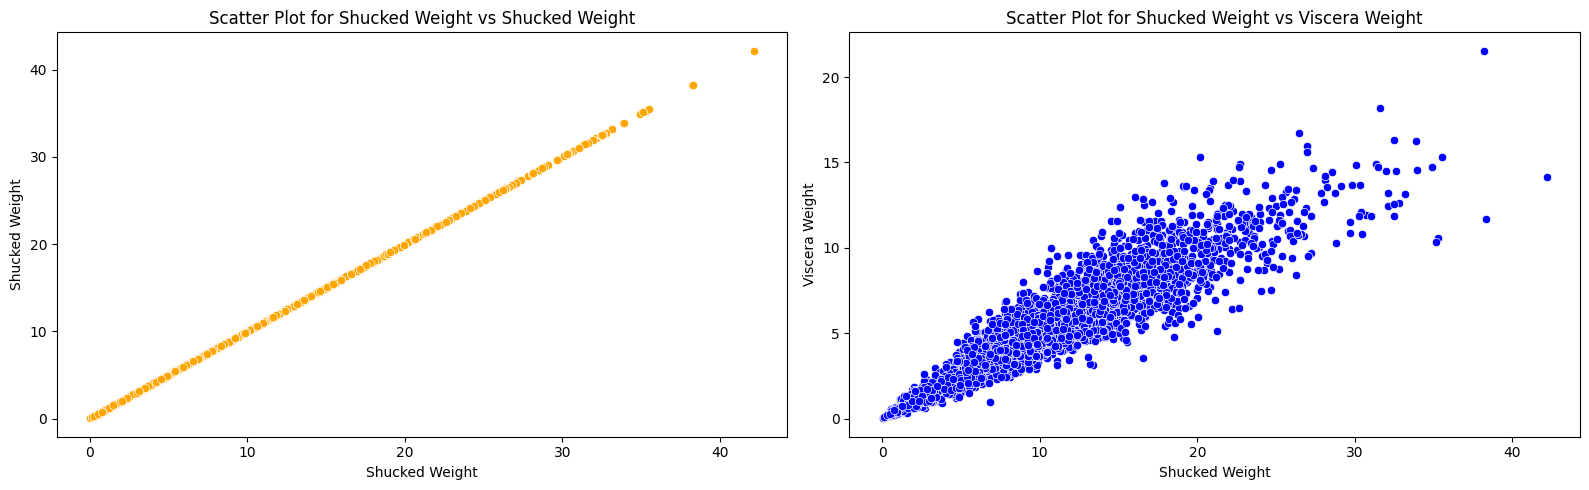

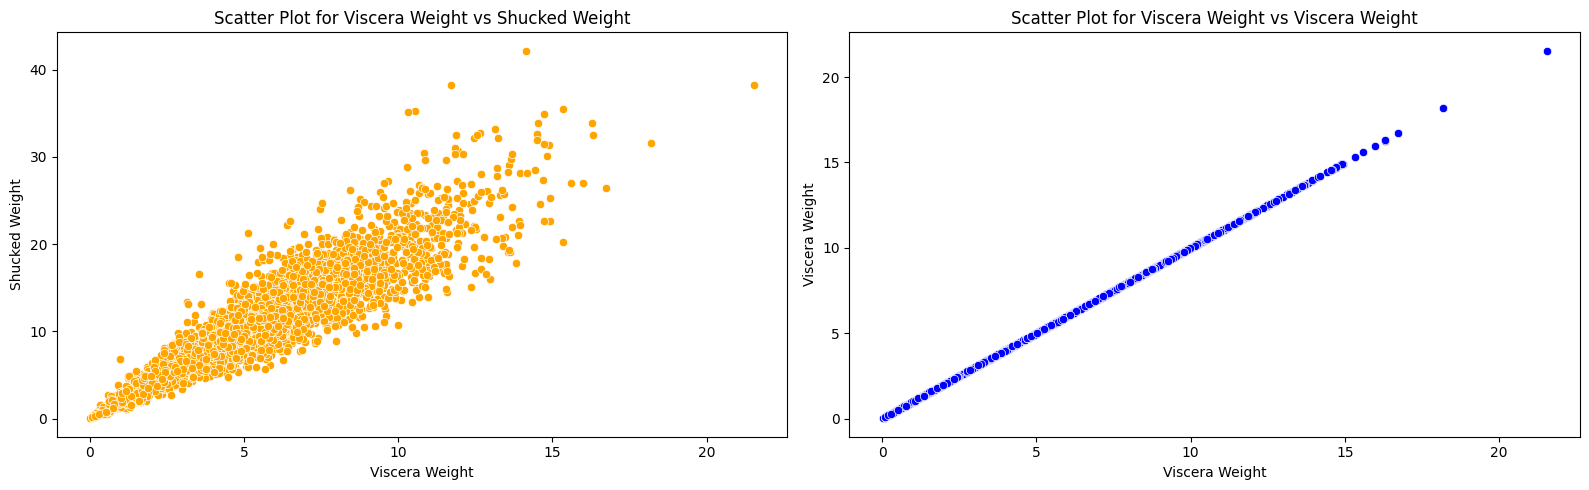

In [93]:
show()

length 에 대해서도 눈의 띄는 이상치를 제거하자

In [94]:
# 'Height'이 0.1 미만이고 'Shucked Weight'이 10 이상인 행을 찾아내어 인덱스를 저장
outlier_index = df[(df['Length'] < 0.5) & (df['Shucked Weight'] >= 5)].index

print(outlier_index)
# 해당 인덱스의 행을 제거
df = df.drop(outlier_index, axis=0)
df = df.reset_index(drop=True)

Int64Index([1003], dtype='int64')


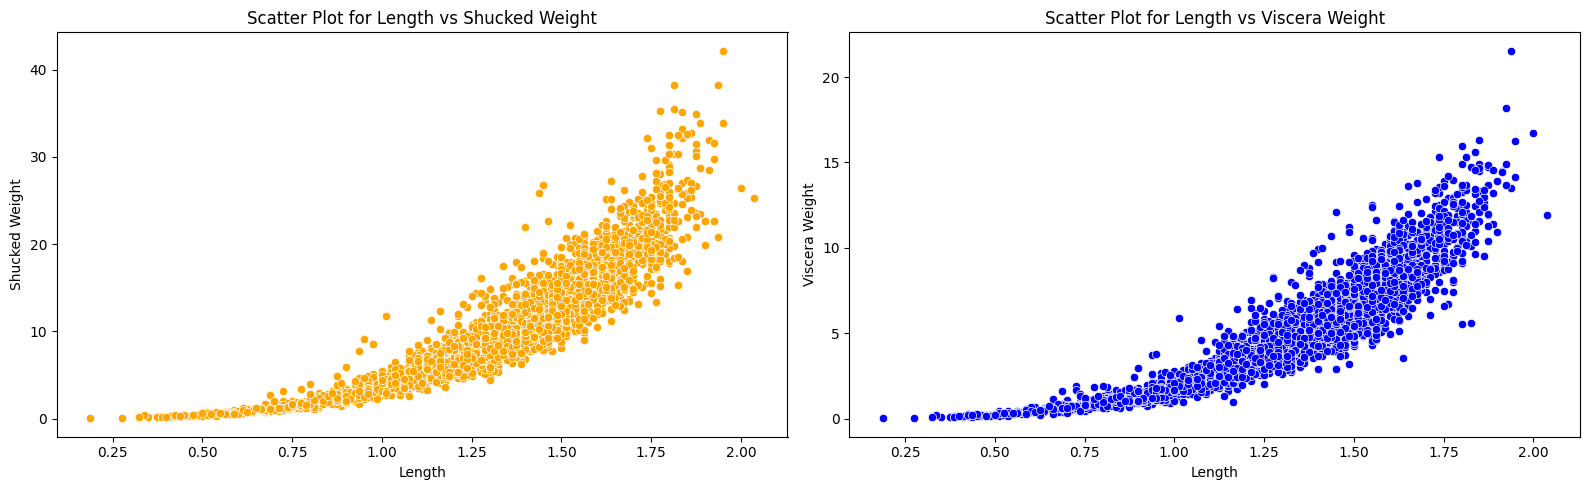

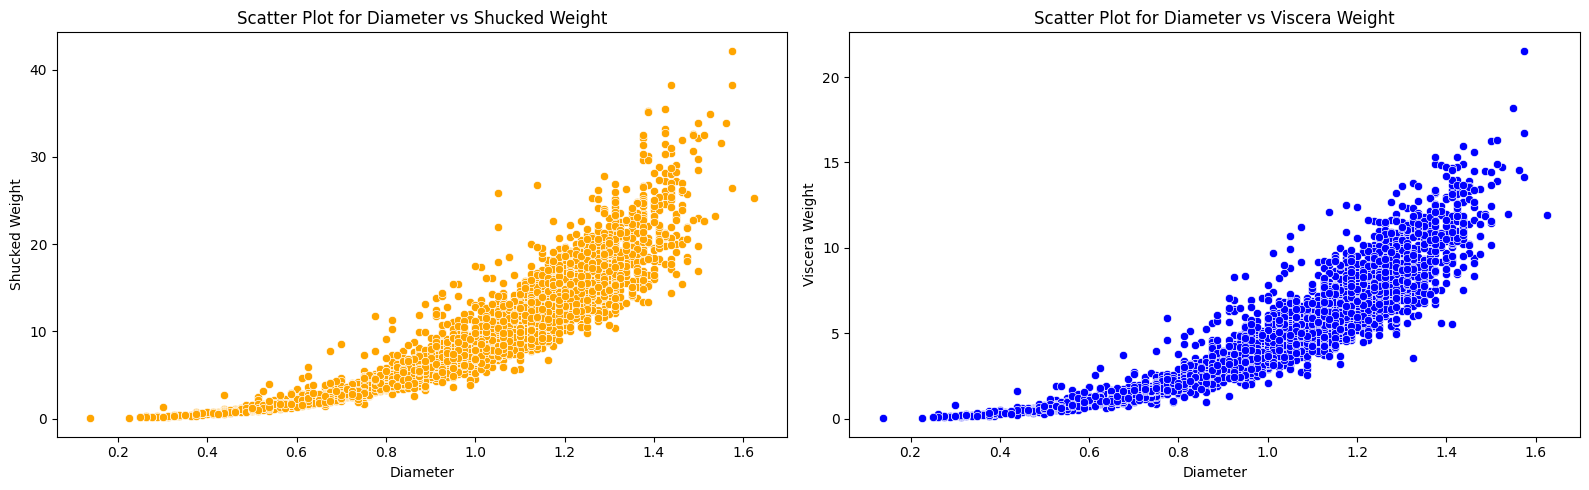

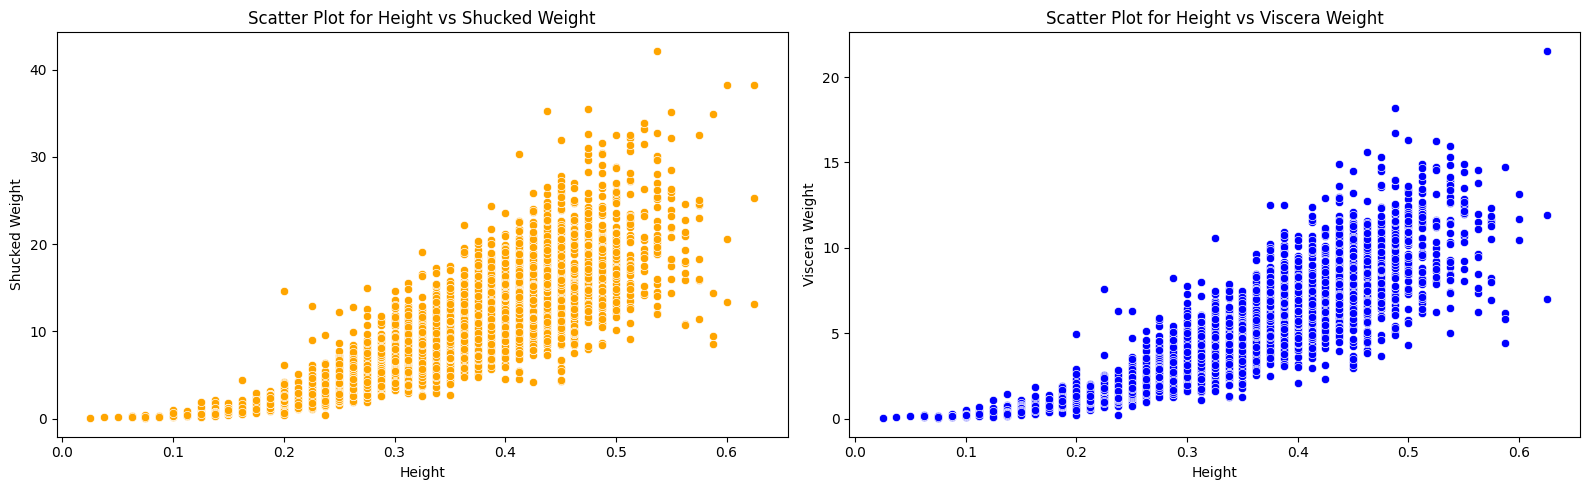

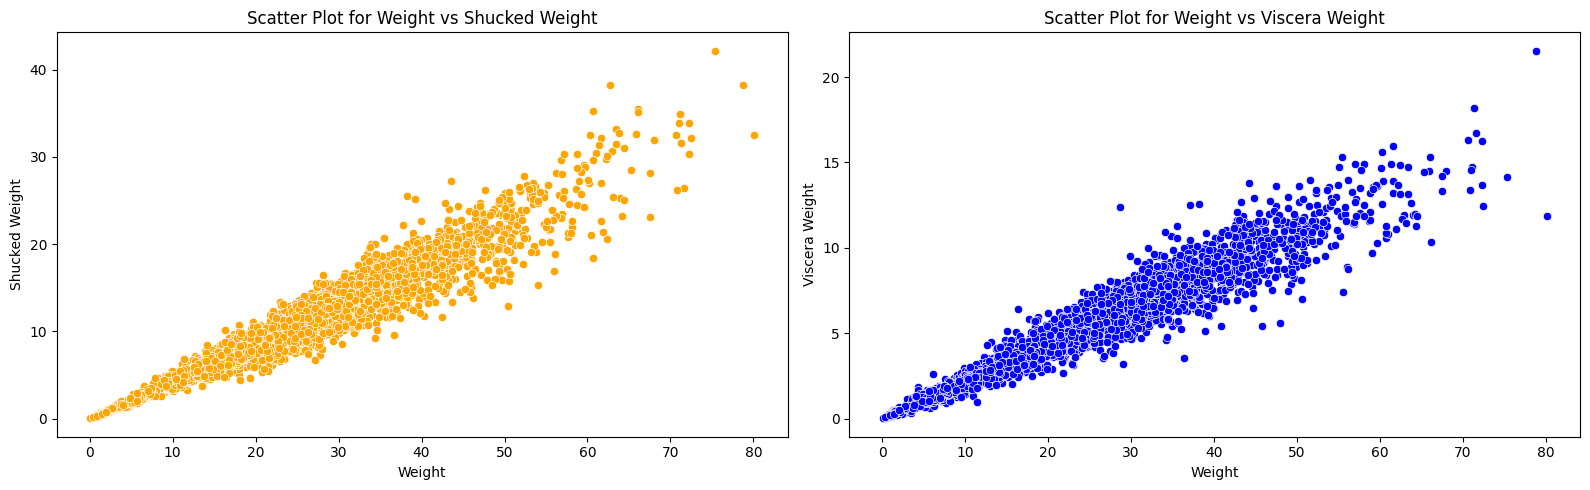

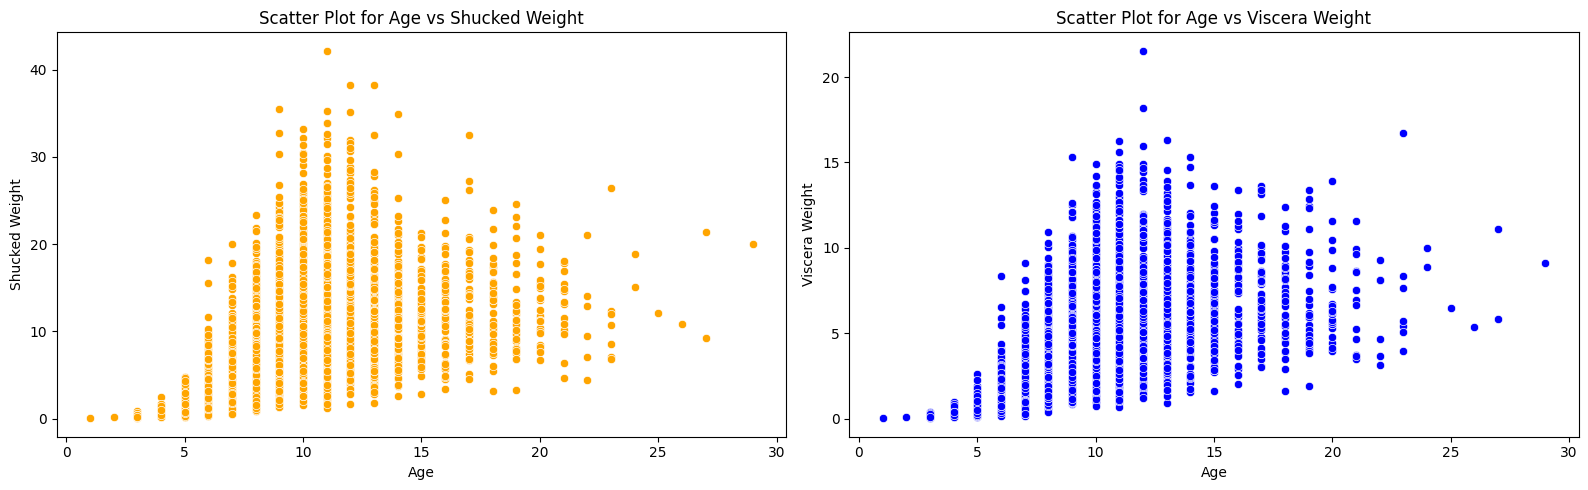

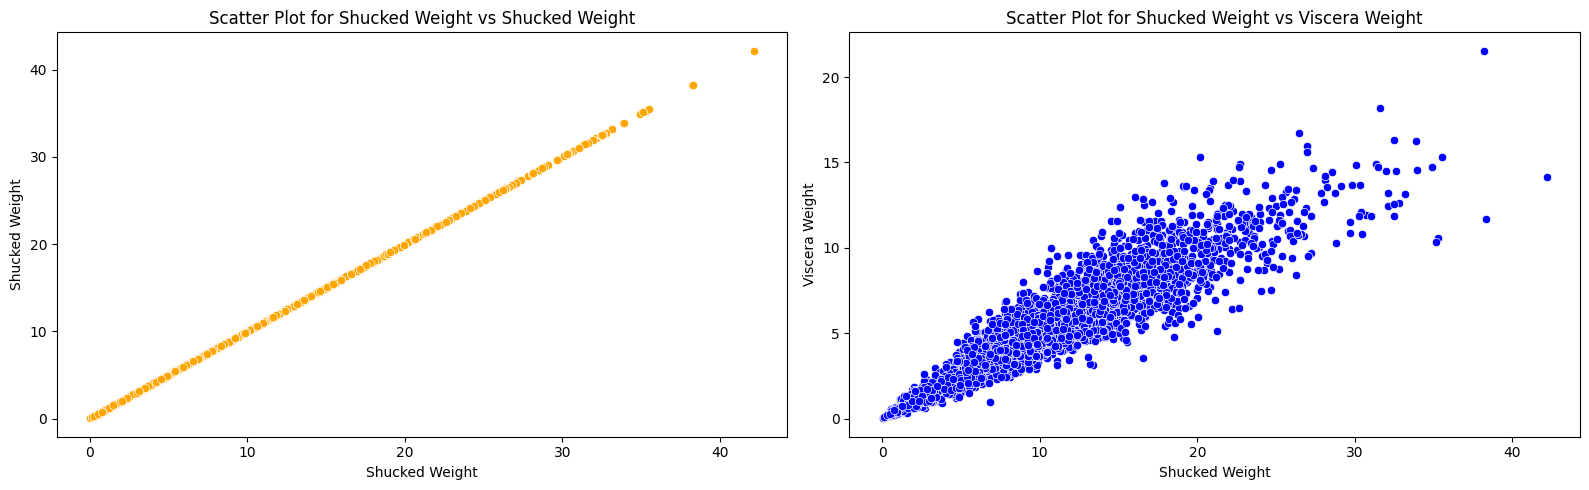

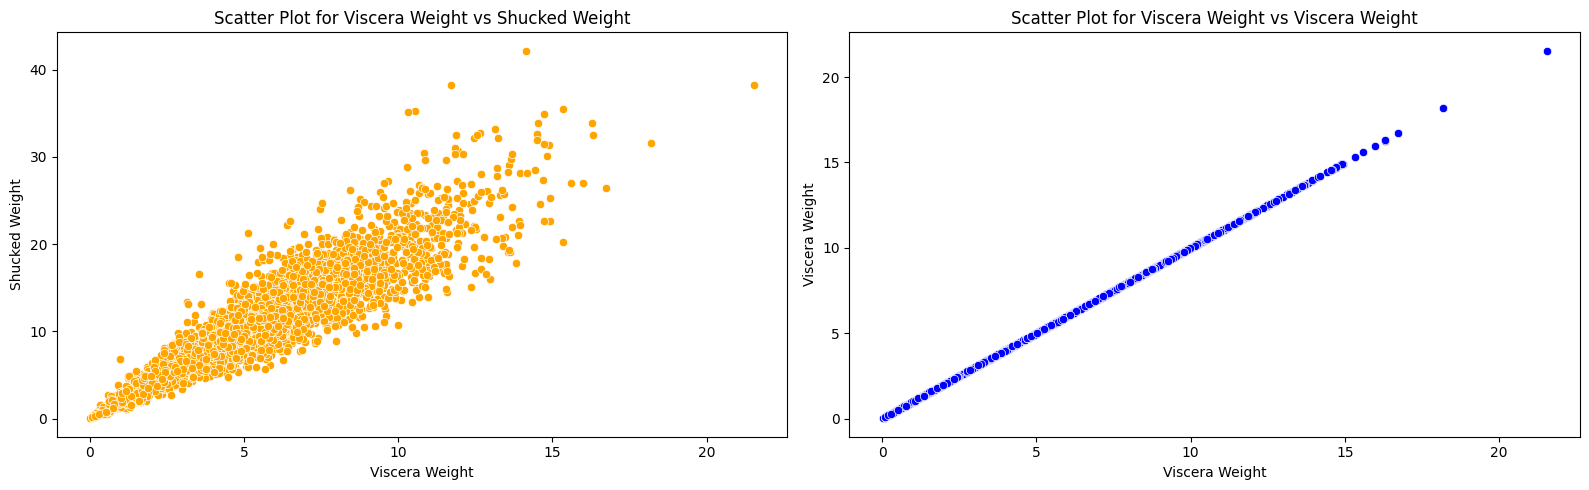

In [95]:
show()

In [96]:
df.describe()

Length     Diameter       Height       Weight          Age  \
count  3878.000000  3878.000000  3878.000000  3878.000000  3878.000000   
mean      1.312706     1.021899     0.349143    23.613035     9.966735   
std       0.299219     0.247483     0.095371    13.863589     3.220017   
min       0.187500     0.137500     0.025000     0.056699     1.000000   
25%       1.125000     0.875000     0.287500    12.718294     8.000000   
50%       1.362500     1.062500     0.362500    22.828435    10.000000   
75%       1.537500     1.200000     0.412500    32.867702    11.000000   
max       2.037500     1.625000     0.625000    80.101512    29.000000   

       Shucked Weight  Viscera Weight  
count     3878.000000     3878.000000  
mean        10.214523        5.145262  
std          6.268236        3.099141  
min          0.028349        0.014175  
25%          5.343881        2.679028  
50%          9.567956        4.861939  
75%         14.284604        7.214948  
max         42.184056       21.545620

최종 데이터셋에 대해 CORRELATION MATRIX 분석

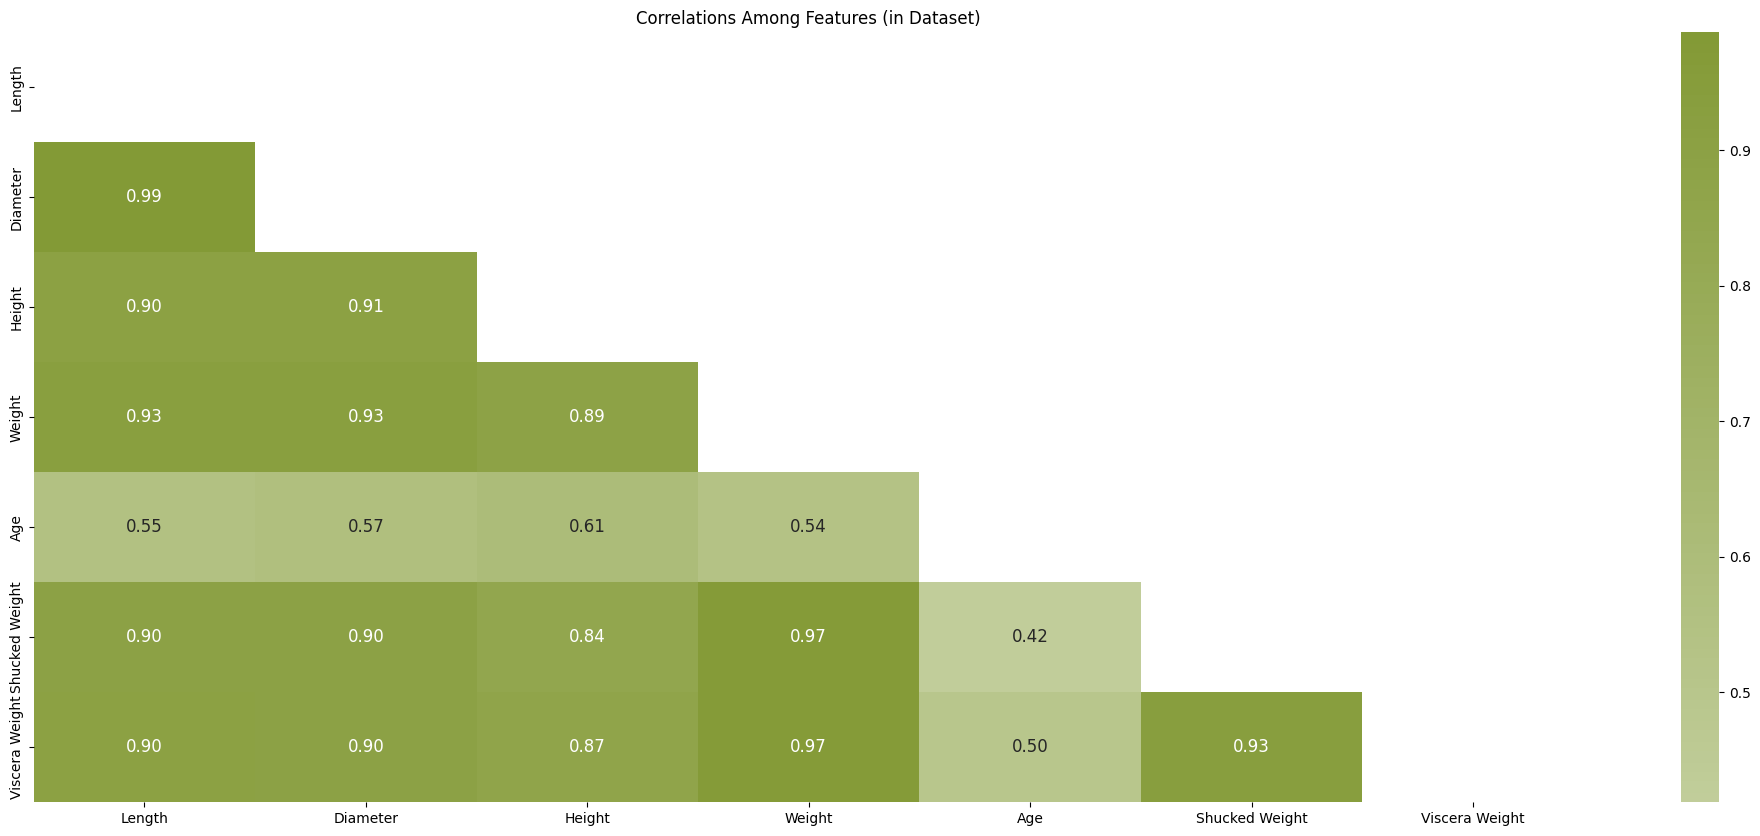

In [97]:
corr_mat_df = df.drop(columns=['Sex'], axis=1).corr()

df_mask = np.triu(np.ones_like(corr_mat_df, dtype=bool))

cmap = sns.diverging_palette(100, 7, s=85, l=60, n=20, center='light', as_cmap=True)

# Reverse the color map
cmap = cmap.reversed()

plt.figure(figsize=(25, 10))
sns.heatmap(corr_mat_df, annot=True, cmap=cmap, fmt='.2f', center=0,
            annot_kws={'size': 12}, mask=df_mask)
plt.title('Correlations Among Features (in Dataset)')

plt.show()

In [98]:
# 사실상 length 와 diameter은 분포도 거의 같기 때문에 오차의 분산을 줄이기 위해 제거하는 방법도 고안해봄

Sex에 따라 shucked weight와 viscera weight 가 다른 분포를 보이는지 확인할 필요가 보임.

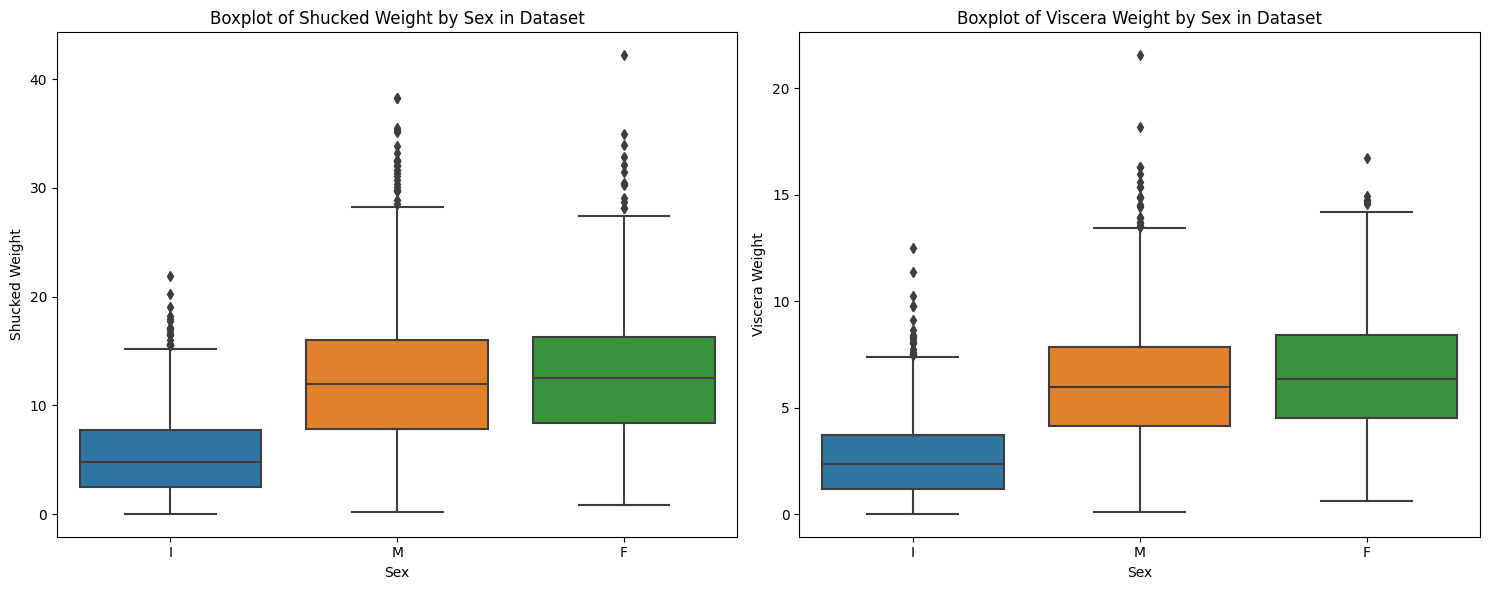

In [99]:
df['Sex'] = pd.Categorical(df['Sex'], categories=['I', 'M', 'F'], ordered=True)

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Shucked Weight에 대한 boxplot
sns.boxplot(ax=axes[0], data=df, x='Sex', y='Shucked Weight').set_title('Boxplot of Shucked Weight by Sex in Dataset')

# Viscera Weight에 대한 boxplot
sns.boxplot(ax=axes[1], data=df, x='Sex', y='Viscera Weight').set_title('Boxplot of Viscera Weight by Sex in Dataset')

plt.tight_layout()
plt.show()

boxplot 결과를 보니, male 과 female에 따라 target 값이 크게 차이나지 않는 것을 확인 할 수 있음 그리고 육안상 median과 range가 거의 사실상 똑같은 것을 알 수 있었음. Indescriminant는 예상한대로 아직 어려서 성별 구분이 안된 개체들이 많은 것으로 판단이 되었고, 나이가 많은데 아직 구분이 안된 개체들이 outlier로 찍힌 것으로 보임

### Data preprocessing for trainig

In [100]:
df = pd.get_dummies(df, columns=['Sex'])

In [101]:
df

Length  Diameter  Height     Weight   Age  Shucked Weight  \
0     1.4375    1.1750  0.4125  24.635715   9.0       12.332033   
1     0.8875    0.6500  0.2125   5.400580   6.0        2.296310   
2     1.0375    0.7750  0.2500   7.952035   6.0        3.231843   
3     1.1750    0.8875  0.2500  13.480187  10.0        4.748541   
4     0.8875    0.6625  0.2125   6.903103   6.0        3.458639   
...      ...       ...     ...        ...   ...             ...   
3873  1.4625    1.1375  0.3250  24.819987   8.0       11.651644   
3874  1.5500    1.2125  0.4375  34.458817  10.0       15.450477   
3875  0.6250    0.4625  0.1625   2.012815   5.0        0.765436   
3876  1.0625    0.7750  0.2625  10.347568   6.0        4.507570   
3877  0.7875    0.6125  0.2125   4.068153   8.0        1.502523   

      Viscera Weight  Sex_I  Sex_M  Sex_F  
0           5.584852      0      0      1  
1           1.374951      0      1      0  
2           1.601747      1      0      0  
3           2.282135      0      0      1  
4           1.488349      1      0      0  
...              ...    ...    ...    ...  
3873        5.854172      0      0      1  
3874        7.172423      0      0      1  
3875        0.524466      1      0      0  
3876        2.338834      1      0      0  
3877        1.346601      1      0      0  

[3878 rows x 10 columns]

In [102]:
# 열 순서 재배열
cols = df.columns.tolist()  # 열 이름의 리스트를 생성
cols = cols[-3:] + cols[:-3]  # 맨 마지막 3열을 맨 앞으로 이동
df = df[cols]

In [103]:
# 최종 데이터셋
df

Sex_I  Sex_M  Sex_F  Length  Diameter  Height     Weight   Age  \
0         0      0      1  1.4375    1.1750  0.4125  24.635715   9.0   
1         0      1      0  0.8875    0.6500  0.2125   5.400580   6.0   
2         1      0      0  1.0375    0.7750  0.2500   7.952035   6.0   
3         0      0      1  1.1750    0.8875  0.2500  13.480187  10.0   
4         1      0      0  0.8875    0.6625  0.2125   6.903103   6.0   
...     ...    ...    ...     ...       ...     ...        ...   ...   
3873      0      0      1  1.4625    1.1375  0.3250  24.819987   8.0   
3874      0      0      1  1.5500    1.2125  0.4375  34.458817  10.0   
3875      1      0      0  0.6250    0.4625  0.1625   2.012815   5.0   
3876      1      0      0  1.0625    0.7750  0.2625  10.347568   6.0   
3877      1      0      0  0.7875    0.6125  0.2125   4.068153   8.0   

      Shucked Weight  Viscera Weight  
0          12.332033        5.584852  
1           2.296310        1.374951  
2           3.231843        1.601747  
3           4.748541        2.282135  
4           3.458639        1.488349  
...              ...             ...  
3873       11.651644        5.854172  
3874       15.450477        7.172423  
3875        0.765436        0.524466  
3876        4.507570        2.338834  
3877        1.502523        1.346601  

[3878 rows x 10 columns]

In [104]:
# df.to_csv('crabdataset.csv', index=False, encoding='utf-8-sig')

In [105]:
df.describe()

Sex_I        Sex_M        Sex_F       Length     Diameter  \
count  3878.000000  3878.000000  3878.000000  3878.000000  3878.000000   
mean      0.314853     0.369778     0.315369     1.312706     1.021899   
std       0.464517     0.482807     0.464722     0.299219     0.247483   
min       0.000000     0.000000     0.000000     0.187500     0.137500   
25%       0.000000     0.000000     0.000000     1.125000     0.875000   
50%       0.000000     0.000000     0.000000     1.362500     1.062500   
75%       1.000000     1.000000     1.000000     1.537500     1.200000   
max       1.000000     1.000000     1.000000     2.037500     1.625000   

            Height       Weight          Age  Shucked Weight  Viscera Weight  
count  3878.000000  3878.000000  3878.000000     3878.000000     3878.000000  
mean      0.349143    23.613035     9.966735       10.214523        5.145262  
std       0.095371    13.863589     3.220017        6.268236        3.099141  
min       0.025000     0.056699     1.000000        0.028349        0.014175  
25%       0.287500    12.718294     8.000000        5.343881        2.679028  
50%       0.362500    22.828435    10.000000        9.567956        4.861939  
75%       0.412500    32.867702    11.000000       14.284604        7.214948  
max       0.625000    80.101512    29.000000       42.184056       21.545620

## Model

# Linear Regression

In [106]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import numpy as np

In [107]:
from sklearn.model_selection import train_test_split
import pandas as pd


# Feature와 Target 분리
X = df.iloc[:,:-2]
y = df.iloc[:,-2:]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

In [108]:
scaler_st = StandardScaler() # X의 scaler 지정
scaler_st.fit(X_train)
X_train_st = scaler_st.transform(X_train) # standard scaler로 X_train scale 한 것을 X_train_st 에 배정
X_test_st = scaler_st.transform(X_test) # standard scaler로 X_test scale 한 것을 X_test_st 에 배정

In [109]:
reg = LinearRegression()
reg.fit(X_train_st, y_train)

# 훈련 데이터에 대한 예측
y_train_hat = reg.predict(X_train_st)




# 테스트 데이터에 대한 예측
y_test_hat = reg.predict(X_test_st)


mae_train = mean_absolute_error(y_train, y_train_hat)
mae_test = mean_absolute_error(y_test, y_test_hat)
mse_train = mean_squared_error(y_train, y_train_hat)
mse_test = mean_squared_error(y_test, y_test_hat)
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)
train_r2 = r2_score(y_train, y_train_hat)
test_r2 = r2_score(y_test, y_test_hat)

print("MAE for model is train : ",mae_train, "Test:", mae_test)
print("MSE for model is train : ",mse_train, "Test:",mse_test)
print("RMSE for model is train : ",rmse_train, "Test:",rmse_test)
print("R square for model is train : ",train_r2, "Test:",test_r2)

MAE for model is train :  0.7139068998935998 Test: 0.7053325317096378
MSE for model is train :  1.1685405249197751 Test: 1.0350385080503435
RMSE for model is train :  1.0809905295236286 Test: 1.0173684229669915
R square for model is train :  0.9438349907918941 Test: 0.9553905040891137


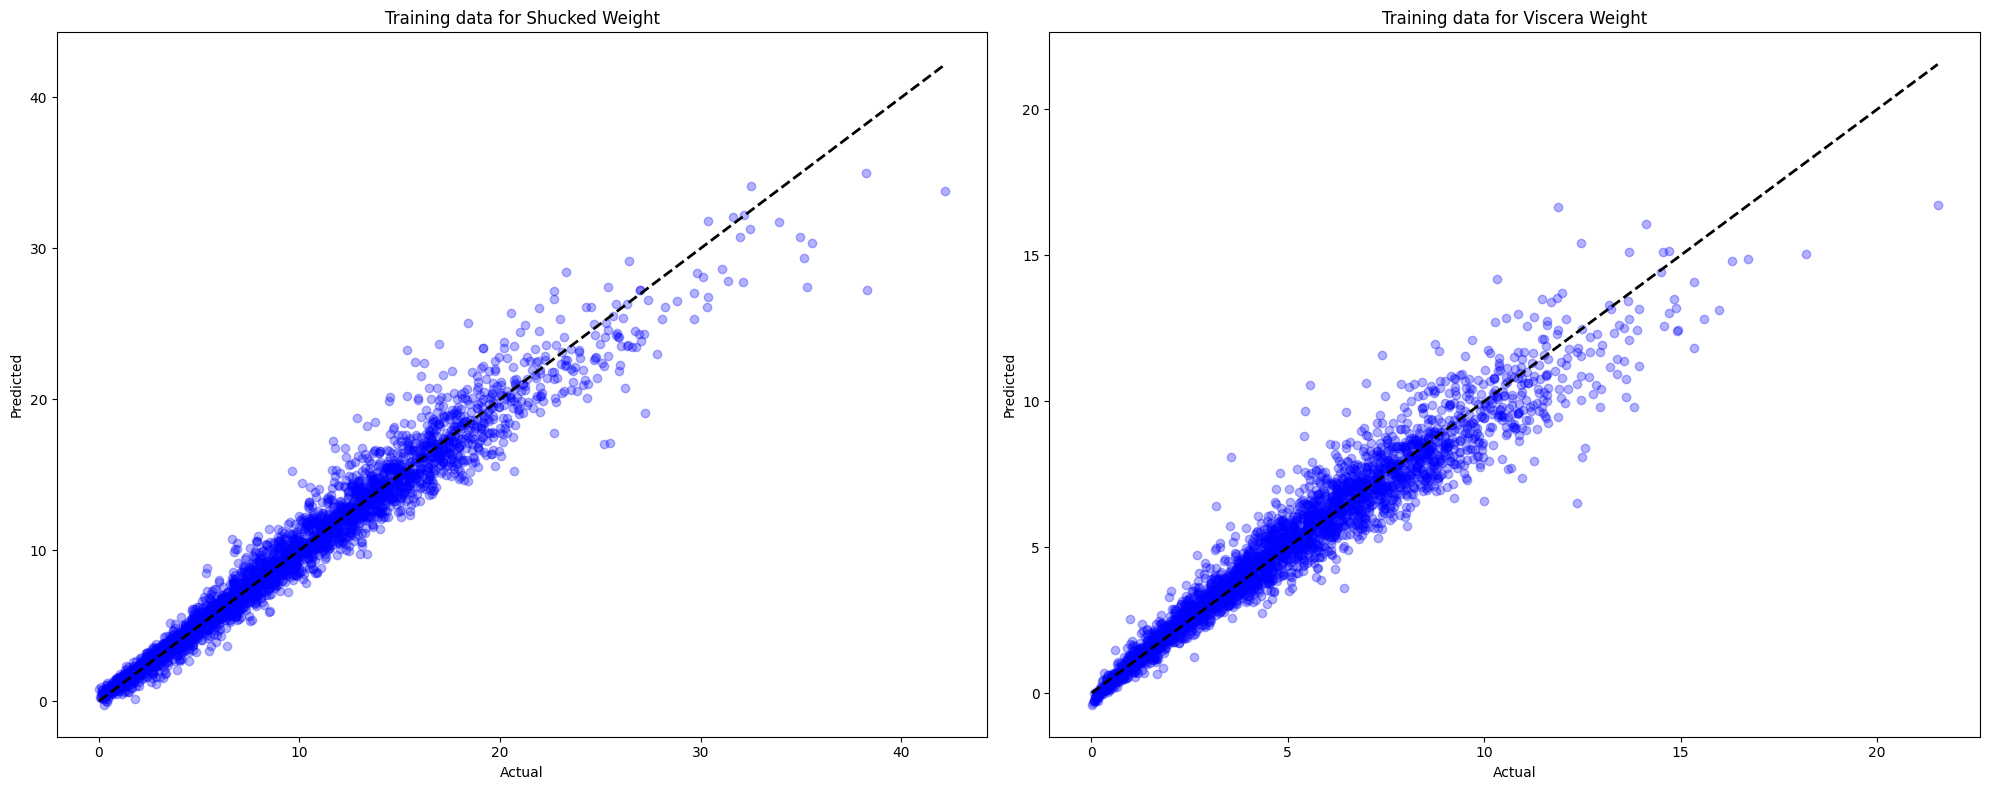

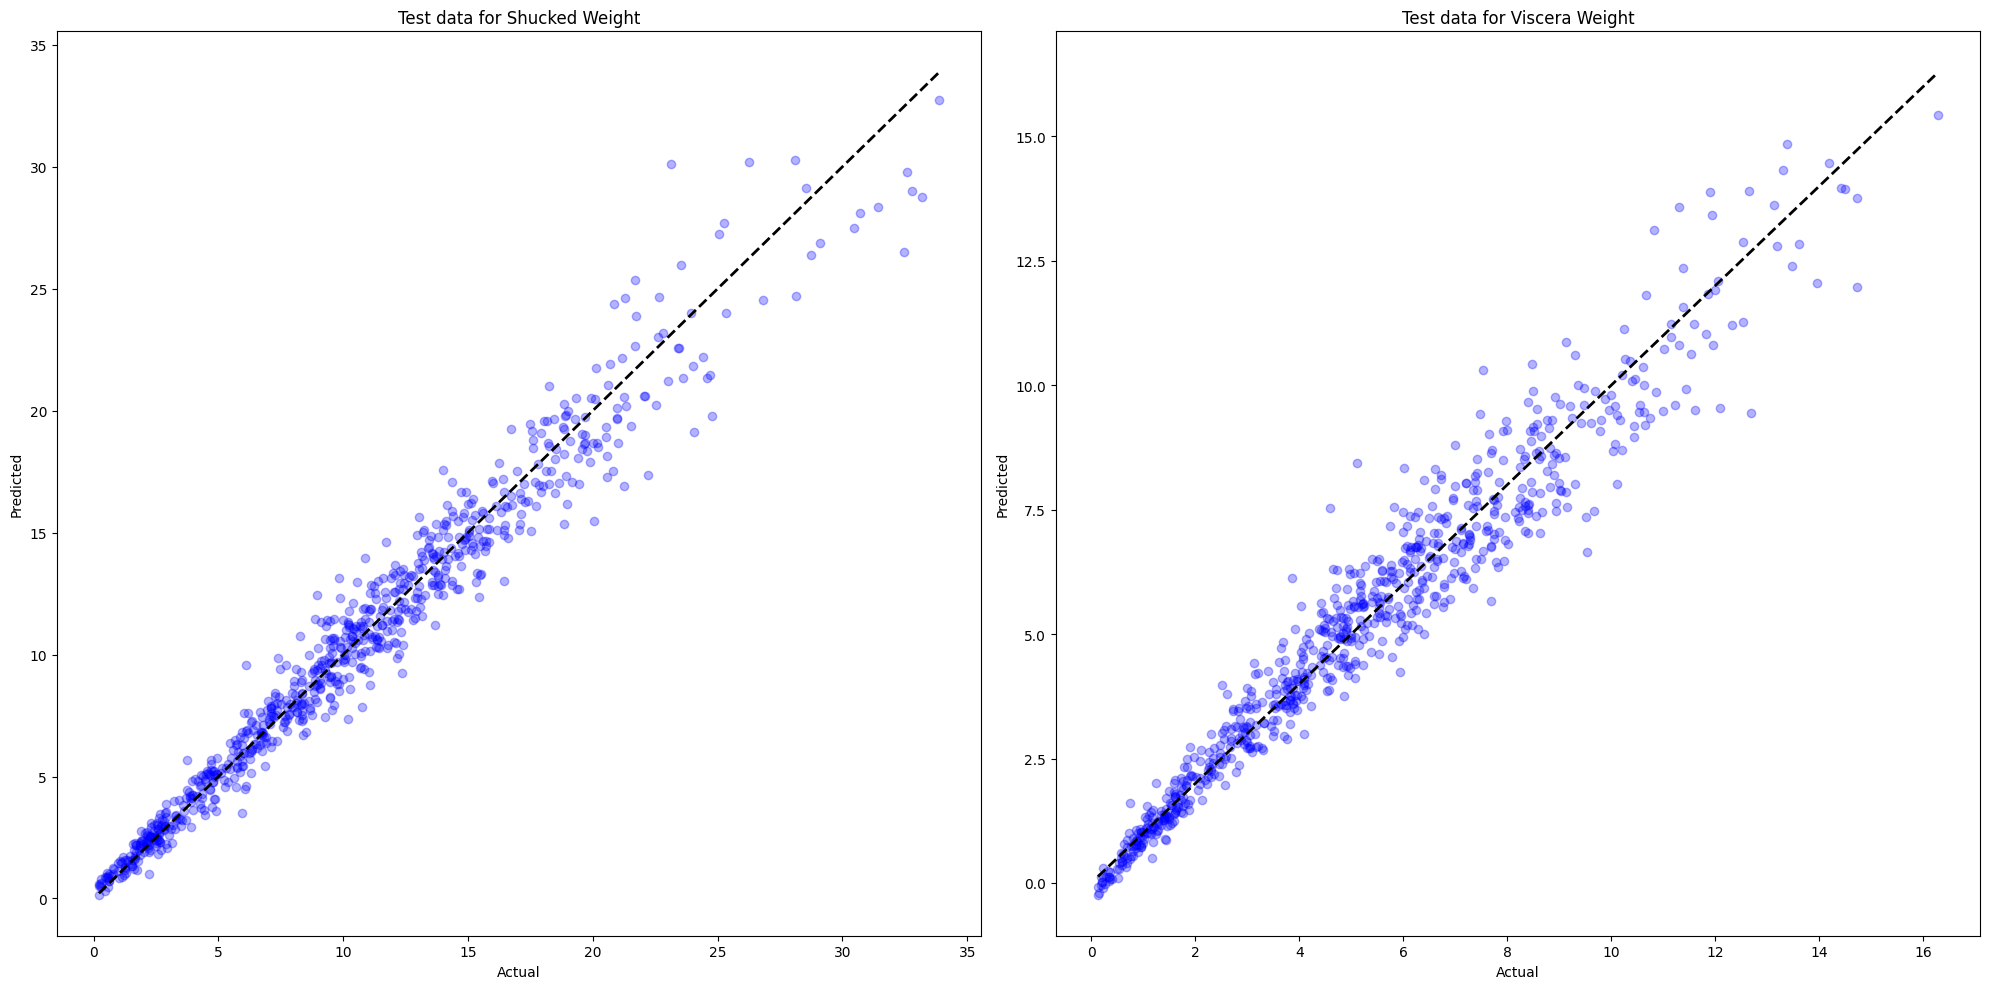

In [110]:
# 데이터를 numpy 배열로 변환
y_train_np = y_train.values
y_test_np = y_test.values

# 훈련 데이터에 대한 그래프
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# Shucked Weight
axes[0].scatter(y_train_np[:, 0], y_train_hat[:, 0], alpha=0.3, color='blue')
axes[0].plot([y_train_np[:, 0].min(), y_train_np[:, 0].max()], [y_train_np[:, 0].min(), y_train_np[:, 0].max()], 'k--', lw=2)
axes[0].set_xlabel('Actual')
axes[0].set_ylabel('Predicted')
axes[0].set_title('Training data for Shucked Weight')
axes[0].set_title('Training data for Shucked Weight')

# Viscera Weight
axes[1].scatter(y_train_np[:, 1], y_train_hat[:, 1], alpha=0.3, color='blue')
axes[1].plot([y_train_np[:, 1].min(), y_train_np[:, 1].max()], [y_train_np[:, 1].min(), y_train_np[:, 1].max()], 'k--', lw=2)
axes[1].set_xlabel('Actual')
axes[1].set_ylabel('Predicted')
axes[0].set_title('Training data for Shucked Weight')
axes[1].set_title('Training data for Viscera Weight')

plt.tight_layout()
plt.show()

#테스트 데이터에 대한 그래프
fig, axes = plt.subplots(1, 2, figsize=(20, 10))

#Shucked Weight
axes[0].scatter(y_test_np[:, 0], y_test_hat[:, 0], alpha=0.3, color='blue')
axes[0].plot([y_test_np[:, 0].min(), y_test_np[:, 0].max()], [y_test_np[:, 0].min(), y_test_np[:, 0].max()], 'k--', lw=2)
axes[0].set_xlabel('Actual')
axes[0].set_ylabel('Predicted')
axes[0].set_title('Test data for Shucked Weight')

# Viscera Weight
axes[1].scatter(y_test['Viscera Weight'].values, y_test_hat[:, 1], alpha=0.3, color='blue')
axes[1].plot([y_test['Viscera Weight'].min(), y_test['Viscera Weight'].max()], [y_test['Viscera Weight'].min(), y_test['Viscera Weight'].max()], 'k--', lw=2)
axes[1].set_xlabel('Actual')
axes[1].set_ylabel('Predicted')
axes[1].set_title('Test data for Viscera Weight')

plt.tight_layout()
plt.show()



Shucked Weight 와 Viscera Weight 각각의 예측성능을 확인함

In [111]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from math import sqrt

# Shucked Weight에 대한 오차 계산
mae_train_shucked = mean_absolute_error(y_train['Shucked Weight'], y_train_hat[:, 0])
mse_train_shucked = mean_squared_error(y_train['Shucked Weight'], y_train_hat[:, 0])
rmse_train_shucked = sqrt(mse_train_shucked)
r2_train_shucked = r2_score(y_train['Shucked Weight'], y_train_hat[:, 0])

mae_test_shucked = mean_absolute_error(y_test['Shucked Weight'], y_test_hat[:, 0])
mse_test_shucked = mean_squared_error(y_test['Shucked Weight'], y_test_hat[:, 0])
rmse_test_shucked = sqrt(mse_test_shucked)
r2_test_shucked = r2_score(y_test['Shucked Weight'], y_test_hat[:, 0])

# Viscera Weight에 대한 오차 계산
mae_train_viscera = mean_absolute_error(y_train['Viscera Weight'], y_train_hat[:, 1])
mse_train_viscera = mean_squared_error(y_train['Viscera Weight'], y_train_hat[:, 1])
rmse_train_viscera = sqrt(mse_train_viscera)
r2_train_viscera = r2_score(y_train['Viscera Weight'], y_train_hat[:, 1])

mae_test_viscera = mean_absolute_error(y_test['Viscera Weight'], y_test_hat[:, 1])
mse_test_viscera = mean_squared_error(y_test['Viscera Weight'], y_test_hat[:, 1])
rmse_test_viscera = sqrt(mse_test_viscera)
r2_test_viscera = r2_score(y_test['Viscera Weight'], y_test_hat[:, 1])

# 결과 출력
print("Shucked Weight - Training data: MAE = {}, MSE = {}, RMSE = {}, R2 = {}".format(mae_train_shucked, mse_train_shucked, rmse_train_shucked, r2_train_shucked))
print("Shucked Weight - Test data: MAE = {}, MSE = {}, RMSE = {}, R2 = {}".format(mae_test_shucked, mse_test_shucked, rmse_test_shucked, r2_test_shucked))
print("Viscera Weight - Training data: MAE = {}, MSE = {}, RMSE = {}, R2 = {}".format(mae_train_viscera, mse_train_viscera, rmse_train_viscera, r2_train_viscera))
print("Viscera Weight - Test data: MAE = {}, MSE = {}, RMSE = {}, R2 = {}".format(mae_test_viscera, mse_test_viscera, rmse_test_viscera, r2_test_viscera))


Shucked Weight - Training data: MAE = 0.8778590467908711, MSE = 1.6895432723413837, RMSE = 1.299824323645847, R2 = 0.955962092879439
Shucked Weight - Test data: MAE = 0.8777880798240353, MSE = 1.529952142522364, RMSE = 1.236912342295267, R2 = 0.9643518597551013
Viscera Weight - Training data: MAE = 0.5499547529963268, MSE = 0.6475377774981677, RMSE = 0.804697320424374, R2 = 0.9317078887043493
Viscera Weight - Test data: MAE = 0.5328769835952397, MSE = 0.5401248735783254, RMSE = 0.734931883631623, R2 = 0.9464291484231262


결과 분석
: Viscera Weight에 대해선 만족스러운 성능을 보이지만, Shucked Weight는 그에 비해 너무 높은 오차를 보임. Shucked Weight 가 더욱 중요한 변수이므로 이를 해결하고자 tuning 을 해야겠다는 생각이 들었음.

# Linear Regression Model Residual Analysis

잔차분석 1. 정규성 검정 QQ plot사용

In [112]:
# 전체에 대한 잔차 계산
residuals_train = y_train.values - y_train_hat
residuals_test = y_test.values - y_test_hat

# 각각에 대한 잔차 계산
residuals_train_shucked = y_train['Shucked Weight'].values - y_train_hat[:, 0]
residuals_test_shucked = y_test['Shucked Weight'].values - y_test_hat[:, 0]

residuals_train_viscera = y_train['Viscera Weight'].values - y_train_hat[:, 1]
residuals_test_viscera = y_test['Viscera Weight'].values - y_test_hat[:, 1]



In [113]:
residuals_train

array([[-0.30372549, -0.32361433],
       [ 1.18242313,  1.47553011],
       [ 0.21043922, -0.28365566],
       ...,
       [ 0.55362404, -0.10019148],
       [-0.41458521,  0.41322846],
       [-0.01381597,  0.22493273]])

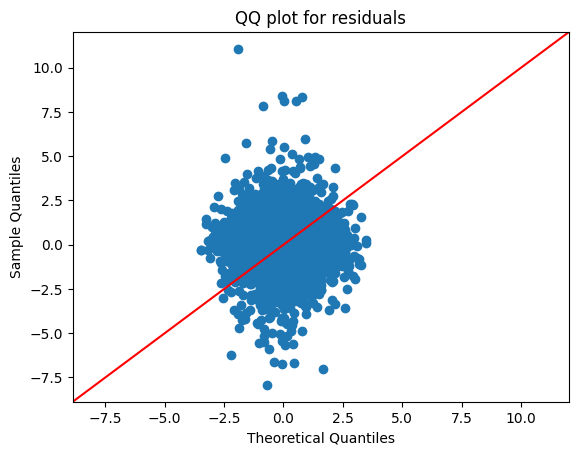

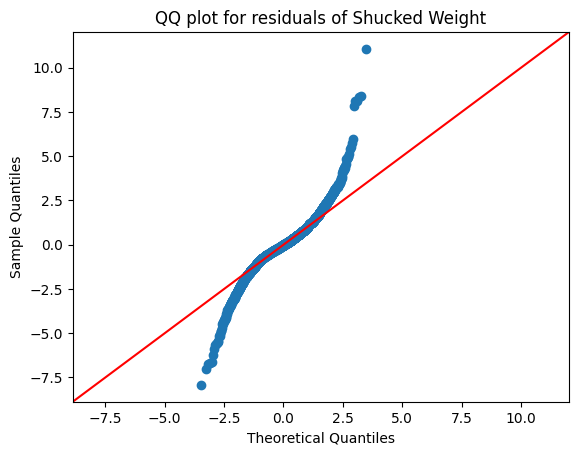

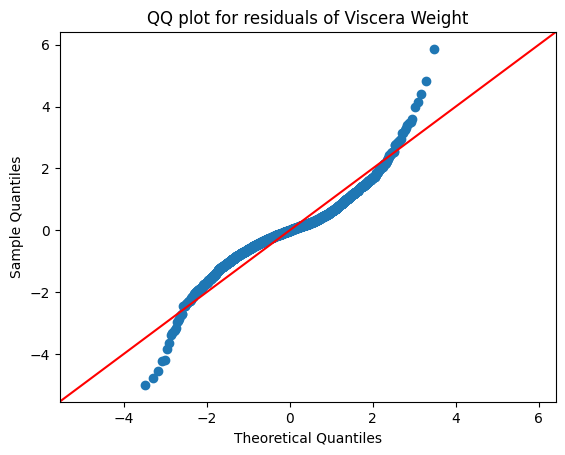

In [114]:
import statsmodels.api as sm
from scipy import stats

# 전체 잔차에 대한 QQ plot 그리기
residuals = np.concatenate((residuals_train, residuals_test), axis=0)
sm.qqplot(residuals, line ='45')
plt.title('QQ plot for residuals')
plt.show()

# Shucked Weight에 대한 잔차에 대한 QQ plot 그리기
residuals_shucked = np.concatenate((residuals_train_shucked, residuals_test_shucked), axis=0)
sm.qqplot(residuals_shucked, line ='45')
plt.title('QQ plot for residuals of Shucked Weight')
plt.show()

# Viscera Weight에 대한 잔차에 대한 QQ plot 그리기
residuals_viscera = np.concatenate((residuals_train_viscera, residuals_test_viscera), axis=0)
sm.qqplot(residuals_viscera, line ='45')
plt.title('QQ plot for residuals of Viscera Weight')
plt.show()


정규성을 만족하지 않는 것을 확인, 이어서 등분산성 만족하는지 확인

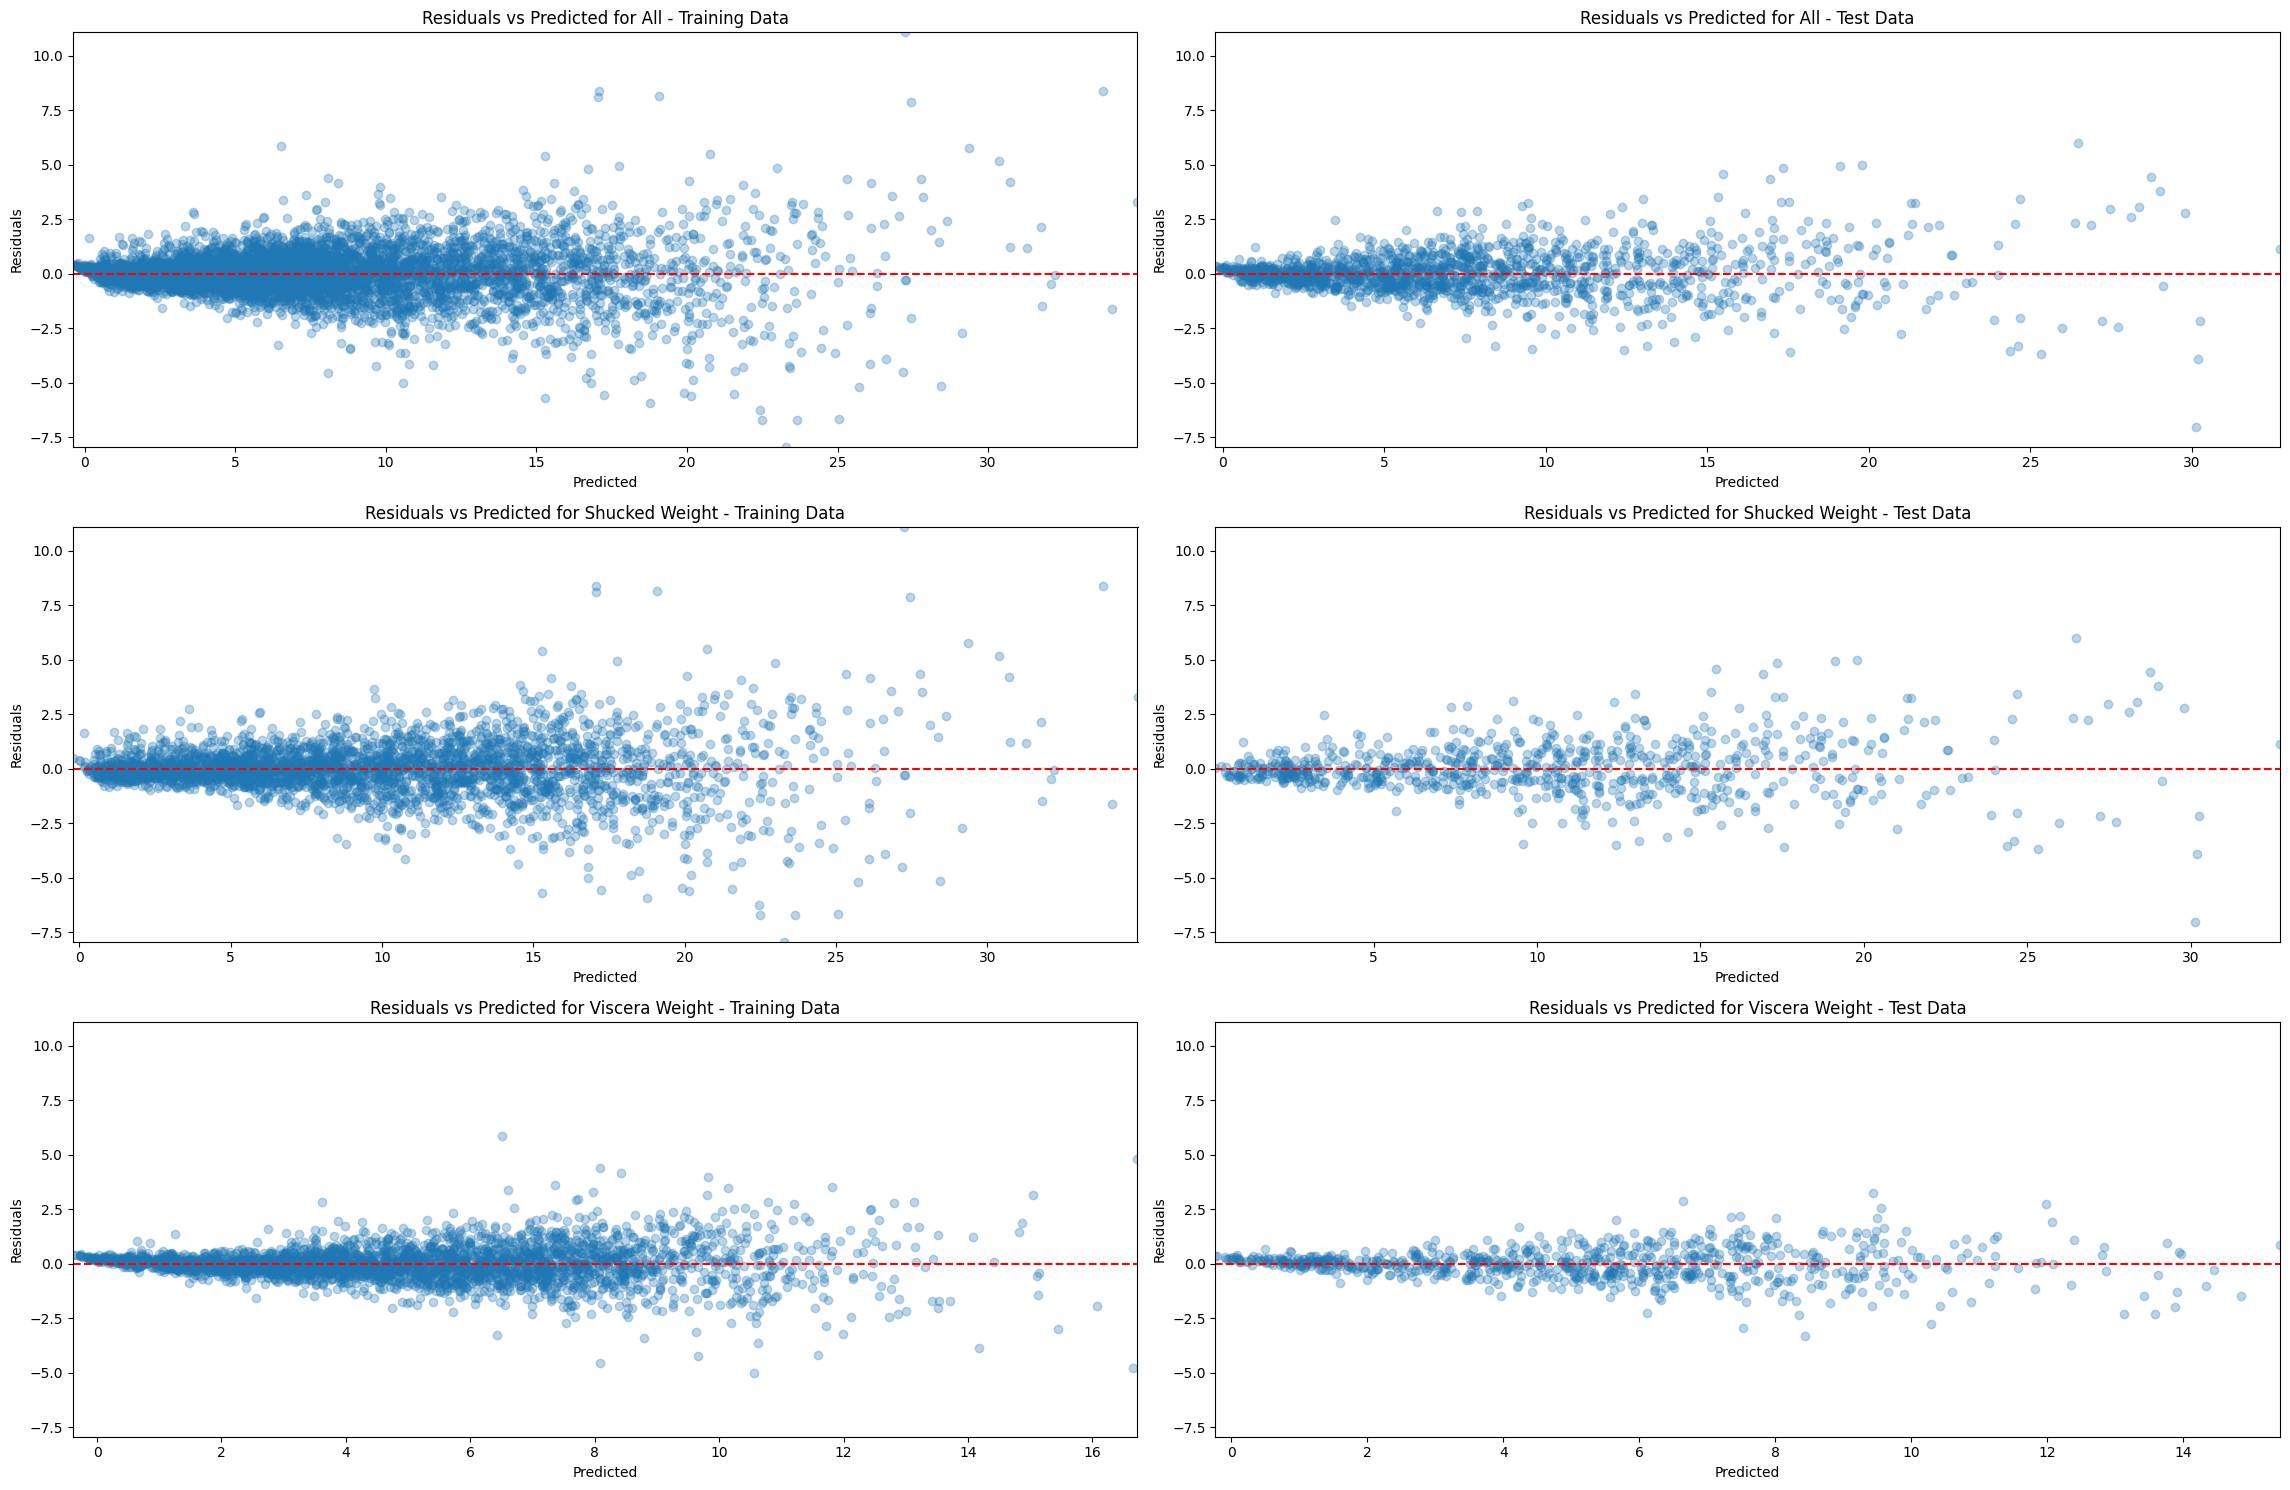

In [115]:
fig, axes = plt.subplots(3, 2, figsize=(23, 15))

# 잔차의 최소값과 최대값 계산
residuals_min = np.min([residuals_train.min(), residuals_test.min()])
residuals_max = np.max([residuals_train.max(), residuals_test.max()])

# 전체에 대한 잔차 산점도
axes[0, 0].scatter(y_train_hat, residuals_train, alpha=0.3)
axes[0, 0].axhline(0, color='r', linestyle='--')
axes[0, 0].set_xlim([y_train_hat.min(), y_train_hat.max()])
axes[0, 0].set_ylim([residuals_min, residuals_max])
axes[0, 0].set_xlabel('Predicted')
axes[0, 0].set_ylabel('Residuals')
axes[0, 0].set_title('Residuals vs Predicted for All - Training Data')



axes[0, 1].scatter(y_test_hat, residuals_test, alpha=0.3)
axes[0, 1].axhline(0, color='r', linestyle='--')
axes[0, 1].set_xlim([y_test_hat.min(), y_test_hat.max()])
axes[0, 1].set_ylim([residuals_min, residuals_max])
axes[0, 1].set_xlabel('Predicted')
axes[0, 1].set_ylabel('Residuals')
axes[0, 1].set_title('Residuals vs Predicted for All - Test Data')


# Shucked Weight에 대한 잔차 산점도
axes[1, 0].scatter(y_train_hat[:, 0], residuals_train_shucked, alpha=0.3)
axes[1, 0].axhline(0, color='r', linestyle='--')
axes[1, 0].set_xlim([y_train_hat[:, 0].min(), y_train_hat[:, 0].max()])
axes[1, 0].set_ylim([residuals_min, residuals_max])
axes[1, 0].set_xlabel('Predicted')
axes[1, 0].set_ylabel('Residuals')
axes[1, 0].set_title('Residuals vs Predicted for Shucked Weight - Training Data')

axes[1, 1].scatter(y_test_hat[:, 0], residuals_test_shucked, alpha=0.3)
axes[1, 1].axhline(0, color='r', linestyle='--')
axes[1, 1].set_xlim([y_test_hat[:, 0].min(), y_test_hat[:, 0].max()])
axes[1, 1].set_ylim([residuals_min, residuals_max])
axes[1, 1].set_xlabel('Predicted')
axes[1, 1].set_ylabel('Residuals')
axes[1, 1].set_title('Residuals vs Predicted for Shucked Weight - Test Data')


# Viscera Weight에 대한 잔차 산점도
axes[2, 0].scatter(y_train_hat[:, 1], residuals_train_viscera, alpha=0.3)
axes[2, 0].axhline(0, color='r', linestyle='--')
axes[2, 0].set_xlim([y_train_hat[:, 1].min(), y_train_hat[:, 1].max()])
axes[2, 0].set_ylim([residuals_min, residuals_max])
axes[2, 0].set_xlabel('Predicted')
axes[2, 0].set_ylabel('Residuals')
axes[2, 0].set_title('Residuals vs Predicted for Viscera Weight - Training Data')

axes[2, 1].scatter(y_test_hat[:, 1], residuals_test_viscera, alpha=0.3)
axes[2, 1].axhline(0, color='r', linestyle='--')
axes[2, 1].set_xlim([y_test_hat[:, 1].min(), y_test_hat[:, 1].max()])
axes[2, 1].set_ylim([residuals_min, residuals_max])
axes[2, 1].set_xlabel('Predicted')
axes[2, 1].set_ylabel('Residuals')
axes[2, 1].set_title('Residuals vs Predicted for Viscera Weight - Test Data')

plt.tight_layout()
plt.show()

등분산성 만족하지 않음, 예측값이 커질수록 잔차가 증가하는 깔대기 모양이 형성되는 것을 볼 수 있음, 그나마 viscera weight는 그 정도가 작지만 이 반응변수 또한 잔차가 심하게 증가하는 패턴을 보임

독립성 만족 여부는 이미 잔차에 대한 가정 2가지를 만족하지 않으므로 진행하지 않았음

결국 선형회귀로 예측을 하기엔 잔차분석을 통해 부적합다는 것을 확인, 비선형 예측모형을 만드는 것으로 방향을 세움

## 딥러닝 모델 사용 ( 코랩 대신 GPU를 활용하기 위해 비주얼스투디오로 진행함)

In [116]:
# from keras.models import Sequential
# from keras.layers import Dense
# from keras.callbacks import EarlyStopping, ModelCheckpoint
# from keras.layers import Dropout, BatchNormalization

# # ANN 모델 구성
# model = Sequential()
# model.add(Dense(16, activation='relu', input_dim=X_train_st.shape[1]))
# model.add(BatchNormalization())
# model.add(Dropout(0.5))
# model.add(Dense(8, activation='relu'))
# model.add(BatchNormalization())
# model.add(Dense(4, activation='relu'))
# model.add(Dropout(0.2))
# model.add(BatchNormalization())
# model.add(Dense(2))


# # 모델 컴파일
# model.compile(optimizer='adam', loss='mean_squared_error')
# # EarlyStopping 설정: 10번 연속으로 검증 손실이 향상되지 않으면 학습 종료
# early_stop = EarlyStopping(monitor='val_loss', patience=50)

# # ModelCheckpoint 설정: 각 에포크마다 검증 손실이 이전보다 좋아졌을 경우 모델 저장
# model_checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True)

# # 모델 학습 시 Callback 추가
# model.fit(X_train_st, y_train, validation_data=(X_test_st, y_test), epochs=350, batch_size=32, callbacks=[early_stop, model_checkpoint])

# # 훈련 데이터에 대한 예측 및 성능 평가
# y_train_hat = model.predict(X_train_st)


# # 테스트 데이터에 대한 예측 및 성능 평가
# y_test_hat = model.predict(X_test_st)



# mae_train = mean_absolute_error(y_train, y_train_hat)
# mae_test = mean_absolute_error(y_test, y_test_hat)

# mse_train = mean_squared_error(y_train, y_train_hat)
# mse_test = mean_squared_error(y_test, y_test_hat)

# rmse_train = np.sqrt(mse_train)
# rmse_test = np.sqrt(mse_test)

# train_r2 = r2_score(y_train, y_train_hat)
# test_r2 = r2_score(y_test, y_test_hat)

# print("MAE for model is train : ",mae_train, "Test:", mae_test)
# print("MSE for model is train : ",mse_train, "Test:",mse_test)
# print("RMSE for model is train : ",rmse_train, "Test:",rmse_test)
# print("R square for model is train : ",train_r2, "Test:",test_r2)

In [117]:
# # 훈련 데이터에 대한 그래프
# fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# # Shucked Weight
# axes[0].scatter(y_train_np[:, 0], y_train_hat[:, 0], alpha=0.3, color='blue')
# axes[0].plot([y_train_np[:, 0].min(), y_train_np[:, 0].max()], [y_train_np[:, 0].min(), y_train_np[:, 0].max()], 'k--', lw=2)
# axes[0].set_xlabel('Actual')
# axes[0].set_ylabel('Predicted')
# axes[0].set_title('Training data for Shucked Weight')
# axes[0].set_title('Training data for Shucked Weight')

# # Viscera Weight
# axes[1].scatter(y_train_np[:, 1], y_train_hat[:, 1], alpha=0.3, color='blue')
# axes[1].plot([y_train_np[:, 1].min(), y_train_np[:, 1].max()], [y_train_np[:, 1].min(), y_train_np[:, 1].max()], 'k--', lw=2)
# axes[1].set_xlabel('Actual')
# axes[1].set_ylabel('Predicted')
# axes[0].set_title('Training data for Shucked Weight')
# axes[1].set_title('Training data for Viscera Weight')

# plt.tight_layout()
# plt.show()

# #테스트 데이터에 대한 그래프
# fig, axes = plt.subplots(1, 2, figsize=(20, 10))

# #Shucked Weight
# axes[0].scatter(y_test_np[:, 0], y_test_hat[:, 0], alpha=0.3, color='blue')
# axes[0].plot([y_test_np[:, 0].min(), y_test_np[:, 0].max()], [y_test_np[:, 0].min(), y_test_np[:, 0].max()], 'k--', lw=2)
# axes[0].set_xlabel('Actual')
# axes[0].set_ylabel('Predicted')
# axes[0].set_title('Test data for Shucked Weight')

# # Viscera Weight
# axes[1].scatter(y_test['Viscera Weight'].values, y_test_hat[:, 1], alpha=0.3, color='blue')
# axes[1].plot([y_test['Viscera Weight'].min(), y_test['Viscera Weight'].max()], [y_test['Viscera Weight'].min(), y_test['Viscera Weight'].max()], 'k--', lw=2)
# axes[1].set_xlabel('Actual')
# axes[1].set_ylabel('Predicted')
# axes[1].set_title('Test data for Viscera Weight')

# plt.tight_layout()
# plt.show()

Correlation 이 feature 들간의 강하게 있기에 PCA를 통해 주성분만을 사용해 예측을 진행하면 더욱 좋은 결과가 나올것이라 가정을 했다.

In [118]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import numpy as np

# PCA 객체 생성
pca = PCA(n_components=2)  # 주성분 개수를 2개로 설정

# 훈련 데이터에 PCA 적용
X_train_pca = pca.fit_transform(X_train_st)

# 테스트 데이터에 PCA 적용
X_test_pca = pca.transform(X_test_st)

# 선형 회귀 모델 생성 및 PCA로 축소된 훈련 데이터로 학습
reg_pca = LinearRegression()
reg_pca.fit(X_train_pca, y_train)

# 훈련 데이터에 대한 예측 및 성능 평가
y_train_hat = reg_pca.predict(X_train_pca)



# 테스트 데이터에 대한 예측 및 성능 평가
y_test_hat = reg_pca.predict(X_test_pca)


mae_train = mean_absolute_error(y_train, y_train_hat)
mae_test = mean_absolute_error(y_test, y_test_hat)
mse_train = mean_squared_error(y_train, y_train_hat)
mse_test = mean_squared_error(y_test, y_test_hat)
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)
train_r2 = r2_score(y_train, y_train_hat)
test_r2 = r2_score(y_test, y_test_hat)

print("MAE for model is train : ",mae_train, "Test:", mae_test)
print("MSE for model is train : ",mse_train, "Test:",mse_test)
print("RMSE for model is train : ",rmse_train, "Test:",rmse_test)
print("R square for model is train : ",train_r2, "Test:",test_r2)

MAE for model is train :  1.5958216324603534 Test: 1.622837750749823
MSE for model is train :  5.083385813829015 Test: 5.271410862303459
RMSE for model is train :  2.2546365147910237 Test: 2.2959553267220727
R square for model is train :  0.8010631933821043 Test: 0.8149919531717795


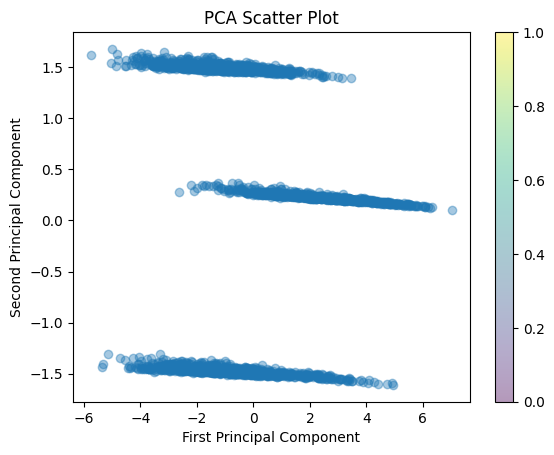

In [119]:
import matplotlib.pyplot as plt

plt.figure()
plt.scatter(X_train_pca[:, 0],X_train_pca[:, 1], alpha=0.4)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA Scatter Plot')
plt.colorbar()
plt.show()


In [120]:
# 각 주성분이 설명하는 분산의 비율
explained_variance_ratio = pca.explained_variance_ratio_

In [121]:
print(explained_variance_ratio)

[0.59736852 0.19118803]


In [122]:
## 주성분으로 correlation 없애 linear regression 을 하더라도 성능은 좋아지지 않음, regression 계열 모델은 만족스러운 성능을 내지 못할 것으로 결론내림

## Tree 기반 모델을 사용하여 예측모형 만들기

In [123]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

# XGBoost 회귀 모델 설정
xgb_reg = XGBRegressor()

# 튜닝할 파라미터 설정
params = {
    'n_estimators': [250, 350, 450],  # 트리의 개수
    'learning_rate': [0.03, 0.05, 0.07],  # 학습률
    'max_depth': [1,2, 3],  # 트리의 최대 깊이
    'min_child_weight': [0.8,1],  # 가중치 합계의 최솟값
    'colsample_bytree': [ 0.7, 0.9]  # 열 샘플링 비율
}

# GridSearchCV를 통한 파라미터 튜닝
grid_search = GridSearchCV(xgb_reg, params, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')
grid_search.fit(X_train_st, y_train)

# 최적의 파라미터로 학습된 모델 추출
best_xgb_reg = grid_search.best_estimator_

# 훈련 데이터에 대한 예측
y_train_hat = best_xgb_reg.predict(X_train_st)

# 테스트 데이터에 대한 예측
y_test_hat = best_xgb_reg.predict(X_test_st)


In [124]:
# 최적의 파라미터 출력
print("최적의 파라미터: ", grid_search.best_params_)

최적의 파라미터:  {'colsample_bytree': 0.9, 'learning_rate': 0.03, 'max_depth': 2, 'min_child_weight': 0.8, 'n_estimators': 450}


In [125]:
mae_train = mean_absolute_error(y_train, y_train_hat)
mae_test = mean_absolute_error(y_test, y_test_hat)

mse_train = mean_squared_error(y_train, y_train_hat)
mse_test = mean_squared_error(y_test, y_test_hat)

rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)

train_r2 = r2_score(y_train, y_train_hat)
test_r2 = r2_score(y_test, y_test_hat)

print("MAE for model is train : ",mae_train, "Test:", mae_test)
print("MSE for model is train : ",mse_train, "Test:",mse_test)
print("RMSE for model is train : ",rmse_train, "Test:",rmse_test)
print("R square for model is train : ",train_r2, "Test:",test_r2)

MAE for model is train :  0.6566403731579191 Test: 0.7188591344342248
MSE for model is train :  0.9582678054881879 Test: 1.1844450244651228
RMSE for model is train :  0.9789115411967457 Test: 1.0883221142957276
R square for model is train :  0.9533857103828631 Test: 0.9492260731477492


# 정규화 사용해서 예측 진행 성능 linear 보다 좋게 나오지 않음

In [126]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha= 10)  # alpha 값은 본인이 조절할 수 있습니다.
ridge.fit(X_train_st, y_train)

# 훈련 데이터에 대한 예측
y_train_hat = ridge.predict(X_train_st)

# 테스트 데이터에 대한 예측
y_test_hat = ridge.predict(X_test_st)

mae_train = mean_absolute_error(y_train, y_train_hat)
mae_test = mean_absolute_error(y_test, y_test_hat)
mse_train = mean_squared_error(y_train, y_train_hat)
mse_test = mean_squared_error(y_test, y_test_hat)
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)
train_r2 = r2_score(y_train, y_train_hat)
test_r2 = r2_score(y_test, y_test_hat)

print("MAE for model is train : ",mae_train, "Test:", mae_test)
print("MSE for model is train : ",mse_train, "Test:",mse_test)
print("RMSE for model is train : ",rmse_train, "Test:",rmse_test)
print("R square for model is train : ",train_r2, "Test:",test_r2)

MAE for model is train :  0.7149233726930447 Test: 0.7068573287313746
MSE for model is train :  1.1701907966875953 Test: 1.041886915728306
RMSE for model is train :  1.0817535748439175 Test: 1.0207286200201824
R square for model is train :  0.9437735399079239 Test: 0.9551316653470374


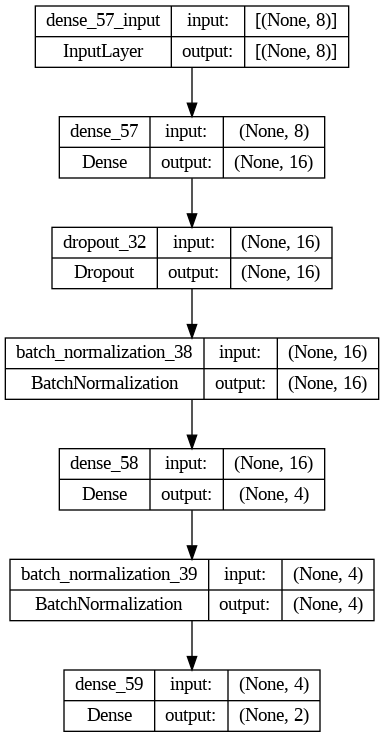

In [127]:
from tensorflow.keras.models import load_model
import tensorflow.keras.utils as keras_utils

# Load the model
model = load_model('/content/drive/MyDrive/경예기 팀플/best_model.h5')  # 여기에 실제 모델 파일 경로를 입력해주세요.

# Visualize the model architecture
keras_utils.plot_model(model, show_shapes=True, show_layer_names=True)